In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import math
import time
from math import sqrt
from sklearn.impute import KNNImputer
import seaborn as sns

# Importing Data

In [2]:
X_train = pd.read_csv('X_train_lstm.csv')
y_train = pd.read_csv('y_train_lstm.csv')
X_cv = pd.read_csv('X_cv_lstm.csv')
y_cv = pd.read_csv('y_cv_lstm.csv')
X_train_cv = pd.read_csv('X_train_cv_lstm.csv')
y_train_cv = pd.read_csv('y_train_cv_lstm.csv')
X_test = pd.read_csv('X_test_lstm.csv')
y_test = pd.read_csv('y_test_lstm.csv')

predict_feature = pd.read_csv('predict_feature_lstm.csv')

# Defining Functions

## LSTM Function

In [3]:
def run(neurons, batchSize, numEpochs, X, Y, pred_set, actual_set):
    #Reshaping
    trainX =np.array(X)
    X = trainX.reshape(X.shape[0], 1, X.shape[1])
    
    testX =np.array(pred_set)
    pred_set = testX.reshape(pred_set.shape[0], 1, pred_set.shape[1])
    
    #Building the LSTM Model
    lstm = Sequential()
    lstm.add(LSTM(neurons, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
    lstm.add(Dense(1))
    lstm.compile(loss="mean_squared_error", optimizer="adam")
    plot_model(lstm, show_shapes=True, show_layer_names=True)

    ##################################################
    
    # Fitting the RNN to the Training set
    history = lstm.fit(X, Y, epochs=numEpochs, batch_size=batchSize, verbose=1, shuffle=False)
    predicted_Price = lstm.predict(pred_set)

    orig = actual_set

    rmse = sqrt(mean_squared_error(orig, predicted_Price))
    mape = get_mape(orig, predicted_Price)
    # Calculate RMSE
    print("RMSE on train set = %0.3f" % rmse)
    # Calculate MAPE
    print("MAPE on train set = %0.3f%%" % mape)

    return rmse, mape

## MAPE Function

In [4]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Model Tuning

## Tuning Epochs Parameter

In [5]:
# vary training batches
param_label = 'epochs'
param_list = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32
default_neurons = 32

for param in param_list:
    rmse, mape = run(default_neurons, default_batch_size, param, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


2022-04-25 20:53:22.206065: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
14/14 [==============================] - 1s 2ms/step - loss: 887542400.0000
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 887520768.0000
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 887489728.0000
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 887444800.0000
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 887384256.0000
Epoch 6/500
14/14 [==============================] - 0s 1ms/step - loss: 887308224.0000
Epoch 7/500
14/14 [==============================] - 0s 1ms/step - loss: 887218816.0000
Epoch 8/500
14/14 [==============================] - 0s 1ms/step - loss: 887118208.0000
Epoch 9/500
14/14 [==============================] - 0s 1ms/step - loss: 887008640.0000
Epoch 10/500
14/14 [==============================] - 0s 1ms/step - loss: 886891392.0000
Epoch 11/500
14/14 [==============================] - 0s 1ms/step - loss: 886766400.0000
Epoch 12/500
14/14 [==========

14/14 [==============================] - 0s 1ms/step - loss: 782121344.0000
Epoch 185/500
14/14 [==============================] - 0s 1ms/step - loss: 781182720.0000
Epoch 186/500
14/14 [==============================] - 0s 1ms/step - loss: 780241920.0000
Epoch 187/500
14/14 [==============================] - 0s 1ms/step - loss: 779298816.0000
Epoch 188/500
14/14 [==============================] - 0s 1ms/step - loss: 778353472.0000
Epoch 189/500
14/14 [==============================] - 0s 1ms/step - loss: 777405824.0000
Epoch 190/500
14/14 [==============================] - 0s 1ms/step - loss: 776455744.0000
Epoch 191/500
14/14 [==============================] - 0s 1ms/step - loss: 775503680.0000
Epoch 192/500
14/14 [==============================] - 0s 1ms/step - loss: 774549312.0000
Epoch 193/500
14/14 [==============================] - 0s 1ms/step - loss: 773592832.0000
Epoch 194/500
14/14 [==============================] - 0s 1ms/step - loss: 772634176.0000
Epoch 195/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 590401280.0000
Epoch 367/500
14/14 [==============================] - 0s 1ms/step - loss: 589315328.0000
Epoch 368/500
14/14 [==============================] - 0s 1ms/step - loss: 588229760.0000
Epoch 369/500
14/14 [==============================] - 0s 1ms/step - loss: 587144640.0000
Epoch 370/500
14/14 [==============================] - 0s 1ms/step - loss: 586059968.0000
Epoch 371/500
14/14 [==============================] - 0s 1ms/step - loss: 584975744.0000
Epoch 372/500
14/14 [==============================] - 0s 1ms/step - loss: 583892096.0000
Epoch 373/500
14/14 [==============================] - 0s 1ms/step - loss: 582808960.0000
Epoch 374/500
14/14 [==============================] - 0s 1ms/step - loss: 581726208.0000
Epoch 375/500
14/14 [==============================] - 0s 1ms/step - loss: 580644032.0000
Epoch 376/500
14/14 [==============================] - 0s 1ms/step - loss: 579562432.0000
Epoch 377/500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 878530176.0000
Epoch 46/1000
14/14 [==============================] - 0s 1ms/step - loss: 878174656.0000
Epoch 47/1000
14/14 [==============================] - 0s 1ms/step - loss: 877812544.0000
Epoch 48/1000
14/14 [==============================] - 0s 1ms/step - loss: 877444352.0000
Epoch 49/1000
14/14 [==============================] - 0s 1ms/step - loss: 877069824.0000
Epoch 50/1000
14/14 [==============================] - 0s 1ms/step - loss: 876689088.0000
Epoch 51/1000
14/14 [==============================] - 0s 1ms/step - loss: 876302208.0000
Epoch 52/1000
14/14 [==============================] - 0s 1ms/step - loss: 875909120.0000
Epoch 53/1000
14/14 [==============================] - 0s 1ms/step - loss: 875509952.0000
Epoch 54/1000
14/14 [==============================] - 0s 1ms/step - loss: 875104704.0000
Epoch 55/1000
14/14 [==============================] - 0s 1ms/step - loss: 874693376.0000
Epoch 56/1000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 742306112.0000
Epoch 226/1000
14/14 [==============================] - 0s 1ms/step - loss: 741289088.0000
Epoch 227/1000
14/14 [==============================] - 0s 1ms/step - loss: 740270720.0000
Epoch 228/1000
14/14 [==============================] - 0s 1ms/step - loss: 739250752.0000
Epoch 229/1000
14/14 [==============================] - 0s 1ms/step - loss: 738229312.0000
Epoch 230/1000
14/14 [==============================] - 0s 1ms/step - loss: 737206336.0000
Epoch 231/1000
14/14 [==============================] - 0s 1ms/step - loss: 736181888.0000
Epoch 232/1000
14/14 [==============================] - 0s 1ms/step - loss: 735156032.0000
Epoch 233/1000
14/14 [==============================] - 0s 1ms/step - loss: 734128704.0000
Epoch 234/1000
14/14 [==============================] - 0s 1ms/step - loss: 733099840.0000
Epoch 235/1000
14/14 [==============================] - 0s 1ms/step - loss: 732069760.0000
Epoch 236/1000

14/14 [==============================] - 0s 1ms/step - loss: 548894208.0000
Epoch 406/1000
14/14 [==============================] - 0s 1ms/step - loss: 547833344.0000
Epoch 407/1000
14/14 [==============================] - 0s 1ms/step - loss: 546773184.0000
Epoch 408/1000
14/14 [==============================] - 0s 1ms/step - loss: 545713984.0000
Epoch 409/1000
14/14 [==============================] - 0s 1ms/step - loss: 544655616.0000
Epoch 410/1000
14/14 [==============================] - 0s 1ms/step - loss: 543598208.0000
Epoch 411/1000
14/14 [==============================] - 0s 1ms/step - loss: 542541632.0000
Epoch 412/1000
14/14 [==============================] - 0s 1ms/step - loss: 541486016.0000
Epoch 413/1000
14/14 [==============================] - 0s 1ms/step - loss: 540431232.0000
Epoch 414/1000
14/14 [==============================] - 0s 1ms/step - loss: 539377408.0000
Epoch 415/1000
14/14 [==============================] - 0s 1ms/step - loss: 538324480.0000
Epoch 416/1000

14/14 [==============================] - 0s 1ms/step - loss: 379680032.0000
Epoch 586/1000
14/14 [==============================] - 0s 1ms/step - loss: 378898560.0000
Epoch 587/1000
14/14 [==============================] - 0s 1ms/step - loss: 378119136.0000
Epoch 588/1000
14/14 [==============================] - 0s 1ms/step - loss: 377341792.0000
Epoch 589/1000
14/14 [==============================] - 0s 1ms/step - loss: 376566496.0000
Epoch 590/1000
14/14 [==============================] - 0s 1ms/step - loss: 375793248.0000
Epoch 591/1000
14/14 [==============================] - 0s 1ms/step - loss: 375022048.0000
Epoch 592/1000
14/14 [==============================] - 0s 1ms/step - loss: 374252960.0000
Epoch 593/1000
14/14 [==============================] - 0s 1ms/step - loss: 373485856.0000
Epoch 594/1000
14/14 [==============================] - 0s 1ms/step - loss: 372720864.0000
Epoch 595/1000
14/14 [==============================] - 0s 1ms/step - loss: 371957920.0000
Epoch 596/1000

14/14 [==============================] - 0s 1ms/step - loss: 245479696.0000
Epoch 766/1000
14/14 [==============================] - 0s 1ms/step - loss: 244795088.0000
Epoch 767/1000
14/14 [==============================] - 0s 1ms/step - loss: 244111408.0000
Epoch 768/1000
14/14 [==============================] - 0s 1ms/step - loss: 243428608.0000
Epoch 769/1000
14/14 [==============================] - 0s 1ms/step - loss: 242746768.0000
Epoch 770/1000
14/14 [==============================] - 0s 1ms/step - loss: 242065808.0000
Epoch 771/1000
14/14 [==============================] - 0s 1ms/step - loss: 241385760.0000
Epoch 772/1000
14/14 [==============================] - 0s 1ms/step - loss: 240706688.0000
Epoch 773/1000
14/14 [==============================] - 0s 1ms/step - loss: 240028464.0000
Epoch 774/1000
14/14 [==============================] - 0s 1ms/step - loss: 239351168.0000
Epoch 775/1000
14/14 [==============================] - 0s 1ms/step - loss: 238674768.0000
Epoch 776/1000

14/14 [==============================] - 0s 1ms/step - loss: 138072784.0000
Epoch 946/1000
14/14 [==============================] - 0s 1ms/step - loss: 137572320.0000
Epoch 947/1000
14/14 [==============================] - 0s 1ms/step - loss: 137073008.0000
Epoch 948/1000
14/14 [==============================] - 0s 1ms/step - loss: 136574864.0000
Epoch 949/1000
14/14 [==============================] - 0s 1ms/step - loss: 136077872.0000
Epoch 950/1000
14/14 [==============================] - 0s 1ms/step - loss: 135582096.0000
Epoch 951/1000
14/14 [==============================] - 0s 1ms/step - loss: 135087456.0000
Epoch 952/1000
14/14 [==============================] - 0s 1ms/step - loss: 134594000.0000
Epoch 953/1000
14/14 [==============================] - 0s 1ms/step - loss: 134101760.0000
Epoch 954/1000
14/14 [==============================] - 0s 1ms/step - loss: 133610656.0000
Epoch 955/1000
14/14 [==============================] - 0s 1ms/step - loss: 133120752.0000
Epoch 956/1000

14/14 [==============================] - 0s 1ms/step - loss: 822598848.0000
Epoch 124/1500
14/14 [==============================] - 0s 1ms/step - loss: 821689856.0000
Epoch 125/1500
14/14 [==============================] - 0s 1ms/step - loss: 820776576.0000
Epoch 126/1500
14/14 [==============================] - 0s 1ms/step - loss: 819858880.0000
Epoch 127/1500
14/14 [==============================] - 0s 1ms/step - loss: 818936832.0000
Epoch 128/1500
14/14 [==============================] - 0s 1ms/step - loss: 818010432.0000
Epoch 129/1500
14/14 [==============================] - 0s 1ms/step - loss: 817079936.0000
Epoch 130/1500
14/14 [==============================] - 0s 1ms/step - loss: 816145024.0000
Epoch 131/1500
14/14 [==============================] - 0s 1ms/step - loss: 815206016.0000
Epoch 132/1500
14/14 [==============================] - 0s 1ms/step - loss: 814262784.0000
Epoch 133/1500
14/14 [==============================] - 0s 1ms/step - loss: 813315520.0000
Epoch 134/1500

14/14 [==============================] - 0s 1ms/step - loss: 617625344.0000
Epoch 304/1500
14/14 [==============================] - 0s 1ms/step - loss: 616392960.0000
Epoch 305/1500
14/14 [==============================] - 0s 1ms/step - loss: 615160960.0000
Epoch 306/1500
14/14 [==============================] - 0s 1ms/step - loss: 613929152.0000
Epoch 307/1500
14/14 [==============================] - 0s 1ms/step - loss: 612697600.0000
Epoch 308/1500
14/14 [==============================] - 0s 1ms/step - loss: 611466432.0000
Epoch 309/1500
14/14 [==============================] - 0s 1ms/step - loss: 610235520.0000
Epoch 310/1500
14/14 [==============================] - 0s 1ms/step - loss: 609004928.0000
Epoch 311/1500
14/14 [==============================] - 0s 1ms/step - loss: 607774784.0000
Epoch 312/1500
14/14 [==============================] - 0s 1ms/step - loss: 606544896.0000
Epoch 313/1500
14/14 [==============================] - 0s 1ms/step - loss: 605315456.0000
Epoch 314/1500

14/14 [==============================] - 0s 1ms/step - loss: 413904576.0000
Epoch 484/1500
14/14 [==============================] - 0s 1ms/step - loss: 412939840.0000
Epoch 485/1500
14/14 [==============================] - 0s 1ms/step - loss: 411977408.0000
Epoch 486/1500
14/14 [==============================] - 0s 1ms/step - loss: 411017376.0000
Epoch 487/1500
14/14 [==============================] - 0s 1ms/step - loss: 410059808.0000
Epoch 488/1500
14/14 [==============================] - 0s 1ms/step - loss: 409104704.0000
Epoch 489/1500
14/14 [==============================] - 0s 1ms/step - loss: 408151904.0000
Epoch 490/1500
14/14 [==============================] - 0s 1ms/step - loss: 407201600.0000
Epoch 491/1500
14/14 [==============================] - 0s 1ms/step - loss: 406253696.0000
Epoch 492/1500
14/14 [==============================] - 0s 1ms/step - loss: 405308256.0000
Epoch 493/1500
14/14 [==============================] - 0s 1ms/step - loss: 404365280.0000
Epoch 494/1500

14/14 [==============================] - 0s 1ms/step - loss: 261149776.0000
Epoch 664/1500
14/14 [==============================] - 0s 1ms/step - loss: 260368992.0000
Epoch 665/1500
14/14 [==============================] - 0s 1ms/step - loss: 259589376.0000
Epoch 666/1500
14/14 [==============================] - 0s 1ms/step - loss: 258811008.0000
Epoch 667/1500
14/14 [==============================] - 0s 1ms/step - loss: 258033808.0000
Epoch 668/1500
14/14 [==============================] - 0s 1ms/step - loss: 257257776.0000
Epoch 669/1500
14/14 [==============================] - 0s 1ms/step - loss: 256482976.0000
Epoch 670/1500
14/14 [==============================] - 0s 1ms/step - loss: 255709344.0000
Epoch 671/1500
14/14 [==============================] - 0s 1ms/step - loss: 254936928.0000
Epoch 672/1500
14/14 [==============================] - 0s 1ms/step - loss: 254165696.0000
Epoch 673/1500
14/14 [==============================] - 0s 1ms/step - loss: 253395648.0000
Epoch 674/1500

14/14 [==============================] - 0s 1ms/step - loss: 139943088.0000
Epoch 844/1500
14/14 [==============================] - 0s 1ms/step - loss: 139387536.0000
Epoch 845/1500
14/14 [==============================] - 0s 1ms/step - loss: 138833424.0000
Epoch 846/1500
14/14 [==============================] - 0s 1ms/step - loss: 138280736.0000
Epoch 847/1500
14/14 [==============================] - 0s 1ms/step - loss: 137729520.0000
Epoch 848/1500
14/14 [==============================] - 0s 1ms/step - loss: 137179728.0000
Epoch 849/1500
14/14 [==============================] - 0s 1ms/step - loss: 136631376.0000
Epoch 850/1500
14/14 [==============================] - 0s 1ms/step - loss: 136084496.0000
Epoch 851/1500
14/14 [==============================] - 0s 1ms/step - loss: 135539056.0000
Epoch 852/1500
14/14 [==============================] - 0s 1ms/step - loss: 134995088.0000
Epoch 853/1500
14/14 [==============================] - 0s 1ms/step - loss: 134452560.0000
Epoch 854/1500

14/14 [==============================] - 0s 1ms/step - loss: 64227636.0000
Epoch 1024/1500
14/14 [==============================] - 0s 1ms/step - loss: 63943484.0000
Epoch 1025/1500
14/14 [==============================] - 0s 1ms/step - loss: 63660752.0000
Epoch 1026/1500
14/14 [==============================] - 0s 1ms/step - loss: 63379476.0000
Epoch 1027/1500
14/14 [==============================] - 0s 1ms/step - loss: 63099644.0000
Epoch 1028/1500
14/14 [==============================] - 0s 1ms/step - loss: 62821220.0000
Epoch 1029/1500
14/14 [==============================] - 0s 1ms/step - loss: 62544244.0000
Epoch 1030/1500
14/14 [==============================] - 0s 1ms/step - loss: 62268696.0000
Epoch 1031/1500
14/14 [==============================] - 0s 1ms/step - loss: 61994564.0000
Epoch 1032/1500
14/14 [==============================] - 0s 1ms/step - loss: 61721884.0000
Epoch 1033/1500
14/14 [==============================] - 0s 1ms/step - loss: 61450612.0000
Epoch 1034/1500

14/14 [==============================] - 0s 1ms/step - loss: 32711000.0000
Epoch 1204/1500
14/14 [==============================] - 0s 1ms/step - loss: 32617432.0000
Epoch 1205/1500
14/14 [==============================] - 0s 1ms/step - loss: 32524442.0000
Epoch 1206/1500
14/14 [==============================] - 0s 1ms/step - loss: 32432008.0000
Epoch 1207/1500
14/14 [==============================] - 0s 1ms/step - loss: 32340132.0000
Epoch 1208/1500
14/14 [==============================] - 0s 1ms/step - loss: 32248816.0000
Epoch 1209/1500
14/14 [==============================] - 0s 1ms/step - loss: 32158070.0000
Epoch 1210/1500
14/14 [==============================] - 0s 1ms/step - loss: 32067868.0000
Epoch 1211/1500
14/14 [==============================] - 0s 1ms/step - loss: 31978220.0000
Epoch 1212/1500
14/14 [==============================] - 0s 1ms/step - loss: 31889132.0000
Epoch 1213/1500
14/14 [==============================] - 0s 1ms/step - loss: 31800584.0000
Epoch 1214/1500

14/14 [==============================] - 0s 1ms/step - loss: 22857380.0000
Epoch 1384/1500
14/14 [==============================] - 0s 1ms/step - loss: 22825736.0000
Epoch 1385/1500
14/14 [==============================] - 0s 1ms/step - loss: 22794222.0000
Epoch 1386/1500
14/14 [==============================] - 0s 1ms/step - loss: 22762840.0000
Epoch 1387/1500
14/14 [==============================] - 0s 1ms/step - loss: 22731586.0000
Epoch 1388/1500
14/14 [==============================] - 0s 1ms/step - loss: 22700460.0000
Epoch 1389/1500
14/14 [==============================] - 0s 1ms/step - loss: 22669474.0000
Epoch 1390/1500
14/14 [==============================] - 0s 1ms/step - loss: 22638620.0000
Epoch 1391/1500
14/14 [==============================] - 0s 1ms/step - loss: 22607900.0000
Epoch 1392/1500
14/14 [==============================] - 0s 1ms/step - loss: 22577310.0000
Epoch 1393/1500
14/14 [==============================] - 0s 1ms/step - loss: 22546858.0000
Epoch 1394/1500

14/14 [==============================] - 0s 1ms/step - loss: 875959424.0000
Epoch 62/2000
14/14 [==============================] - 0s 1ms/step - loss: 875611712.0000
Epoch 63/2000
14/14 [==============================] - 0s 1ms/step - loss: 875259392.0000
Epoch 64/2000
14/14 [==============================] - 0s 1ms/step - loss: 874902592.0000
Epoch 65/2000
14/14 [==============================] - 0s 1ms/step - loss: 874541184.0000
Epoch 66/2000
14/14 [==============================] - 0s 1ms/step - loss: 874175296.0000
Epoch 67/2000
14/14 [==============================] - 0s 1ms/step - loss: 873804992.0000
Epoch 68/2000
14/14 [==============================] - 0s 1ms/step - loss: 873430208.0000
Epoch 69/2000
14/14 [==============================] - 0s 1ms/step - loss: 873051072.0000
Epoch 70/2000
14/14 [==============================] - 0s 1ms/step - loss: 872667456.0000
Epoch 71/2000
14/14 [==============================] - 0s 1ms/step - loss: 872279488.0000
Epoch 72/2000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 760448000.0000
Epoch 242/2000
14/14 [==============================] - 0s 1ms/step - loss: 759604480.0000
Epoch 243/2000
14/14 [==============================] - 0s 1ms/step - loss: 758759552.0000
Epoch 244/2000
14/14 [==============================] - 0s 1ms/step - loss: 757913280.0000
Epoch 245/2000
14/14 [==============================] - 0s 1ms/step - loss: 757065600.0000
Epoch 246/2000
14/14 [==============================] - 0s 1ms/step - loss: 756216512.0000
Epoch 247/2000
14/14 [==============================] - 0s 1ms/step - loss: 755366272.0000
Epoch 248/2000
14/14 [==============================] - 0s 1ms/step - loss: 754514624.0000
Epoch 249/2000
14/14 [==============================] - 0s 1ms/step - loss: 753661696.0000
Epoch 250/2000
14/14 [==============================] - 0s 1ms/step - loss: 752807360.0000
Epoch 251/2000
14/14 [==============================] - 0s 1ms/step - loss: 751951872.0000
Epoch 252/2000

14/14 [==============================] - 0s 1ms/step - loss: 595893440.0000
Epoch 422/2000
14/14 [==============================] - 0s 1ms/step - loss: 594956096.0000
Epoch 423/2000
14/14 [==============================] - 0s 1ms/step - loss: 594019072.0000
Epoch 424/2000
14/14 [==============================] - 0s 1ms/step - loss: 593082304.0000
Epoch 425/2000
14/14 [==============================] - 0s 1ms/step - loss: 592145728.0000
Epoch 426/2000
14/14 [==============================] - 0s 1ms/step - loss: 591209472.0000
Epoch 427/2000
14/14 [==============================] - 0s 1ms/step - loss: 590273344.0000
Epoch 428/2000
14/14 [==============================] - 0s 1ms/step - loss: 589337600.0000
Epoch 429/2000
14/14 [==============================] - 0s 1ms/step - loss: 588402176.0000
Epoch 430/2000
14/14 [==============================] - 0s 1ms/step - loss: 587467008.0000
Epoch 431/2000
14/14 [==============================] - 0s 1ms/step - loss: 586532096.0000
Epoch 432/2000

14/14 [==============================] - 0s 1ms/step - loss: 437324576.0000
Epoch 602/2000
14/14 [==============================] - 0s 1ms/step - loss: 436532576.0000
Epoch 603/2000
14/14 [==============================] - 0s 1ms/step - loss: 435741920.0000
Epoch 604/2000
14/14 [==============================] - 0s 1ms/step - loss: 434952480.0000
Epoch 605/2000
14/14 [==============================] - 0s 1ms/step - loss: 434164352.0000
Epoch 606/2000
14/14 [==============================] - 0s 1ms/step - loss: 433377600.0000
Epoch 607/2000
14/14 [==============================] - 0s 1ms/step - loss: 432592064.0000
Epoch 608/2000
14/14 [==============================] - 0s 1ms/step - loss: 431807904.0000
Epoch 609/2000
14/14 [==============================] - 0s 1ms/step - loss: 431024992.0000
Epoch 610/2000
14/14 [==============================] - 0s 1ms/step - loss: 430243424.0000
Epoch 611/2000
14/14 [==============================] - 0s 1ms/step - loss: 429463168.0000
Epoch 612/2000

14/14 [==============================] - 0s 1ms/step - loss: 310273408.0000
Epoch 782/2000
14/14 [==============================] - 0s 1ms/step - loss: 309605536.0000
Epoch 783/2000
14/14 [==============================] - 0s 1ms/step - loss: 308938400.0000
Epoch 784/2000
14/14 [==============================] - 0s 1ms/step - loss: 308271904.0000
Epoch 785/2000
14/14 [==============================] - 0s 1ms/step - loss: 307606112.0000
Epoch 786/2000
14/14 [==============================] - 0s 1ms/step - loss: 306940960.0000
Epoch 787/2000
14/14 [==============================] - 0s 1ms/step - loss: 306276480.0000
Epoch 788/2000
14/14 [==============================] - 0s 1ms/step - loss: 305612672.0000
Epoch 789/2000
14/14 [==============================] - 0s 1ms/step - loss: 304949536.0000
Epoch 790/2000
14/14 [==============================] - 0s 1ms/step - loss: 304287104.0000
Epoch 791/2000
14/14 [==============================] - 0s 1ms/step - loss: 303625344.0000
Epoch 792/2000

14/14 [==============================] - 0s 1ms/step - loss: 200542096.0000
Epoch 962/2000
14/14 [==============================] - 0s 1ms/step - loss: 199993424.0000
Epoch 963/2000
14/14 [==============================] - 0s 1ms/step - loss: 199445440.0000
Epoch 964/2000
14/14 [==============================] - 0s 1ms/step - loss: 198898224.0000
Epoch 965/2000
14/14 [==============================] - 0s 1ms/step - loss: 198351728.0000
Epoch 966/2000
14/14 [==============================] - 0s 1ms/step - loss: 197805968.0000
Epoch 967/2000
14/14 [==============================] - 0s 1ms/step - loss: 197260944.0000
Epoch 968/2000
14/14 [==============================] - 0s 1ms/step - loss: 196716656.0000
Epoch 969/2000
14/14 [==============================] - 0s 1ms/step - loss: 196173120.0000
Epoch 970/2000
14/14 [==============================] - 0s 1ms/step - loss: 195630320.0000
Epoch 971/2000
14/14 [==============================] - 0s 1ms/step - loss: 195088240.0000
Epoch 972/2000

14/14 [==============================] - 0s 1ms/step - loss: 115978816.0000
Epoch 1140/2000
14/14 [==============================] - 0s 1ms/step - loss: 115585496.0000
Epoch 1141/2000
14/14 [==============================] - 0s 1ms/step - loss: 115193144.0000
Epoch 1142/2000
14/14 [==============================] - 0s 1ms/step - loss: 114801720.0000
Epoch 1143/2000
14/14 [==============================] - 0s 1ms/step - loss: 114411288.0000
Epoch 1144/2000
14/14 [==============================] - 0s 1ms/step - loss: 114021848.0000
Epoch 1145/2000
14/14 [==============================] - 0s 1ms/step - loss: 113633368.0000
Epoch 1146/2000
14/14 [==============================] - 0s 1ms/step - loss: 113245872.0000
Epoch 1147/2000
14/14 [==============================] - 0s 1ms/step - loss: 112859320.0000
Epoch 1148/2000
14/14 [==============================] - 0s 1ms/step - loss: 112473760.0000
Epoch 1149/2000
14/14 [==============================] - 0s 1ms/step - loss: 112089176.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 61210860.0000
Epoch 1319/2000
14/14 [==============================] - 0s 1ms/step - loss: 60991320.0000
Epoch 1320/2000
14/14 [==============================] - 0s 1ms/step - loss: 60772668.0000
Epoch 1321/2000
14/14 [==============================] - 0s 1ms/step - loss: 60554944.0000
Epoch 1322/2000
14/14 [==============================] - 0s 1ms/step - loss: 60338128.0000
Epoch 1323/2000
14/14 [==============================] - 0s 1ms/step - loss: 60122208.0000
Epoch 1324/2000
14/14 [==============================] - 0s 1ms/step - loss: 59907208.0000
Epoch 1325/2000
14/14 [==============================] - 0s 1ms/step - loss: 59693112.0000
Epoch 1326/2000
14/14 [==============================] - 0s 1ms/step - loss: 59479912.0000
Epoch 1327/2000
14/14 [==============================] - 0s 1ms/step - loss: 59267636.0000
Epoch 1328/2000
14/14 [==============================] - 0s 1ms/step - loss: 59056268.0000
Epoch 1329/2000

14/14 [==============================] - 0s 2ms/step - loss: 34440236.0000
Epoch 1499/2000
14/14 [==============================] - 0s 2ms/step - loss: 34346980.0000
Epoch 1500/2000
14/14 [==============================] - 0s 2ms/step - loss: 34254212.0000
Epoch 1501/2000
14/14 [==============================] - 0s 2ms/step - loss: 34161920.0000
Epoch 1502/2000
14/14 [==============================] - 0s 1ms/step - loss: 34070108.0000
Epoch 1503/2000
14/14 [==============================] - 0s 1ms/step - loss: 33978760.0000
Epoch 1504/2000
14/14 [==============================] - 0s 1ms/step - loss: 33887896.0000
Epoch 1505/2000
14/14 [==============================] - 0s 1ms/step - loss: 33797492.0000
Epoch 1506/2000
14/14 [==============================] - 0s 1ms/step - loss: 33707568.0000
Epoch 1507/2000
14/14 [==============================] - 0s 1ms/step - loss: 33618112.0000
Epoch 1508/2000
14/14 [==============================] - 0s 1ms/step - loss: 33529110.0000
Epoch 1509/2000

14/14 [==============================] - 0s 2ms/step - loss: 23004506.0000
Epoch 1679/2000
14/14 [==============================] - 0s 2ms/step - loss: 22962606.0000
Epoch 1680/2000
14/14 [==============================] - 0s 1ms/step - loss: 22921008.0000
Epoch 1681/2000
14/14 [==============================] - 0s 2ms/step - loss: 22879714.0000
Epoch 1682/2000
14/14 [==============================] - 0s 2ms/step - loss: 22838712.0000
Epoch 1683/2000
14/14 [==============================] - 0s 1ms/step - loss: 22798006.0000
Epoch 1684/2000
14/14 [==============================] - 0s 2ms/step - loss: 22757592.0000
Epoch 1685/2000
14/14 [==============================] - 0s 2ms/step - loss: 22717452.0000
Epoch 1686/2000
14/14 [==============================] - 0s 2ms/step - loss: 22677588.0000
Epoch 1687/2000
14/14 [==============================] - 0s 2ms/step - loss: 22638004.0000
Epoch 1688/2000
14/14 [==============================] - 0s 2ms/step - loss: 22598694.0000
Epoch 1689/2000

14/14 [==============================] - 0s 2ms/step - loss: 18340064.0000
Epoch 1859/2000
14/14 [==============================] - 0s 2ms/step - loss: 18317682.0000
Epoch 1860/2000
14/14 [==============================] - 0s 2ms/step - loss: 18294502.0000
Epoch 1861/2000
14/14 [==============================] - 0s 2ms/step - loss: 18270488.0000
Epoch 1862/2000
14/14 [==============================] - 0s 2ms/step - loss: 18245636.0000
Epoch 1863/2000
14/14 [==============================] - 0s 2ms/step - loss: 18219974.0000
Epoch 1864/2000
14/14 [==============================] - 0s 2ms/step - loss: 18193564.0000
Epoch 1865/2000
14/14 [==============================] - 0s 2ms/step - loss: 18166520.0000
Epoch 1866/2000
14/14 [==============================] - 0s 2ms/step - loss: 18138978.0000
Epoch 1867/2000
14/14 [==============================] - 0s 2ms/step - loss: 18111110.0000
Epoch 1868/2000
14/14 [==============================] - 0s 2ms/step - loss: 18083114.0000
Epoch 1869/2000

14/14 [==============================] - 0s 2ms/step - loss: 880349248.0000
Epoch 37/2500
14/14 [==============================] - 0s 2ms/step - loss: 879988480.0000
Epoch 38/2500
14/14 [==============================] - 0s 2ms/step - loss: 879619520.0000
Epoch 39/2500
14/14 [==============================] - 0s 2ms/step - loss: 879242432.0000
Epoch 40/2500
14/14 [==============================] - 0s 2ms/step - loss: 878857344.0000
Epoch 41/2500
14/14 [==============================] - 0s 2ms/step - loss: 878464256.0000
Epoch 42/2500
14/14 [==============================] - 0s 2ms/step - loss: 878063360.0000
Epoch 43/2500
14/14 [==============================] - 0s 2ms/step - loss: 877654400.0000
Epoch 44/2500
14/14 [==============================] - 0s 2ms/step - loss: 877237376.0000
Epoch 45/2500
14/14 [==============================] - 0s 2ms/step - loss: 876812800.0000
Epoch 46/2500
14/14 [==============================] - 0s 2ms/step - loss: 876380224.0000
Epoch 47/2500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 724222912.0000
Epoch 217/2500
14/14 [==============================] - 0s 2ms/step - loss: 723045248.0000
Epoch 218/2500
14/14 [==============================] - 0s 2ms/step - loss: 721865984.0000
Epoch 219/2500
14/14 [==============================] - 0s 2ms/step - loss: 720685312.0000
Epoch 220/2500
14/14 [==============================] - 0s 2ms/step - loss: 719503040.0000
Epoch 221/2500
14/14 [==============================] - 0s 2ms/step - loss: 718319296.0000
Epoch 222/2500
14/14 [==============================] - 0s 1ms/step - loss: 717134016.0000
Epoch 223/2500
14/14 [==============================] - 0s 2ms/step - loss: 715947328.0000
Epoch 224/2500
14/14 [==============================] - 0s 1ms/step - loss: 714759168.0000
Epoch 225/2500
14/14 [==============================] - 0s 2ms/step - loss: 713569600.0000
Epoch 226/2500
14/14 [==============================] - 0s 2ms/step - loss: 712378752.0000
Epoch 227/2500

14/14 [==============================] - 0s 2ms/step - loss: 506797824.0000
Epoch 397/2500
14/14 [==============================] - 0s 2ms/step - loss: 505654624.0000
Epoch 398/2500
14/14 [==============================] - 0s 2ms/step - loss: 504512992.0000
Epoch 399/2500
14/14 [==============================] - 0s 2ms/step - loss: 503372992.0000
Epoch 400/2500
14/14 [==============================] - 0s 2ms/step - loss: 502234656.0000
Epoch 401/2500
14/14 [==============================] - 0s 2ms/step - loss: 501097920.0000
Epoch 402/2500
14/14 [==============================] - 0s 2ms/step - loss: 499962880.0000
Epoch 403/2500
14/14 [==============================] - 0s 2ms/step - loss: 498829440.0000
Epoch 404/2500
14/14 [==============================] - 0s 2ms/step - loss: 497697760.0000
Epoch 405/2500
14/14 [==============================] - 0s 2ms/step - loss: 496567712.0000
Epoch 406/2500
14/14 [==============================] - 0s 2ms/step - loss: 495439328.0000
Epoch 407/2500

14/14 [==============================] - 0s 2ms/step - loss: 334706432.0000
Epoch 577/2500
14/14 [==============================] - 0s 2ms/step - loss: 333810880.0000
Epoch 578/2500
14/14 [==============================] - 0s 2ms/step - loss: 332899840.0000
Epoch 579/2500
14/14 [==============================] - 0s 2ms/step - loss: 331977120.0000
Epoch 580/2500
14/14 [==============================] - 0s 1ms/step - loss: 331047360.0000
Epoch 581/2500
14/14 [==============================] - 0s 2ms/step - loss: 330114752.0000
Epoch 582/2500
14/14 [==============================] - 0s 2ms/step - loss: 329182912.0000
Epoch 583/2500
14/14 [==============================] - 0s 2ms/step - loss: 328254336.0000
Epoch 584/2500
14/14 [==============================] - 0s 2ms/step - loss: 327330464.0000
Epoch 585/2500
14/14 [==============================] - 0s 2ms/step - loss: 326412064.0000
Epoch 586/2500
14/14 [==============================] - 0s 2ms/step - loss: 325499168.0000
Epoch 587/2500

14/14 [==============================] - 0s 1ms/step - loss: 193692960.0000
Epoch 757/2500
14/14 [==============================] - 0s 2ms/step - loss: 193021904.0000
Epoch 758/2500
14/14 [==============================] - 0s 2ms/step - loss: 192352112.0000
Epoch 759/2500
14/14 [==============================] - 0s 1ms/step - loss: 191683520.0000
Epoch 760/2500
14/14 [==============================] - 0s 2ms/step - loss: 191016144.0000
Epoch 761/2500
14/14 [==============================] - 0s 1ms/step - loss: 190350064.0000
Epoch 762/2500
14/14 [==============================] - 0s 1ms/step - loss: 189685200.0000
Epoch 763/2500
14/14 [==============================] - 0s 1ms/step - loss: 189021568.0000
Epoch 764/2500
14/14 [==============================] - 0s 1ms/step - loss: 188359168.0000
Epoch 765/2500
14/14 [==============================] - 0s 1ms/step - loss: 187698000.0000
Epoch 766/2500
14/14 [==============================] - 0s 1ms/step - loss: 187038128.0000
Epoch 767/2500

14/14 [==============================] - 0s 1ms/step - loss: 94886016.0000
Epoch 937/2500
14/14 [==============================] - 0s 1ms/step - loss: 94469632.0000
Epoch 938/2500
14/14 [==============================] - 0s 1ms/step - loss: 94054744.0000
Epoch 939/2500
14/14 [==============================] - 0s 1ms/step - loss: 93641416.0000
Epoch 940/2500
14/14 [==============================] - 0s 1ms/step - loss: 93229632.0000
Epoch 941/2500
14/14 [==============================] - 0s 1ms/step - loss: 92819384.0000
Epoch 942/2500
14/14 [==============================] - 0s 1ms/step - loss: 92410648.0000
Epoch 943/2500
14/14 [==============================] - 0s 1ms/step - loss: 92003456.0000
Epoch 944/2500
14/14 [==============================] - 0s 2ms/step - loss: 91597816.0000
Epoch 945/2500
14/14 [==============================] - 0s 1ms/step - loss: 91193704.0000
Epoch 946/2500
14/14 [==============================] - 0s 1ms/step - loss: 90791088.0000
Epoch 947/2500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 43624720.0000
Epoch 1117/2500
14/14 [==============================] - 0s 1ms/step - loss: 43459892.0000
Epoch 1118/2500
14/14 [==============================] - 0s 1ms/step - loss: 43296152.0000
Epoch 1119/2500
14/14 [==============================] - 0s 1ms/step - loss: 43133496.0000
Epoch 1120/2500
14/14 [==============================] - 0s 1ms/step - loss: 42971892.0000
Epoch 1121/2500
14/14 [==============================] - 0s 1ms/step - loss: 42811356.0000
Epoch 1122/2500
14/14 [==============================] - 0s 1ms/step - loss: 42651864.0000
Epoch 1123/2500
14/14 [==============================] - 0s 1ms/step - loss: 42493448.0000
Epoch 1124/2500
14/14 [==============================] - 0s 1ms/step - loss: 42336072.0000
Epoch 1125/2500
14/14 [==============================] - 0s 1ms/step - loss: 42179740.0000
Epoch 1126/2500
14/14 [==============================] - 0s 1ms/step - loss: 42024448.0000
Epoch 1127/2500

14/14 [==============================] - 0s 1ms/step - loss: 26249208.0000
Epoch 1297/2500
14/14 [==============================] - 0s 1ms/step - loss: 26200374.0000
Epoch 1298/2500
14/14 [==============================] - 0s 1ms/step - loss: 26151896.0000
Epoch 1299/2500
14/14 [==============================] - 0s 1ms/step - loss: 26103764.0000
Epoch 1300/2500
14/14 [==============================] - 0s 1ms/step - loss: 26055978.0000
Epoch 1301/2500
14/14 [==============================] - 0s 1ms/step - loss: 26008540.0000
Epoch 1302/2500
14/14 [==============================] - 0s 2ms/step - loss: 25961442.0000
Epoch 1303/2500
14/14 [==============================] - 0s 1ms/step - loss: 25914674.0000
Epoch 1304/2500
14/14 [==============================] - 0s 2ms/step - loss: 25868238.0000
Epoch 1305/2500
14/14 [==============================] - 0s 2ms/step - loss: 25822126.0000
Epoch 1306/2500
14/14 [==============================] - 0s 1ms/step - loss: 25776342.0000
Epoch 1307/2500

14/14 [==============================] - 0s 2ms/step - loss: 19610966.0000
Epoch 1477/2500
14/14 [==============================] - 0s 1ms/step - loss: 19588882.0000
Epoch 1478/2500
14/14 [==============================] - 0s 1ms/step - loss: 19566990.0000
Epoch 1479/2500
14/14 [==============================] - 0s 1ms/step - loss: 19545276.0000
Epoch 1480/2500
14/14 [==============================] - 0s 1ms/step - loss: 19523746.0000
Epoch 1481/2500
14/14 [==============================] - 0s 1ms/step - loss: 19502388.0000
Epoch 1482/2500
14/14 [==============================] - 0s 1ms/step - loss: 19481204.0000
Epoch 1483/2500
14/14 [==============================] - 0s 1ms/step - loss: 19460182.0000
Epoch 1484/2500
14/14 [==============================] - 0s 1ms/step - loss: 19439330.0000
Epoch 1485/2500
14/14 [==============================] - 0s 1ms/step - loss: 19418634.0000
Epoch 1486/2500
14/14 [==============================] - 0s 1ms/step - loss: 19398106.0000
Epoch 1487/2500

14/14 [==============================] - 0s 1ms/step - loss: 17272460.0000
Epoch 1657/2500
14/14 [==============================] - 0s 1ms/step - loss: 17264130.0000
Epoch 1658/2500
14/14 [==============================] - 0s 1ms/step - loss: 17255818.0000
Epoch 1659/2500
14/14 [==============================] - 0s 1ms/step - loss: 17247528.0000
Epoch 1660/2500
14/14 [==============================] - 0s 1ms/step - loss: 17239266.0000
Epoch 1661/2500
14/14 [==============================] - 0s 1ms/step - loss: 17231026.0000
Epoch 1662/2500
14/14 [==============================] - 0s 1ms/step - loss: 17222810.0000
Epoch 1663/2500
14/14 [==============================] - 0s 1ms/step - loss: 17214622.0000
Epoch 1664/2500
14/14 [==============================] - 0s 1ms/step - loss: 17206454.0000
Epoch 1665/2500
14/14 [==============================] - 0s 1ms/step - loss: 17198314.0000
Epoch 1666/2500
14/14 [==============================] - 0s 1ms/step - loss: 17190190.0000
Epoch 1667/2500

14/14 [==============================] - 0s 1ms/step - loss: 16074161.0000
Epoch 1837/2500
14/14 [==============================] - 0s 1ms/step - loss: 16068557.0000
Epoch 1838/2500
14/14 [==============================] - 0s 1ms/step - loss: 16062956.0000
Epoch 1839/2500
14/14 [==============================] - 0s 1ms/step - loss: 16057360.0000
Epoch 1840/2500
14/14 [==============================] - 0s 1ms/step - loss: 16051766.0000
Epoch 1841/2500
14/14 [==============================] - 0s 1ms/step - loss: 16046177.0000
Epoch 1842/2500
14/14 [==============================] - 0s 1ms/step - loss: 16040593.0000
Epoch 1843/2500
14/14 [==============================] - 0s 1ms/step - loss: 16035009.0000
Epoch 1844/2500
14/14 [==============================] - 0s 1ms/step - loss: 16029430.0000
Epoch 1845/2500
14/14 [==============================] - 0s 1ms/step - loss: 16023853.0000
Epoch 1846/2500
14/14 [==============================] - 0s 1ms/step - loss: 16018284.0000
Epoch 1847/2500

14/14 [==============================] - 0s 1ms/step - loss: 15061171.0000
Epoch 2017/2500
14/14 [==============================] - 0s 1ms/step - loss: 15055469.0000
Epoch 2018/2500
14/14 [==============================] - 0s 1ms/step - loss: 15049764.0000
Epoch 2019/2500
14/14 [==============================] - 0s 1ms/step - loss: 15044069.0000
Epoch 2020/2500
14/14 [==============================] - 0s 1ms/step - loss: 15038360.0000
Epoch 2021/2500
14/14 [==============================] - 0s 1ms/step - loss: 15032661.0000
Epoch 2022/2500
14/14 [==============================] - 0s 1ms/step - loss: 15026962.0000
Epoch 2023/2500
14/14 [==============================] - 0s 1ms/step - loss: 15021266.0000
Epoch 2024/2500
14/14 [==============================] - 0s 1ms/step - loss: 15015568.0000
Epoch 2025/2500
14/14 [==============================] - 0s 1ms/step - loss: 15009873.0000
Epoch 2026/2500
14/14 [==============================] - 0s 1ms/step - loss: 15004178.0000
Epoch 2027/2500

14/14 [==============================] - 0s 1ms/step - loss: 13831261.0000
Epoch 2197/2500
14/14 [==============================] - 0s 1ms/step - loss: 13824621.0000
Epoch 2198/2500
14/14 [==============================] - 0s 1ms/step - loss: 13817987.0000
Epoch 2199/2500
14/14 [==============================] - 0s 1ms/step - loss: 13811353.0000
Epoch 2200/2500
14/14 [==============================] - 0s 1ms/step - loss: 13804718.0000
Epoch 2201/2500
14/14 [==============================] - 0s 2ms/step - loss: 13798087.0000
Epoch 2202/2500
14/14 [==============================] - 0s 1ms/step - loss: 13791449.0000
Epoch 2203/2500
14/14 [==============================] - 0s 1ms/step - loss: 13784817.0000
Epoch 2204/2500
14/14 [==============================] - 0s 1ms/step - loss: 13778185.0000
Epoch 2205/2500
14/14 [==============================] - 0s 1ms/step - loss: 13771551.0000
Epoch 2206/2500
14/14 [==============================] - 0s 1ms/step - loss: 13764915.0000
Epoch 2207/2500

14/14 [==============================] - 0s 1ms/step - loss: 12662456.0000
Epoch 2377/2500
14/14 [==============================] - 0s 2ms/step - loss: 12656415.0000
Epoch 2378/2500
14/14 [==============================] - 0s 2ms/step - loss: 12650379.0000
Epoch 2379/2500
14/14 [==============================] - 0s 1ms/step - loss: 12644356.0000
Epoch 2380/2500
14/14 [==============================] - 0s 1ms/step - loss: 12638339.0000
Epoch 2381/2500
14/14 [==============================] - 0s 1ms/step - loss: 12632329.0000
Epoch 2382/2500
14/14 [==============================] - 0s 1ms/step - loss: 12626325.0000
Epoch 2383/2500
14/14 [==============================] - 0s 1ms/step - loss: 12620329.0000
Epoch 2384/2500
14/14 [==============================] - 0s 1ms/step - loss: 12614341.0000
Epoch 2385/2500
14/14 [==============================] - 0s 1ms/step - loss: 12608359.0000
Epoch 2386/2500
14/14 [==============================] - 0s 1ms/step - loss: 12602386.0000
Epoch 2387/2500

14/14 [==============================] - 0s 1ms/step - loss: 878273728.0000
Epoch 55/3000
14/14 [==============================] - 0s 1ms/step - loss: 877957376.0000
Epoch 56/3000
14/14 [==============================] - 0s 1ms/step - loss: 877636352.0000
Epoch 57/3000
14/14 [==============================] - 0s 1ms/step - loss: 877310720.0000
Epoch 58/3000
14/14 [==============================] - 0s 1ms/step - loss: 876980224.0000
Epoch 59/3000
14/14 [==============================] - 0s 1ms/step - loss: 876645248.0000
Epoch 60/3000
14/14 [==============================] - 0s 1ms/step - loss: 876305600.0000
Epoch 61/3000
14/14 [==============================] - 0s 1ms/step - loss: 875961344.0000
Epoch 62/3000
14/14 [==============================] - 0s 1ms/step - loss: 875612480.0000
Epoch 63/3000
14/14 [==============================] - 0s 2ms/step - loss: 875259136.0000
Epoch 64/3000
14/14 [==============================] - 0s 1ms/step - loss: 874901184.0000
Epoch 65/3000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 766239424.0000
Epoch 235/3000
14/14 [==============================] - 0s 1ms/step - loss: 765405760.0000
Epoch 236/3000
14/14 [==============================] - 0s 1ms/step - loss: 764570496.0000
Epoch 237/3000
14/14 [==============================] - 0s 1ms/step - loss: 763733888.0000
Epoch 238/3000
14/14 [==============================] - 0s 1ms/step - loss: 762895680.0000
Epoch 239/3000
14/14 [==============================] - 0s 1ms/step - loss: 762056192.0000
Epoch 240/3000
14/14 [==============================] - 0s 1ms/step - loss: 761215232.0000
Epoch 241/3000
14/14 [==============================] - 0s 1ms/step - loss: 760372928.0000
Epoch 242/3000
14/14 [==============================] - 0s 1ms/step - loss: 759529088.0000
Epoch 243/3000
14/14 [==============================] - 0s 2ms/step - loss: 758684032.0000
Epoch 244/3000
14/14 [==============================] - 0s 1ms/step - loss: 757837632.0000
Epoch 245/3000

14/14 [==============================] - 0s 1ms/step - loss: 602360320.0000
Epoch 415/3000
14/14 [==============================] - 0s 1ms/step - loss: 601421504.0000
Epoch 416/3000
14/14 [==============================] - 0s 1ms/step - loss: 600482880.0000
Epoch 417/3000
14/14 [==============================] - 0s 1ms/step - loss: 599544384.0000
Epoch 418/3000
14/14 [==============================] - 0s 1ms/step - loss: 598606144.0000
Epoch 419/3000
14/14 [==============================] - 0s 1ms/step - loss: 597668160.0000
Epoch 420/3000
14/14 [==============================] - 0s 1ms/step - loss: 596730304.0000
Epoch 421/3000
14/14 [==============================] - 0s 1ms/step - loss: 595792704.0000
Epoch 422/3000
14/14 [==============================] - 0s 1ms/step - loss: 594855296.0000
Epoch 423/3000
14/14 [==============================] - 0s 1ms/step - loss: 593918144.0000
Epoch 424/3000
14/14 [==============================] - 0s 1ms/step - loss: 592981184.0000
Epoch 425/3000

14/14 [==============================] - 0s 1ms/step - loss: 442787456.0000
Epoch 595/3000
14/14 [==============================] - 0s 1ms/step - loss: 441986528.0000
Epoch 596/3000
14/14 [==============================] - 0s 1ms/step - loss: 441186816.0000
Epoch 597/3000
14/14 [==============================] - 0s 1ms/step - loss: 440388352.0000
Epoch 598/3000
14/14 [==============================] - 0s 1ms/step - loss: 439591200.0000
Epoch 599/3000
14/14 [==============================] - 0s 1ms/step - loss: 438795264.0000
Epoch 600/3000
14/14 [==============================] - 0s 1ms/step - loss: 438000704.0000
Epoch 601/3000
14/14 [==============================] - 0s 1ms/step - loss: 437207328.0000
Epoch 602/3000
14/14 [==============================] - 0s 1ms/step - loss: 436415296.0000
Epoch 603/3000
14/14 [==============================] - 0s 1ms/step - loss: 435624544.0000
Epoch 604/3000
14/14 [==============================] - 0s 1ms/step - loss: 434835104.0000
Epoch 605/3000

14/14 [==============================] - 0s 1ms/step - loss: 314769440.0000
Epoch 775/3000
14/14 [==============================] - 0s 1ms/step - loss: 314096992.0000
Epoch 776/3000
14/14 [==============================] - 0s 1ms/step - loss: 313425280.0000
Epoch 777/3000
14/14 [==============================] - 0s 1ms/step - loss: 312754240.0000
Epoch 778/3000
14/14 [==============================] - 0s 1ms/step - loss: 312083904.0000
Epoch 779/3000
14/14 [==============================] - 0s 1ms/step - loss: 311414208.0000
Epoch 780/3000
14/14 [==============================] - 0s 1ms/step - loss: 310745216.0000
Epoch 781/3000
14/14 [==============================] - 0s 1ms/step - loss: 310076896.0000
Epoch 782/3000
14/14 [==============================] - 0s 2ms/step - loss: 309409248.0000
Epoch 783/3000
14/14 [==============================] - 0s 1ms/step - loss: 308742272.0000
Epoch 784/3000
14/14 [==============================] - 0s 1ms/step - loss: 308075968.0000
Epoch 785/3000

14/14 [==============================] - 0s 1ms/step - loss: 204171264.0000
Epoch 955/3000
14/14 [==============================] - 0s 1ms/step - loss: 203616768.0000
Epoch 956/3000
14/14 [==============================] - 0s 1ms/step - loss: 203063008.0000
Epoch 957/3000
14/14 [==============================] - 0s 1ms/step - loss: 202509984.0000
Epoch 958/3000
14/14 [==============================] - 0s 1ms/step - loss: 201957696.0000
Epoch 959/3000
14/14 [==============================] - 0s 1ms/step - loss: 201406144.0000
Epoch 960/3000
14/14 [==============================] - 0s 1ms/step - loss: 200855328.0000
Epoch 961/3000
14/14 [==============================] - 0s 1ms/step - loss: 200305296.0000
Epoch 962/3000
14/14 [==============================] - 0s 1ms/step - loss: 199755984.0000
Epoch 963/3000
14/14 [==============================] - 0s 1ms/step - loss: 199207424.0000
Epoch 964/3000
14/14 [==============================] - 0s 1ms/step - loss: 198659648.0000
Epoch 965/3000

14/14 [==============================] - 0s 1ms/step - loss: 118606160.0000
Epoch 1133/3000
14/14 [==============================] - 0s 1ms/step - loss: 118206832.0000
Epoch 1134/3000
14/14 [==============================] - 0s 1ms/step - loss: 117808512.0000
Epoch 1135/3000
14/14 [==============================] - 0s 1ms/step - loss: 117411144.0000
Epoch 1136/3000
14/14 [==============================] - 0s 1ms/step - loss: 117014744.0000
Epoch 1137/3000
14/14 [==============================] - 0s 1ms/step - loss: 116619336.0000
Epoch 1138/3000
14/14 [==============================] - 0s 1ms/step - loss: 116224848.0000
Epoch 1139/3000
14/14 [==============================] - 0s 1ms/step - loss: 115831376.0000
Epoch 1140/3000
14/14 [==============================] - 0s 1ms/step - loss: 115438840.0000
Epoch 1141/3000
14/14 [==============================] - 0s 1ms/step - loss: 115047272.0000
Epoch 1142/3000
14/14 [==============================] - 0s 1ms/step - loss: 114656688.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 62737964.0000
Epoch 1312/3000
14/14 [==============================] - 0s 1ms/step - loss: 62512680.0000
Epoch 1313/3000
14/14 [==============================] - 0s 1ms/step - loss: 62288348.0000
Epoch 1314/3000
14/14 [==============================] - 0s 1ms/step - loss: 62064916.0000
Epoch 1315/3000
14/14 [==============================] - 0s 1ms/step - loss: 61842400.0000
Epoch 1316/3000
14/14 [==============================] - 0s 1ms/step - loss: 61620828.0000
Epoch 1317/3000
14/14 [==============================] - 0s 1ms/step - loss: 61400140.0000
Epoch 1318/3000
14/14 [==============================] - 0s 1ms/step - loss: 61180400.0000
Epoch 1319/3000
14/14 [==============================] - 0s 1ms/step - loss: 60961568.0000
Epoch 1320/3000
14/14 [==============================] - 0s 1ms/step - loss: 60743636.0000
Epoch 1321/3000
14/14 [==============================] - 0s 1ms/step - loss: 60526636.0000
Epoch 1322/3000

14/14 [==============================] - 0s 1ms/step - loss: 35158992.0000
Epoch 1492/3000
14/14 [==============================] - 0s 1ms/step - loss: 35061900.0000
Epoch 1493/3000
14/14 [==============================] - 0s 1ms/step - loss: 34965264.0000
Epoch 1494/3000
14/14 [==============================] - 0s 1ms/step - loss: 34869108.0000
Epoch 1495/3000
14/14 [==============================] - 0s 1ms/step - loss: 34773400.0000
Epoch 1496/3000
14/14 [==============================] - 0s 1ms/step - loss: 34678168.0000
Epoch 1497/3000
14/14 [==============================] - 0s 1ms/step - loss: 34583388.0000
Epoch 1498/3000
14/14 [==============================] - 0s 1ms/step - loss: 34489068.0000
Epoch 1499/3000
14/14 [==============================] - 0s 1ms/step - loss: 34395196.0000
Epoch 1500/3000
14/14 [==============================] - 0s 1ms/step - loss: 34301776.0000
Epoch 1501/3000
14/14 [==============================] - 0s 1ms/step - loss: 34208816.0000
Epoch 1502/3000

14/14 [==============================] - 0s 1ms/step - loss: 23449936.0000
Epoch 1672/3000
14/14 [==============================] - 0s 1ms/step - loss: 23404466.0000
Epoch 1673/3000
14/14 [==============================] - 0s 1ms/step - loss: 23359120.0000
Epoch 1674/3000
14/14 [==============================] - 0s 1ms/step - loss: 23313918.0000
Epoch 1675/3000
14/14 [==============================] - 0s 1ms/step - loss: 23268870.0000
Epoch 1676/3000
14/14 [==============================] - 0s 1ms/step - loss: 23223998.0000
Epoch 1677/3000
14/14 [==============================] - 0s 1ms/step - loss: 23179314.0000
Epoch 1678/3000
14/14 [==============================] - 0s 1ms/step - loss: 23134824.0000
Epoch 1679/3000
14/14 [==============================] - 0s 1ms/step - loss: 23090544.0000
Epoch 1680/3000
14/14 [==============================] - 0s 1ms/step - loss: 23046492.0000
Epoch 1681/3000
14/14 [==============================] - 0s 1ms/step - loss: 23002676.0000
Epoch 1682/3000

14/14 [==============================] - 0s 1ms/step - loss: 17767866.0000
Epoch 1852/3000
14/14 [==============================] - 0s 1ms/step - loss: 17749872.0000
Epoch 1853/3000
14/14 [==============================] - 0s 1ms/step - loss: 17731994.0000
Epoch 1854/3000
14/14 [==============================] - 0s 1ms/step - loss: 17714238.0000
Epoch 1855/3000
14/14 [==============================] - 0s 1ms/step - loss: 17696598.0000
Epoch 1856/3000
14/14 [==============================] - 0s 1ms/step - loss: 17679076.0000
Epoch 1857/3000
14/14 [==============================] - 0s 1ms/step - loss: 17661668.0000
Epoch 1858/3000
14/14 [==============================] - 0s 1ms/step - loss: 17644376.0000
Epoch 1859/3000
14/14 [==============================] - 0s 1ms/step - loss: 17627196.0000
Epoch 1860/3000
14/14 [==============================] - 0s 1ms/step - loss: 17610126.0000
Epoch 1861/3000
14/14 [==============================] - 0s 2ms/step - loss: 17593168.0000
Epoch 1862/3000

14/14 [==============================] - 0s 1ms/step - loss: 15599773.0000
Epoch 2032/3000
14/14 [==============================] - 0s 1ms/step - loss: 15590752.0000
Epoch 2033/3000
14/14 [==============================] - 0s 1ms/step - loss: 15581750.0000
Epoch 2034/3000
14/14 [==============================] - 0s 1ms/step - loss: 15572768.0000
Epoch 2035/3000
14/14 [==============================] - 0s 1ms/step - loss: 15563798.0000
Epoch 2036/3000
14/14 [==============================] - 0s 1ms/step - loss: 15554845.0000
Epoch 2037/3000
14/14 [==============================] - 0s 1ms/step - loss: 15545907.0000
Epoch 2038/3000
14/14 [==============================] - 0s 1ms/step - loss: 15536985.0000
Epoch 2039/3000
14/14 [==============================] - 0s 1ms/step - loss: 15528078.0000
Epoch 2040/3000
14/14 [==============================] - 0s 1ms/step - loss: 15519188.0000
Epoch 2041/3000
14/14 [==============================] - 0s 1ms/step - loss: 15510314.0000
Epoch 2042/3000

14/14 [==============================] - 0s 1ms/step - loss: 14203666.0000
Epoch 2212/3000
14/14 [==============================] - 0s 1ms/step - loss: 14196813.0000
Epoch 2213/3000
14/14 [==============================] - 0s 1ms/step - loss: 14189968.0000
Epoch 2214/3000
14/14 [==============================] - 0s 1ms/step - loss: 14183123.0000
Epoch 2215/3000
14/14 [==============================] - 0s 1ms/step - loss: 14176289.0000
Epoch 2216/3000
14/14 [==============================] - 0s 1ms/step - loss: 14169454.0000
Epoch 2217/3000
14/14 [==============================] - 0s 1ms/step - loss: 14162627.0000
Epoch 2218/3000
14/14 [==============================] - 0s 1ms/step - loss: 14155800.0000
Epoch 2219/3000
14/14 [==============================] - 0s 1ms/step - loss: 14148981.0000
Epoch 2220/3000
14/14 [==============================] - 0s 1ms/step - loss: 14142167.0000
Epoch 2221/3000
14/14 [==============================] - 0s 1ms/step - loss: 14135357.0000
Epoch 2222/3000

14/14 [==============================] - 0s 1ms/step - loss: 13014251.0000
Epoch 2392/3000
14/14 [==============================] - 0s 1ms/step - loss: 13007970.0000
Epoch 2393/3000
14/14 [==============================] - 0s 1ms/step - loss: 13001697.0000
Epoch 2394/3000
14/14 [==============================] - 0s 1ms/step - loss: 12995431.0000
Epoch 2395/3000
14/14 [==============================] - 0s 1ms/step - loss: 12989173.0000
Epoch 2396/3000
14/14 [==============================] - 0s 1ms/step - loss: 12982918.0000
Epoch 2397/3000
14/14 [==============================] - 0s 1ms/step - loss: 12976672.0000
Epoch 2398/3000
14/14 [==============================] - 0s 1ms/step - loss: 12970434.0000
Epoch 2399/3000
14/14 [==============================] - 0s 1ms/step - loss: 12964199.0000
Epoch 2400/3000
14/14 [==============================] - 0s 1ms/step - loss: 12957978.0000
Epoch 2401/3000
14/14 [==============================] - 0s 1ms/step - loss: 12951763.0000
Epoch 2402/3000

14/14 [==============================] - 0s 1ms/step - loss: 12021403.0000
Epoch 2572/3000
14/14 [==============================] - 0s 1ms/step - loss: 12016624.0000
Epoch 2573/3000
14/14 [==============================] - 0s 1ms/step - loss: 12011851.0000
Epoch 2574/3000
14/14 [==============================] - 0s 1ms/step - loss: 12007086.0000
Epoch 2575/3000
14/14 [==============================] - 0s 1ms/step - loss: 12002319.0000
Epoch 2576/3000
14/14 [==============================] - 0s 1ms/step - loss: 11997562.0000
Epoch 2577/3000
14/14 [==============================] - 0s 1ms/step - loss: 11992809.0000
Epoch 2578/3000
14/14 [==============================] - 0s 1ms/step - loss: 11988060.0000
Epoch 2579/3000
14/14 [==============================] - 0s 1ms/step - loss: 11983313.0000
Epoch 2580/3000
14/14 [==============================] - 0s 1ms/step - loss: 11978574.0000
Epoch 2581/3000
14/14 [==============================] - 0s 1ms/step - loss: 11973834.0000
Epoch 2582/3000

14/14 [==============================] - 0s 1ms/step - loss: 10838729.0000
Epoch 2752/3000
14/14 [==============================] - 0s 1ms/step - loss: 10831956.0000
Epoch 2753/3000
14/14 [==============================] - 0s 1ms/step - loss: 10825183.0000
Epoch 2754/3000
14/14 [==============================] - 0s 1ms/step - loss: 10818411.0000
Epoch 2755/3000
14/14 [==============================] - 0s 1ms/step - loss: 10811637.0000
Epoch 2756/3000
14/14 [==============================] - 0s 1ms/step - loss: 10804861.0000
Epoch 2757/3000
14/14 [==============================] - 0s 1ms/step - loss: 10798089.0000
Epoch 2758/3000
14/14 [==============================] - 0s 1ms/step - loss: 10791313.0000
Epoch 2759/3000
14/14 [==============================] - 0s 1ms/step - loss: 10784536.0000
Epoch 2760/3000
14/14 [==============================] - 0s 1ms/step - loss: 10777762.0000
Epoch 2761/3000
14/14 [==============================] - 0s 1ms/step - loss: 10770985.0000
Epoch 2762/3000

14/14 [==============================] - 0s 1ms/step - loss: 9708006.0000
Epoch 2932/3000
14/14 [==============================] - 0s 1ms/step - loss: 9702653.0000
Epoch 2933/3000
14/14 [==============================] - 0s 1ms/step - loss: 9697314.0000
Epoch 2934/3000
14/14 [==============================] - 0s 1ms/step - loss: 9691983.0000
Epoch 2935/3000
14/14 [==============================] - 0s 1ms/step - loss: 9686670.0000
Epoch 2936/3000
14/14 [==============================] - 0s 1ms/step - loss: 9681368.0000
Epoch 2937/3000
14/14 [==============================] - 0s 1ms/step - loss: 9676077.0000
Epoch 2938/3000
14/14 [==============================] - 0s 1ms/step - loss: 9670800.0000
Epoch 2939/3000
14/14 [==============================] - 0s 1ms/step - loss: 9665532.0000
Epoch 2940/3000
14/14 [==============================] - 0s 1ms/step - loss: 9660279.0000
Epoch 2941/3000
14/14 [==============================] - 0s 1ms/step - loss: 9655038.0000
Epoch 2942/3000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 828169664.0000
Epoch 111/3500
14/14 [==============================] - 0s 1ms/step - loss: 827226432.0000
Epoch 112/3500
14/14 [==============================] - 0s 1ms/step - loss: 826277824.0000
Epoch 113/3500
14/14 [==============================] - 0s 1ms/step - loss: 825323840.0000
Epoch 114/3500
14/14 [==============================] - 0s 1ms/step - loss: 824364544.0000
Epoch 115/3500
14/14 [==============================] - 0s 1ms/step - loss: 823400000.0000
Epoch 116/3500
14/14 [==============================] - 0s 1ms/step - loss: 822430464.0000
Epoch 117/3500
14/14 [==============================] - 0s 1ms/step - loss: 821455616.0000
Epoch 118/3500
14/14 [==============================] - 0s 1ms/step - loss: 820475840.0000
Epoch 119/3500
14/14 [==============================] - 0s 1ms/step - loss: 819491072.0000
Epoch 120/3500
14/14 [==============================] - 0s 1ms/step - loss: 818501184.0000
Epoch 121/3500

14/14 [==============================] - 0s 2ms/step - loss: 609439744.0000
Epoch 291/3500
14/14 [==============================] - 0s 1ms/step - loss: 608122880.0000
Epoch 292/3500
14/14 [==============================] - 0s 1ms/step - loss: 606806400.0000
Epoch 293/3500
14/14 [==============================] - 0s 1ms/step - loss: 605490496.0000
Epoch 294/3500
14/14 [==============================] - 0s 1ms/step - loss: 604175040.0000
Epoch 295/3500
14/14 [==============================] - 0s 1ms/step - loss: 602860032.0000
Epoch 296/3500
14/14 [==============================] - 0s 1ms/step - loss: 601545664.0000
Epoch 297/3500
14/14 [==============================] - 0s 1ms/step - loss: 600231744.0000
Epoch 298/3500
14/14 [==============================] - 0s 1ms/step - loss: 598918464.0000
Epoch 299/3500
14/14 [==============================] - 0s 1ms/step - loss: 597605760.0000
Epoch 300/3500
14/14 [==============================] - 0s 1ms/step - loss: 596293696.0000
Epoch 301/3500

14/14 [==============================] - 0s 2ms/step - loss: 396169984.0000
Epoch 471/3500
14/14 [==============================] - 0s 2ms/step - loss: 395191936.0000
Epoch 472/3500
14/14 [==============================] - 0s 1ms/step - loss: 394216864.0000
Epoch 473/3500
14/14 [==============================] - 0s 2ms/step - loss: 393244544.0000
Epoch 474/3500
14/14 [==============================] - 0s 1ms/step - loss: 392275232.0000
Epoch 475/3500
14/14 [==============================] - 0s 1ms/step - loss: 391308704.0000
Epoch 476/3500
14/14 [==============================] - 0s 1ms/step - loss: 390345120.0000
Epoch 477/3500
14/14 [==============================] - 0s 1ms/step - loss: 389384448.0000
Epoch 478/3500
14/14 [==============================] - 0s 1ms/step - loss: 388426624.0000
Epoch 479/3500
14/14 [==============================] - 0s 1ms/step - loss: 387471776.0000
Epoch 480/3500
14/14 [==============================] - 0s 1ms/step - loss: 386519808.0000
Epoch 481/3500

14/14 [==============================] - 0s 1ms/step - loss: 238586896.0000
Epoch 651/3500
14/14 [==============================] - 0s 1ms/step - loss: 237794752.0000
Epoch 652/3500
14/14 [==============================] - 0s 1ms/step - loss: 237004016.0000
Epoch 653/3500
14/14 [==============================] - 0s 1ms/step - loss: 236214608.0000
Epoch 654/3500
14/14 [==============================] - 0s 1ms/step - loss: 235426592.0000
Epoch 655/3500
14/14 [==============================] - 0s 1ms/step - loss: 234639952.0000
Epoch 656/3500
14/14 [==============================] - 0s 1ms/step - loss: 233854688.0000
Epoch 657/3500
14/14 [==============================] - 0s 1ms/step - loss: 233070816.0000
Epoch 658/3500
14/14 [==============================] - 0s 1ms/step - loss: 232288304.0000
Epoch 659/3500
14/14 [==============================] - 0s 1ms/step - loss: 231507200.0000
Epoch 660/3500
14/14 [==============================] - 0s 1ms/step - loss: 230727456.0000
Epoch 661/3500

14/14 [==============================] - 0s 2ms/step - loss: 119145528.0000
Epoch 831/3500
14/14 [==============================] - 0s 2ms/step - loss: 118621440.0000
Epoch 832/3500
14/14 [==============================] - 0s 2ms/step - loss: 118099016.0000
Epoch 833/3500
14/14 [==============================] - 0s 2ms/step - loss: 117578288.0000
Epoch 834/3500
14/14 [==============================] - 0s 1ms/step - loss: 117059272.0000
Epoch 835/3500
14/14 [==============================] - 0s 1ms/step - loss: 116541904.0000
Epoch 836/3500
14/14 [==============================] - 0s 1ms/step - loss: 116026232.0000
Epoch 837/3500
14/14 [==============================] - 0s 1ms/step - loss: 115512264.0000
Epoch 838/3500
14/14 [==============================] - 0s 1ms/step - loss: 114999992.0000
Epoch 839/3500
14/14 [==============================] - 0s 2ms/step - loss: 114489408.0000
Epoch 840/3500
14/14 [==============================] - 0s 1ms/step - loss: 113980512.0000
Epoch 841/3500

14/14 [==============================] - 0s 1ms/step - loss: 51678620.0000
Epoch 1012/3500
14/14 [==============================] - 0s 1ms/step - loss: 51452228.0000
Epoch 1013/3500
14/14 [==============================] - 0s 1ms/step - loss: 51227280.0000
Epoch 1014/3500
14/14 [==============================] - 0s 1ms/step - loss: 51003756.0000
Epoch 1015/3500
14/14 [==============================] - 0s 1ms/step - loss: 50781660.0000
Epoch 1016/3500
14/14 [==============================] - 0s 1ms/step - loss: 50561028.0000
Epoch 1017/3500
14/14 [==============================] - 0s 1ms/step - loss: 50341808.0000
Epoch 1018/3500
14/14 [==============================] - 0s 1ms/step - loss: 50124004.0000
Epoch 1019/3500
14/14 [==============================] - 0s 2ms/step - loss: 49907608.0000
Epoch 1020/3500
14/14 [==============================] - 0s 1ms/step - loss: 49692636.0000
Epoch 1021/3500
14/14 [==============================] - 0s 2ms/step - loss: 49479072.0000
Epoch 1022/3500

14/14 [==============================] - 0s 1ms/step - loss: 28312944.0000
Epoch 1192/3500
14/14 [==============================] - 0s 1ms/step - loss: 28247402.0000
Epoch 1193/3500
14/14 [==============================] - 0s 1ms/step - loss: 28182346.0000
Epoch 1194/3500
14/14 [==============================] - 0s 1ms/step - loss: 28117750.0000
Epoch 1195/3500
14/14 [==============================] - 0s 2ms/step - loss: 28053612.0000
Epoch 1196/3500
14/14 [==============================] - 0s 2ms/step - loss: 27989936.0000
Epoch 1197/3500
14/14 [==============================] - 0s 2ms/step - loss: 27926718.0000
Epoch 1198/3500
14/14 [==============================] - 0s 2ms/step - loss: 27863960.0000
Epoch 1199/3500
14/14 [==============================] - 0s 2ms/step - loss: 27801652.0000
Epoch 1200/3500
14/14 [==============================] - 0s 2ms/step - loss: 27739798.0000
Epoch 1201/3500
14/14 [==============================] - 0s 2ms/step - loss: 27678382.0000
Epoch 1202/3500

14/14 [==============================] - 0s 2ms/step - loss: 21508064.0000
Epoch 1372/3500
14/14 [==============================] - 0s 2ms/step - loss: 21485356.0000
Epoch 1373/3500
14/14 [==============================] - 0s 2ms/step - loss: 21462672.0000
Epoch 1374/3500
14/14 [==============================] - 0s 2ms/step - loss: 21440016.0000
Epoch 1375/3500
14/14 [==============================] - 0s 2ms/step - loss: 21417356.0000
Epoch 1376/3500
14/14 [==============================] - 0s 1ms/step - loss: 21394686.0000
Epoch 1377/3500
14/14 [==============================] - 0s 2ms/step - loss: 21371976.0000
Epoch 1378/3500
14/14 [==============================] - 0s 2ms/step - loss: 21349216.0000
Epoch 1379/3500
14/14 [==============================] - 0s 2ms/step - loss: 21326354.0000
Epoch 1380/3500
14/14 [==============================] - 0s 2ms/step - loss: 21303364.0000
Epoch 1381/3500
14/14 [==============================] - 0s 1ms/step - loss: 21280208.0000
Epoch 1382/3500

14/14 [==============================] - 0s 1ms/step - loss: 18156516.0000
Epoch 1552/3500
14/14 [==============================] - 0s 2ms/step - loss: 18145454.0000
Epoch 1553/3500
14/14 [==============================] - 0s 1ms/step - loss: 18134430.0000
Epoch 1554/3500
14/14 [==============================] - 0s 1ms/step - loss: 18123448.0000
Epoch 1555/3500
14/14 [==============================] - 0s 1ms/step - loss: 18112510.0000
Epoch 1556/3500
14/14 [==============================] - 0s 1ms/step - loss: 18101606.0000
Epoch 1557/3500
14/14 [==============================] - 0s 1ms/step - loss: 18090746.0000
Epoch 1558/3500
14/14 [==============================] - 0s 1ms/step - loss: 18079928.0000
Epoch 1559/3500
14/14 [==============================] - 0s 1ms/step - loss: 18069146.0000
Epoch 1560/3500
14/14 [==============================] - 0s 2ms/step - loss: 18058408.0000
Epoch 1561/3500
14/14 [==============================] - 0s 1ms/step - loss: 18047710.0000
Epoch 1562/3500

14/14 [==============================] - 0s 1ms/step - loss: 15722391.0000
Epoch 1732/3500
14/14 [==============================] - 0s 2ms/step - loss: 15704345.0000
Epoch 1733/3500
14/14 [==============================] - 0s 1ms/step - loss: 15686944.0000
Epoch 1734/3500
14/14 [==============================] - 0s 2ms/step - loss: 15670108.0000
Epoch 1735/3500
14/14 [==============================] - 0s 1ms/step - loss: 15653761.0000
Epoch 1736/3500
14/14 [==============================] - 0s 1ms/step - loss: 15637845.0000
Epoch 1737/3500
14/14 [==============================] - 0s 1ms/step - loss: 15622306.0000
Epoch 1738/3500
14/14 [==============================] - 0s 1ms/step - loss: 15607097.0000
Epoch 1739/3500
14/14 [==============================] - 0s 1ms/step - loss: 15592188.0000
Epoch 1740/3500
14/14 [==============================] - 0s 1ms/step - loss: 15577536.0000
Epoch 1741/3500
14/14 [==============================] - 0s 2ms/step - loss: 15563123.0000
Epoch 1742/3500

14/14 [==============================] - 0s 1ms/step - loss: 13812208.0000
Epoch 1912/3500
14/14 [==============================] - 0s 2ms/step - loss: 13803465.0000
Epoch 1913/3500
14/14 [==============================] - 0s 2ms/step - loss: 13794736.0000
Epoch 1914/3500
14/14 [==============================] - 0s 1ms/step - loss: 13786019.0000
Epoch 1915/3500
14/14 [==============================] - 0s 1ms/step - loss: 13777314.0000
Epoch 1916/3500
14/14 [==============================] - 0s 1ms/step - loss: 13768620.0000
Epoch 1917/3500
14/14 [==============================] - 0s 1ms/step - loss: 13759934.0000
Epoch 1918/3500
14/14 [==============================] - 0s 2ms/step - loss: 13751263.0000
Epoch 1919/3500
14/14 [==============================] - 0s 2ms/step - loss: 13742605.0000
Epoch 1920/3500
14/14 [==============================] - 0s 1ms/step - loss: 13733959.0000
Epoch 1921/3500
14/14 [==============================] - 0s 1ms/step - loss: 13725324.0000
Epoch 1922/3500

14/14 [==============================] - 0s 1ms/step - loss: 12457623.0000
Epoch 2092/3500
14/14 [==============================] - 0s 1ms/step - loss: 12451340.0000
Epoch 2093/3500
14/14 [==============================] - 0s 1ms/step - loss: 12445071.0000
Epoch 2094/3500
14/14 [==============================] - 0s 1ms/step - loss: 12438812.0000
Epoch 2095/3500
14/14 [==============================] - 0s 1ms/step - loss: 12432562.0000
Epoch 2096/3500
14/14 [==============================] - 0s 1ms/step - loss: 12426322.0000
Epoch 2097/3500
14/14 [==============================] - 0s 1ms/step - loss: 12420097.0000
Epoch 2098/3500
14/14 [==============================] - 0s 1ms/step - loss: 12413878.0000
Epoch 2099/3500
14/14 [==============================] - 0s 1ms/step - loss: 12407673.0000
Epoch 2100/3500
14/14 [==============================] - 0s 1ms/step - loss: 12401476.0000
Epoch 2101/3500
14/14 [==============================] - 0s 1ms/step - loss: 12395288.0000
Epoch 2102/3500

14/14 [==============================] - 0s 1ms/step - loss: 11458120.0000
Epoch 2272/3500
14/14 [==============================] - 0s 1ms/step - loss: 11453087.0000
Epoch 2273/3500
14/14 [==============================] - 0s 1ms/step - loss: 11448061.0000
Epoch 2274/3500
14/14 [==============================] - 0s 1ms/step - loss: 11443038.0000
Epoch 2275/3500
14/14 [==============================] - 0s 1ms/step - loss: 11438014.0000
Epoch 2276/3500
14/14 [==============================] - 0s 1ms/step - loss: 11432996.0000
Epoch 2277/3500
14/14 [==============================] - 0s 1ms/step - loss: 11427980.0000
Epoch 2278/3500
14/14 [==============================] - 0s 1ms/step - loss: 11422966.0000
Epoch 2279/3500
14/14 [==============================] - 0s 1ms/step - loss: 11417955.0000
Epoch 2280/3500
14/14 [==============================] - 0s 1ms/step - loss: 11412945.0000
Epoch 2281/3500
14/14 [==============================] - 0s 1ms/step - loss: 11407938.0000
Epoch 2282/3500

14/14 [==============================] - 0s 1ms/step - loss: 10509277.0000
Epoch 2452/3500
14/14 [==============================] - 0s 1ms/step - loss: 10504570.0000
Epoch 2453/3500
14/14 [==============================] - 0s 1ms/step - loss: 10499868.0000
Epoch 2454/3500
14/14 [==============================] - 0s 1ms/step - loss: 10495170.0000
Epoch 2455/3500
14/14 [==============================] - 0s 1ms/step - loss: 10490479.0000
Epoch 2456/3500
14/14 [==============================] - 0s 1ms/step - loss: 10485792.0000
Epoch 2457/3500
14/14 [==============================] - 0s 1ms/step - loss: 10481107.0000
Epoch 2458/3500
14/14 [==============================] - 0s 1ms/step - loss: 10476427.0000
Epoch 2459/3500
14/14 [==============================] - 0s 1ms/step - loss: 10471750.0000
Epoch 2460/3500
14/14 [==============================] - 0s 1ms/step - loss: 10467078.0000
Epoch 2461/3500
14/14 [==============================] - 0s 1ms/step - loss: 10462409.0000
Epoch 2462/3500

Epoch 2632/3500
14/14 [==============================] - 0s 2ms/step - loss: 9719496.0000
Epoch 2633/3500
14/14 [==============================] - 0s 1ms/step - loss: 9715462.0000
Epoch 2634/3500
14/14 [==============================] - 0s 1ms/step - loss: 9711432.0000
Epoch 2635/3500
14/14 [==============================] - 0s 2ms/step - loss: 9707400.0000
Epoch 2636/3500
14/14 [==============================] - 0s 2ms/step - loss: 9703378.0000
Epoch 2637/3500
14/14 [==============================] - 0s 2ms/step - loss: 9699356.0000
Epoch 2638/3500
14/14 [==============================] - 0s 1ms/step - loss: 9695340.0000
Epoch 2639/3500
14/14 [==============================] - 0s 1ms/step - loss: 9691326.0000
Epoch 2640/3500
14/14 [==============================] - 0s 2ms/step - loss: 9687317.0000
Epoch 2641/3500
14/14 [==============================] - 0s 1ms/step - loss: 9683309.0000
Epoch 2642/3500
14/14 [==============================] - 0s 1ms/step - loss: 9679304.0000
Epoch 2643

14/14 [==============================] - 0s 1ms/step - loss: 9365813.0000
Epoch 2724/3500
14/14 [==============================] - 0s 2ms/step - loss: 9362067.0000
Epoch 2725/3500
14/14 [==============================] - 0s 2ms/step - loss: 9358325.0000
Epoch 2726/3500
14/14 [==============================] - 0s 1ms/step - loss: 9354587.0000
Epoch 2727/3500
14/14 [==============================] - 0s 1ms/step - loss: 9350852.0000
Epoch 2728/3500
14/14 [==============================] - 0s 1ms/step - loss: 9347121.0000
Epoch 2729/3500
14/14 [==============================] - 0s 1ms/step - loss: 9343393.0000
Epoch 2730/3500
14/14 [==============================] - 0s 1ms/step - loss: 9339661.0000
Epoch 2731/3500
14/14 [==============================] - 0s 1ms/step - loss: 9335939.0000
Epoch 2732/3500
14/14 [==============================] - 0s 1ms/step - loss: 9332219.0000
Epoch 2733/3500
14/14 [==============================] - 0s 1ms/step - loss: 9328500.0000
Epoch 2734/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8728886.0000
Epoch 2906/3500
14/14 [==============================] - 0s 2ms/step - loss: 8725609.0000
Epoch 2907/3500
14/14 [==============================] - 0s 1ms/step - loss: 8722333.0000
Epoch 2908/3500
14/14 [==============================] - 0s 1ms/step - loss: 8719060.0000
Epoch 2909/3500
14/14 [==============================] - 0s 1ms/step - loss: 8715789.0000
Epoch 2910/3500
14/14 [==============================] - 0s 1ms/step - loss: 8712522.0000
Epoch 2911/3500
14/14 [==============================] - 0s 1ms/step - loss: 8709257.0000
Epoch 2912/3500
14/14 [==============================] - 0s 1ms/step - loss: 8705992.0000
Epoch 2913/3500
14/14 [==============================] - 0s 1ms/step - loss: 8702731.0000
Epoch 2914/3500
14/14 [==============================] - 0s 1ms/step - loss: 8699470.0000
Epoch 2915/3500
14/14 [==============================] - 0s 1ms/step - loss: 8696213.0000
Epoch 2916/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8168286.5000
Epoch 3088/3500
14/14 [==============================] - 0s 1ms/step - loss: 8165420.5000
Epoch 3089/3500
14/14 [==============================] - 0s 1ms/step - loss: 8162555.5000
Epoch 3090/3500
14/14 [==============================] - 0s 1ms/step - loss: 8159694.0000
Epoch 3091/3500
14/14 [==============================] - 0s 1ms/step - loss: 8156834.5000
Epoch 3092/3500
14/14 [==============================] - 0s 1ms/step - loss: 8153976.5000
Epoch 3093/3500
14/14 [==============================] - 0s 1ms/step - loss: 8151123.5000
Epoch 3094/3500
14/14 [==============================] - 0s 1ms/step - loss: 8148270.5000
Epoch 3095/3500
14/14 [==============================] - 0s 1ms/step - loss: 8145421.5000
Epoch 3096/3500
14/14 [==============================] - 0s 1ms/step - loss: 8142575.5000
Epoch 3097/3500
14/14 [==============================] - 0s 1ms/step - loss: 8139732.5000
Epoch 3098/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7568936.0000
Epoch 3270/3500
14/14 [==============================] - 0s 1ms/step - loss: 7566327.0000
Epoch 3271/3500
14/14 [==============================] - 0s 1ms/step - loss: 7563728.5000
Epoch 3272/3500
14/14 [==============================] - 0s 1ms/step - loss: 7561132.5000
Epoch 3273/3500
14/14 [==============================] - 0s 1ms/step - loss: 7558547.5000
Epoch 3274/3500
14/14 [==============================] - 0s 1ms/step - loss: 7555969.0000
Epoch 3275/3500
14/14 [==============================] - 0s 1ms/step - loss: 7553396.5000
Epoch 3276/3500
14/14 [==============================] - 0s 1ms/step - loss: 7550832.5000
Epoch 3277/3500
14/14 [==============================] - 0s 1ms/step - loss: 7548274.0000
Epoch 3278/3500
14/14 [==============================] - 0s 1ms/step - loss: 7545722.0000
Epoch 3279/3500
14/14 [==============================] - 0s 1ms/step - loss: 7543177.5000
Epoch 3280/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7160915.0000
Epoch 3452/3500
14/14 [==============================] - 0s 2ms/step - loss: 7158927.0000
Epoch 3453/3500
14/14 [==============================] - 0s 1ms/step - loss: 7156942.5000
Epoch 3454/3500
14/14 [==============================] - 0s 1ms/step - loss: 7154960.0000
Epoch 3455/3500
14/14 [==============================] - 0s 1ms/step - loss: 7152980.0000
Epoch 3456/3500
14/14 [==============================] - 0s 1ms/step - loss: 7151001.0000
Epoch 3457/3500
14/14 [==============================] - 0s 1ms/step - loss: 7149024.0000
Epoch 3458/3500
14/14 [==============================] - 0s 1ms/step - loss: 7147050.5000
Epoch 3459/3500
14/14 [==============================] - 0s 1ms/step - loss: 7145077.5000
Epoch 3460/3500
14/14 [==============================] - 0s 1ms/step - loss: 7143108.0000
Epoch 3461/3500
14/14 [==============================] - 0s 1ms/step - loss: 7141139.5000
Epoch 3462/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 835646080.0000
Epoch 130/4000
14/14 [==============================] - 0s 2ms/step - loss: 834929216.0000
Epoch 131/4000
14/14 [==============================] - 0s 1ms/step - loss: 834208768.0000
Epoch 132/4000
14/14 [==============================] - 0s 2ms/step - loss: 833484992.0000
Epoch 133/4000
14/14 [==============================] - 0s 1ms/step - loss: 832757696.0000
Epoch 134/4000
14/14 [==============================] - 0s 2ms/step - loss: 832027072.0000
Epoch 135/4000
14/14 [==============================] - 0s 1ms/step - loss: 831293120.0000
Epoch 136/4000
14/14 [==============================] - 0s 1ms/step - loss: 830555776.0000
Epoch 137/4000
14/14 [==============================] - 0s 1ms/step - loss: 829815168.0000
Epoch 138/4000
14/14 [==============================] - 0s 1ms/step - loss: 829071296.0000
Epoch 139/4000
14/14 [==============================] - 0s 1ms/step - loss: 828324096.0000
Epoch 140/4000

14/14 [==============================] - 0s 1ms/step - loss: 670029760.0000
Epoch 310/4000
14/14 [==============================] - 0s 1ms/step - loss: 668993600.0000
Epoch 311/4000
14/14 [==============================] - 0s 2ms/step - loss: 667956928.0000
Epoch 312/4000
14/14 [==============================] - 0s 2ms/step - loss: 666919936.0000
Epoch 313/4000
14/14 [==============================] - 0s 2ms/step - loss: 665882624.0000
Epoch 314/4000
14/14 [==============================] - 0s 2ms/step - loss: 664844736.0000
Epoch 315/4000
14/14 [==============================] - 0s 2ms/step - loss: 663806464.0000
Epoch 316/4000
14/14 [==============================] - 0s 1ms/step - loss: 662767808.0000
Epoch 317/4000
14/14 [==============================] - 0s 2ms/step - loss: 661728896.0000
Epoch 318/4000
14/14 [==============================] - 0s 2ms/step - loss: 660689536.0000
Epoch 319/4000
14/14 [==============================] - 0s 2ms/step - loss: 659649792.0000
Epoch 320/4000

14/14 [==============================] - 0s 1ms/step - loss: 486592416.0000
Epoch 490/4000
14/14 [==============================] - 0s 2ms/step - loss: 485642016.0000
Epoch 491/4000
14/14 [==============================] - 0s 1ms/step - loss: 484692896.0000
Epoch 492/4000
14/14 [==============================] - 0s 1ms/step - loss: 483745056.0000
Epoch 493/4000
14/14 [==============================] - 0s 1ms/step - loss: 482798464.0000
Epoch 494/4000
14/14 [==============================] - 0s 1ms/step - loss: 481853152.0000
Epoch 495/4000
14/14 [==============================] - 0s 1ms/step - loss: 480909152.0000
Epoch 496/4000
14/14 [==============================] - 0s 1ms/step - loss: 479966368.0000
Epoch 497/4000
14/14 [==============================] - 0s 1ms/step - loss: 479024992.0000
Epoch 498/4000
14/14 [==============================] - 0s 1ms/step - loss: 478084864.0000
Epoch 499/4000
14/14 [==============================] - 0s 1ms/step - loss: 477146080.0000
Epoch 500/4000

14/14 [==============================] - 0s 1ms/step - loss: 339773792.0000
Epoch 670/4000
14/14 [==============================] - 0s 1ms/step - loss: 338975136.0000
Epoch 671/4000
14/14 [==============================] - 0s 2ms/step - loss: 338177472.0000
Epoch 672/4000
14/14 [==============================] - 0s 1ms/step - loss: 337381824.0000
Epoch 673/4000
14/14 [==============================] - 0s 1ms/step - loss: 336588672.0000
Epoch 674/4000
14/14 [==============================] - 0s 1ms/step - loss: 335798304.0000
Epoch 675/4000
14/14 [==============================] - 0s 1ms/step - loss: 335010848.0000
Epoch 676/4000
14/14 [==============================] - 0s 1ms/step - loss: 334226208.0000
Epoch 677/4000
14/14 [==============================] - 0s 1ms/step - loss: 333444320.0000
Epoch 678/4000
14/14 [==============================] - 0s 1ms/step - loss: 332665056.0000
Epoch 679/4000
14/14 [==============================] - 0s 1ms/step - loss: 331888192.0000
Epoch 680/4000

14/14 [==============================] - 0s 1ms/step - loss: 214673728.0000
Epoch 850/4000
14/14 [==============================] - 0s 1ms/step - loss: 214056128.0000
Epoch 851/4000
14/14 [==============================] - 0s 1ms/step - loss: 213439360.0000
Epoch 852/4000
14/14 [==============================] - 0s 1ms/step - loss: 212823408.0000
Epoch 853/4000
14/14 [==============================] - 0s 1ms/step - loss: 212208416.0000
Epoch 854/4000
14/14 [==============================] - 0s 1ms/step - loss: 211594240.0000
Epoch 855/4000
14/14 [==============================] - 0s 1ms/step - loss: 210980960.0000
Epoch 856/4000
14/14 [==============================] - 0s 1ms/step - loss: 210368528.0000
Epoch 857/4000
14/14 [==============================] - 0s 1ms/step - loss: 209756976.0000
Epoch 858/4000
14/14 [==============================] - 0s 1ms/step - loss: 209146272.0000
Epoch 859/4000
14/14 [==============================] - 0s 1ms/step - loss: 208536416.0000
Epoch 860/4000

14/14 [==============================] - 0s 2ms/step - loss: 119375848.0000
Epoch 1029/4000
14/14 [==============================] - 0s 2ms/step - loss: 118939152.0000
Epoch 1030/4000
14/14 [==============================] - 0s 1ms/step - loss: 118503592.0000
Epoch 1031/4000
14/14 [==============================] - 0s 2ms/step - loss: 118069184.0000
Epoch 1032/4000
14/14 [==============================] - 0s 2ms/step - loss: 117635912.0000
Epoch 1033/4000
14/14 [==============================] - 0s 2ms/step - loss: 117203808.0000
Epoch 1034/4000
14/14 [==============================] - 0s 2ms/step - loss: 116772832.0000
Epoch 1035/4000
14/14 [==============================] - 0s 1ms/step - loss: 116343032.0000
Epoch 1036/4000
14/14 [==============================] - 0s 2ms/step - loss: 115914368.0000
Epoch 1037/4000
14/14 [==============================] - 0s 1ms/step - loss: 115486840.0000
Epoch 1038/4000
14/14 [==============================] - 0s 2ms/step - loss: 115060488.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 59765240.0000
Epoch 1208/4000
14/14 [==============================] - 0s 2ms/step - loss: 59535180.0000
Epoch 1209/4000
14/14 [==============================] - 0s 1ms/step - loss: 59306188.0000
Epoch 1210/4000
14/14 [==============================] - 0s 1ms/step - loss: 59078260.0000
Epoch 1211/4000
14/14 [==============================] - 0s 1ms/step - loss: 58851452.0000
Epoch 1212/4000
14/14 [==============================] - 0s 1ms/step - loss: 58625700.0000
Epoch 1213/4000
14/14 [==============================] - 0s 1ms/step - loss: 58400988.0000
Epoch 1214/4000
14/14 [==============================] - 0s 1ms/step - loss: 58177372.0000
Epoch 1215/4000
14/14 [==============================] - 0s 2ms/step - loss: 57954832.0000
Epoch 1216/4000
14/14 [==============================] - 0s 1ms/step - loss: 57733324.0000
Epoch 1217/4000
14/14 [==============================] - 0s 1ms/step - loss: 57512888.0000
Epoch 1218/4000

14/14 [==============================] - 0s 2ms/step - loss: 32781274.0000
Epoch 1388/4000
14/14 [==============================] - 0s 1ms/step - loss: 32691466.0000
Epoch 1389/4000
14/14 [==============================] - 0s 1ms/step - loss: 32602154.0000
Epoch 1390/4000
14/14 [==============================] - 0s 1ms/step - loss: 32513358.0000
Epoch 1391/4000
14/14 [==============================] - 0s 1ms/step - loss: 32425056.0000
Epoch 1392/4000
14/14 [==============================] - 0s 1ms/step - loss: 32337242.0000
Epoch 1393/4000
14/14 [==============================] - 0s 1ms/step - loss: 32249934.0000
Epoch 1394/4000
14/14 [==============================] - 0s 2ms/step - loss: 32163106.0000
Epoch 1395/4000
14/14 [==============================] - 0s 1ms/step - loss: 32076770.0000
Epoch 1396/4000
14/14 [==============================] - 0s 1ms/step - loss: 31990938.0000
Epoch 1397/4000
14/14 [==============================] - 0s 1ms/step - loss: 31905588.0000
Epoch 1398/4000

14/14 [==============================] - 0s 2ms/step - loss: 22607992.0000
Epoch 1568/4000
14/14 [==============================] - 0s 2ms/step - loss: 22575108.0000
Epoch 1569/4000
14/14 [==============================] - 0s 1ms/step - loss: 22542390.0000
Epoch 1570/4000
14/14 [==============================] - 0s 2ms/step - loss: 22509812.0000
Epoch 1571/4000
14/14 [==============================] - 0s 1ms/step - loss: 22477390.0000
Epoch 1572/4000
14/14 [==============================] - 0s 1ms/step - loss: 22445108.0000
Epoch 1573/4000
14/14 [==============================] - 0s 1ms/step - loss: 22412970.0000
Epoch 1574/4000
14/14 [==============================] - 0s 1ms/step - loss: 22380958.0000
Epoch 1575/4000
14/14 [==============================] - 0s 1ms/step - loss: 22349076.0000
Epoch 1576/4000
14/14 [==============================] - 0s 1ms/step - loss: 22317310.0000
Epoch 1577/4000
14/14 [==============================] - 0s 1ms/step - loss: 22285650.0000
Epoch 1578/4000

14/14 [==============================] - 0s 1ms/step - loss: 17710244.0000
Epoch 1748/4000
14/14 [==============================] - 0s 1ms/step - loss: 17697158.0000
Epoch 1749/4000
14/14 [==============================] - 0s 1ms/step - loss: 17684150.0000
Epoch 1750/4000
14/14 [==============================] - 0s 1ms/step - loss: 17671226.0000
Epoch 1751/4000
14/14 [==============================] - 0s 1ms/step - loss: 17658380.0000
Epoch 1752/4000
14/14 [==============================] - 0s 1ms/step - loss: 17645618.0000
Epoch 1753/4000
14/14 [==============================] - 0s 1ms/step - loss: 17632936.0000
Epoch 1754/4000
14/14 [==============================] - 0s 1ms/step - loss: 17620330.0000
Epoch 1755/4000
14/14 [==============================] - 0s 1ms/step - loss: 17607808.0000
Epoch 1756/4000
14/14 [==============================] - 0s 1ms/step - loss: 17595358.0000
Epoch 1757/4000
14/14 [==============================] - 0s 1ms/step - loss: 17582986.0000
Epoch 1758/4000

14/14 [==============================] - 0s 1ms/step - loss: 16175130.0000
Epoch 1928/4000
14/14 [==============================] - 0s 1ms/step - loss: 16169165.0000
Epoch 1929/4000
14/14 [==============================] - 0s 1ms/step - loss: 16163200.0000
Epoch 1930/4000
14/14 [==============================] - 0s 1ms/step - loss: 16157243.0000
Epoch 1931/4000
14/14 [==============================] - 0s 1ms/step - loss: 16151286.0000
Epoch 1932/4000
14/14 [==============================] - 0s 1ms/step - loss: 16145333.0000
Epoch 1933/4000
14/14 [==============================] - 0s 1ms/step - loss: 16139375.0000
Epoch 1934/4000
14/14 [==============================] - 0s 1ms/step - loss: 16133417.0000
Epoch 1935/4000
14/14 [==============================] - 0s 1ms/step - loss: 16127456.0000
Epoch 1936/4000
14/14 [==============================] - 0s 1ms/step - loss: 16121485.0000
Epoch 1937/4000
14/14 [==============================] - 0s 1ms/step - loss: 16115508.0000
Epoch 1938/4000

14/14 [==============================] - 0s 1ms/step - loss: 14504696.0000
Epoch 2108/4000
14/14 [==============================] - 0s 1ms/step - loss: 14497159.0000
Epoch 2109/4000
14/14 [==============================] - 0s 1ms/step - loss: 14489635.0000
Epoch 2110/4000
14/14 [==============================] - 0s 1ms/step - loss: 14482125.0000
Epoch 2111/4000
14/14 [==============================] - 0s 1ms/step - loss: 14474627.0000
Epoch 2112/4000
14/14 [==============================] - 0s 1ms/step - loss: 14467139.0000
Epoch 2113/4000
14/14 [==============================] - 0s 1ms/step - loss: 14459670.0000
Epoch 2114/4000
14/14 [==============================] - 0s 1ms/step - loss: 14452206.0000
Epoch 2115/4000
14/14 [==============================] - 0s 1ms/step - loss: 14444758.0000
Epoch 2116/4000
14/14 [==============================] - 0s 1ms/step - loss: 14437320.0000
Epoch 2117/4000
14/14 [==============================] - 0s 1ms/step - loss: 14429893.0000
Epoch 2118/4000

14/14 [==============================] - 0s 2ms/step - loss: 13272161.0000
Epoch 2288/4000
14/14 [==============================] - 0s 2ms/step - loss: 13265893.0000
Epoch 2289/4000
14/14 [==============================] - 0s 2ms/step - loss: 13259630.0000
Epoch 2290/4000
14/14 [==============================] - 0s 1ms/step - loss: 13253375.0000
Epoch 2291/4000
14/14 [==============================] - 0s 1ms/step - loss: 13247133.0000
Epoch 2292/4000
14/14 [==============================] - 0s 2ms/step - loss: 13240896.0000
Epoch 2293/4000
14/14 [==============================] - 0s 1ms/step - loss: 13234669.0000
Epoch 2294/4000
14/14 [==============================] - 0s 2ms/step - loss: 13228444.0000
Epoch 2295/4000
14/14 [==============================] - 0s 2ms/step - loss: 13222234.0000
Epoch 2296/4000
14/14 [==============================] - 0s 1ms/step - loss: 13216029.0000
Epoch 2297/4000
14/14 [==============================] - 0s 2ms/step - loss: 13209834.0000
Epoch 2298/4000

14/14 [==============================] - 0s 2ms/step - loss: 12290199.0000
Epoch 2468/4000
14/14 [==============================] - 0s 2ms/step - loss: 12285548.0000
Epoch 2469/4000
14/14 [==============================] - 0s 2ms/step - loss: 12280907.0000
Epoch 2470/4000
14/14 [==============================] - 0s 2ms/step - loss: 12276275.0000
Epoch 2471/4000
14/14 [==============================] - 0s 2ms/step - loss: 12271649.0000
Epoch 2472/4000
14/14 [==============================] - 0s 2ms/step - loss: 12267030.0000
Epoch 2473/4000
14/14 [==============================] - 0s 2ms/step - loss: 12262424.0000
Epoch 2474/4000
14/14 [==============================] - 0s 2ms/step - loss: 12257817.0000
Epoch 2475/4000
14/14 [==============================] - 0s 2ms/step - loss: 12253224.0000
Epoch 2476/4000
14/14 [==============================] - 0s 2ms/step - loss: 12248634.0000
Epoch 2477/4000
14/14 [==============================] - 0s 2ms/step - loss: 12244053.0000
Epoch 2478/4000

14/14 [==============================] - 0s 2ms/step - loss: 11431464.0000
Epoch 2648/4000
14/14 [==============================] - 0s 2ms/step - loss: 11426273.0000
Epoch 2649/4000
14/14 [==============================] - 0s 2ms/step - loss: 11421080.0000
Epoch 2650/4000
14/14 [==============================] - 0s 2ms/step - loss: 11415890.0000
Epoch 2651/4000
14/14 [==============================] - 0s 2ms/step - loss: 11410696.0000
Epoch 2652/4000
14/14 [==============================] - 0s 2ms/step - loss: 11405503.0000
Epoch 2653/4000
14/14 [==============================] - 0s 2ms/step - loss: 11400307.0000
Epoch 2654/4000
14/14 [==============================] - 0s 2ms/step - loss: 11395116.0000
Epoch 2655/4000
14/14 [==============================] - 0s 2ms/step - loss: 11389921.0000
Epoch 2656/4000
14/14 [==============================] - 0s 2ms/step - loss: 11384728.0000
Epoch 2657/4000
14/14 [==============================] - 0s 2ms/step - loss: 11379532.0000
Epoch 2658/4000

14/14 [==============================] - 0s 2ms/step - loss: 10561574.0000
Epoch 2828/4000
14/14 [==============================] - 0s 2ms/step - loss: 10557201.0000
Epoch 2829/4000
14/14 [==============================] - 0s 2ms/step - loss: 10552833.0000
Epoch 2830/4000
14/14 [==============================] - 0s 2ms/step - loss: 10548469.0000
Epoch 2831/4000
14/14 [==============================] - 0s 2ms/step - loss: 10544109.0000
Epoch 2832/4000
14/14 [==============================] - 0s 2ms/step - loss: 10539757.0000
Epoch 2833/4000
14/14 [==============================] - 0s 2ms/step - loss: 10535408.0000
Epoch 2834/4000
14/14 [==============================] - 0s 2ms/step - loss: 10531062.0000
Epoch 2835/4000
14/14 [==============================] - 0s 1ms/step - loss: 10526721.0000
Epoch 2836/4000
14/14 [==============================] - 0s 2ms/step - loss: 10522385.0000
Epoch 2837/4000
14/14 [==============================] - 0s 2ms/step - loss: 10518054.0000
Epoch 2838/4000

14/14 [==============================] - 0s 2ms/step - loss: 9838099.0000
Epoch 3008/4000
14/14 [==============================] - 0s 2ms/step - loss: 9834365.0000
Epoch 3009/4000
14/14 [==============================] - 0s 2ms/step - loss: 9830639.0000
Epoch 3010/4000
14/14 [==============================] - 0s 2ms/step - loss: 9826911.0000
Epoch 3011/4000
14/14 [==============================] - 0s 2ms/step - loss: 9823186.0000
Epoch 3012/4000
14/14 [==============================] - 0s 2ms/step - loss: 9819464.0000
Epoch 3013/4000
14/14 [==============================] - 0s 2ms/step - loss: 9815744.0000
Epoch 3014/4000
14/14 [==============================] - 0s 2ms/step - loss: 9812024.0000
Epoch 3015/4000
14/14 [==============================] - 0s 1ms/step - loss: 9808309.0000
Epoch 3016/4000
14/14 [==============================] - 0s 2ms/step - loss: 9804595.0000
Epoch 3017/4000
14/14 [==============================] - 0s 2ms/step - loss: 9800886.0000
Epoch 3018/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9147704.0000
Epoch 3190/4000
14/14 [==============================] - 0s 2ms/step - loss: 9143712.0000
Epoch 3191/4000
14/14 [==============================] - 0s 2ms/step - loss: 9139731.0000
Epoch 3192/4000
14/14 [==============================] - 0s 2ms/step - loss: 9135762.0000
Epoch 3193/4000
14/14 [==============================] - 0s 2ms/step - loss: 9131797.0000
Epoch 3194/4000
14/14 [==============================] - 0s 1ms/step - loss: 9127842.0000
Epoch 3195/4000
14/14 [==============================] - 0s 2ms/step - loss: 9123895.0000
Epoch 3196/4000
14/14 [==============================] - 0s 1ms/step - loss: 9119954.0000
Epoch 3197/4000
14/14 [==============================] - 0s 2ms/step - loss: 9116021.0000
Epoch 3198/4000
14/14 [==============================] - 0s 2ms/step - loss: 9112089.0000
Epoch 3199/4000
14/14 [==============================] - 0s 2ms/step - loss: 9108166.0000
Epoch 3200/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8436568.0000
Epoch 3372/4000
14/14 [==============================] - 0s 2ms/step - loss: 8432611.0000
Epoch 3373/4000
14/14 [==============================] - 0s 2ms/step - loss: 8428653.0000
Epoch 3374/4000
14/14 [==============================] - 0s 2ms/step - loss: 8424696.0000
Epoch 3375/4000
14/14 [==============================] - 0s 2ms/step - loss: 8420741.0000
Epoch 3376/4000
14/14 [==============================] - 0s 2ms/step - loss: 8416783.0000
Epoch 3377/4000
14/14 [==============================] - 0s 2ms/step - loss: 8412830.0000
Epoch 3378/4000
14/14 [==============================] - 0s 2ms/step - loss: 8408873.0000
Epoch 3379/4000
14/14 [==============================] - 0s 2ms/step - loss: 8404918.0000
Epoch 3380/4000
14/14 [==============================] - 0s 2ms/step - loss: 8400964.0000
Epoch 3381/4000
14/14 [==============================] - 0s 2ms/step - loss: 8397010.0000
Epoch 3382/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7749328.5000
Epoch 3554/4000
14/14 [==============================] - 0s 2ms/step - loss: 7745844.0000
Epoch 3555/4000
14/14 [==============================] - 0s 2ms/step - loss: 7742363.0000
Epoch 3556/4000
14/14 [==============================] - 0s 1ms/step - loss: 7738885.5000
Epoch 3557/4000
14/14 [==============================] - 0s 2ms/step - loss: 7735413.5000
Epoch 3558/4000
14/14 [==============================] - 0s 1ms/step - loss: 7731944.0000
Epoch 3559/4000
14/14 [==============================] - 0s 2ms/step - loss: 7728475.0000
Epoch 3560/4000
14/14 [==============================] - 0s 2ms/step - loss: 7725015.5000
Epoch 3561/4000
14/14 [==============================] - 0s 2ms/step - loss: 7721555.5000
Epoch 3562/4000
14/14 [==============================] - 0s 2ms/step - loss: 7718102.0000
Epoch 3563/4000
14/14 [==============================] - 0s 2ms/step - loss: 7714652.0000
Epoch 3564/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7173558.0000
Epoch 3736/4000
14/14 [==============================] - 0s 2ms/step - loss: 7170693.0000
Epoch 3737/4000
14/14 [==============================] - 0s 1ms/step - loss: 7167830.0000
Epoch 3738/4000
14/14 [==============================] - 0s 2ms/step - loss: 7164972.5000
Epoch 3739/4000
14/14 [==============================] - 0s 1ms/step - loss: 7162116.0000
Epoch 3740/4000
14/14 [==============================] - 0s 2ms/step - loss: 7159262.0000
Epoch 3741/4000
14/14 [==============================] - 0s 1ms/step - loss: 7156411.5000
Epoch 3742/4000
14/14 [==============================] - 0s 2ms/step - loss: 7153566.5000
Epoch 3743/4000
14/14 [==============================] - 0s 2ms/step - loss: 7150719.5000
Epoch 3744/4000
14/14 [==============================] - 0s 2ms/step - loss: 7147879.0000
Epoch 3745/4000
14/14 [==============================] - 0s 1ms/step - loss: 7145039.5000
Epoch 3746/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6694888.5000
Epoch 3918/4000
14/14 [==============================] - 0s 2ms/step - loss: 6692463.0000
Epoch 3919/4000
14/14 [==============================] - 0s 1ms/step - loss: 6690040.0000
Epoch 3920/4000
14/14 [==============================] - 0s 1ms/step - loss: 6687620.5000
Epoch 3921/4000
14/14 [==============================] - 0s 1ms/step - loss: 6685203.5000
Epoch 3922/4000
14/14 [==============================] - 0s 2ms/step - loss: 6682787.0000
Epoch 3923/4000
14/14 [==============================] - 0s 2ms/step - loss: 6680370.0000
Epoch 3924/4000
14/14 [==============================] - 0s 2ms/step - loss: 6677960.5000
Epoch 3925/4000
14/14 [==============================] - 0s 2ms/step - loss: 6675546.5000
Epoch 3926/4000
14/14 [==============================] - 0s 2ms/step - loss: 6673138.0000
Epoch 3927/4000
14/14 [==============================] - 0s 2ms/step - loss: 6670729.0000
Epoch 3928/4000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 853412416.0000
Epoch 97/4500
14/14 [==============================] - 0s 1ms/step - loss: 852777920.0000
Epoch 98/4500
14/14 [==============================] - 0s 1ms/step - loss: 852138816.0000
Epoch 99/4500
14/14 [==============================] - 0s 1ms/step - loss: 851495104.0000
Epoch 100/4500
14/14 [==============================] - 0s 2ms/step - loss: 850846784.0000
Epoch 101/4500
14/14 [==============================] - 0s 1ms/step - loss: 850193856.0000
Epoch 102/4500
14/14 [==============================] - 0s 1ms/step - loss: 849536512.0000
Epoch 103/4500
14/14 [==============================] - 0s 1ms/step - loss: 848874560.0000
Epoch 104/4500
14/14 [==============================] - 0s 1ms/step - loss: 848208192.0000
Epoch 105/4500
14/14 [==============================] - 0s 1ms/step - loss: 847537408.0000
Epoch 106/4500
14/14 [==============================] - 0s 1ms/step - loss: 846862208.0000
Epoch 107/4500
14

14/14 [==============================] - 0s 1ms/step - loss: 689417728.0000
Epoch 277/4500
14/14 [==============================] - 0s 1ms/step - loss: 688343616.0000
Epoch 278/4500
14/14 [==============================] - 0s 1ms/step - loss: 687268736.0000
Epoch 279/4500
14/14 [==============================] - 0s 2ms/step - loss: 686193088.0000
Epoch 280/4500
14/14 [==============================] - 0s 1ms/step - loss: 685116800.0000
Epoch 281/4500
14/14 [==============================] - 0s 1ms/step - loss: 684039936.0000
Epoch 282/4500
14/14 [==============================] - 0s 1ms/step - loss: 682962240.0000
Epoch 283/4500
14/14 [==============================] - 0s 1ms/step - loss: 681883840.0000
Epoch 284/4500
14/14 [==============================] - 0s 1ms/step - loss: 680804992.0000
Epoch 285/4500
14/14 [==============================] - 0s 1ms/step - loss: 679725376.0000
Epoch 286/4500
14/14 [==============================] - 0s 1ms/step - loss: 678645184.0000
Epoch 287/4500

14/14 [==============================] - 0s 2ms/step - loss: 496628160.0000
Epoch 457/4500
14/14 [==============================] - 0s 2ms/step - loss: 495621824.0000
Epoch 458/4500
14/14 [==============================] - 0s 2ms/step - loss: 494616832.0000
Epoch 459/4500
14/14 [==============================] - 0s 2ms/step - loss: 493613152.0000
Epoch 460/4500
14/14 [==============================] - 0s 2ms/step - loss: 492610752.0000
Epoch 461/4500
14/14 [==============================] - 0s 2ms/step - loss: 491609792.0000
Epoch 462/4500
14/14 [==============================] - 0s 2ms/step - loss: 490610080.0000
Epoch 463/4500
14/14 [==============================] - 0s 2ms/step - loss: 489611776.0000
Epoch 464/4500
14/14 [==============================] - 0s 3ms/step - loss: 488614784.0000
Epoch 465/4500
14/14 [==============================] - 0s 2ms/step - loss: 487619264.0000
Epoch 466/4500
14/14 [==============================] - 0s 2ms/step - loss: 486624992.0000
Epoch 467/4500

14/14 [==============================] - 0s 1ms/step - loss: 342249344.0000
Epoch 637/4500
14/14 [==============================] - 0s 1ms/step - loss: 341456608.0000
Epoch 638/4500
14/14 [==============================] - 0s 1ms/step - loss: 340653408.0000
Epoch 639/4500
14/14 [==============================] - 0s 1ms/step - loss: 339841184.0000
Epoch 640/4500
14/14 [==============================] - 0s 1ms/step - loss: 339021760.0000
Epoch 641/4500
14/14 [==============================] - 0s 1ms/step - loss: 338197056.0000
Epoch 642/4500
14/14 [==============================] - 0s 1ms/step - loss: 337369056.0000
Epoch 643/4500
14/14 [==============================] - 0s 1ms/step - loss: 336539360.0000
Epoch 644/4500
14/14 [==============================] - 0s 1ms/step - loss: 335709600.0000
Epoch 645/4500
14/14 [==============================] - 0s 1ms/step - loss: 334880896.0000
Epoch 646/4500
14/14 [==============================] - 0s 1ms/step - loss: 334054176.0000
Epoch 647/4500

14/14 [==============================] - 0s 2ms/step - loss: 212085392.0000
Epoch 817/4500
14/14 [==============================] - 0s 2ms/step - loss: 211447184.0000
Epoch 818/4500
14/14 [==============================] - 0s 1ms/step - loss: 210809920.0000
Epoch 819/4500
14/14 [==============================] - 0s 1ms/step - loss: 210173536.0000
Epoch 820/4500
14/14 [==============================] - 0s 1ms/step - loss: 209538064.0000
Epoch 821/4500
14/14 [==============================] - 0s 1ms/step - loss: 208903568.0000
Epoch 822/4500
14/14 [==============================] - 0s 1ms/step - loss: 208270000.0000
Epoch 823/4500
14/14 [==============================] - 0s 1ms/step - loss: 207637328.0000
Epoch 824/4500
14/14 [==============================] - 0s 1ms/step - loss: 207005584.0000
Epoch 825/4500
14/14 [==============================] - 0s 1ms/step - loss: 206374800.0000
Epoch 826/4500
14/14 [==============================] - 0s 1ms/step - loss: 205744912.0000
Epoch 827/4500

14/14 [==============================] - 0s 1ms/step - loss: 114247808.0000
Epoch 997/4500
14/14 [==============================] - 0s 2ms/step - loss: 113809760.0000
Epoch 998/4500
14/14 [==============================] - 0s 1ms/step - loss: 113372968.0000
Epoch 999/4500
14/14 [==============================] - 0s 1ms/step - loss: 112937376.0000
Epoch 1000/4500
14/14 [==============================] - 0s 1ms/step - loss: 112503056.0000
Epoch 1001/4500
14/14 [==============================] - 0s 2ms/step - loss: 112069968.0000
Epoch 1002/4500
14/14 [==============================] - 0s 1ms/step - loss: 111638112.0000
Epoch 1003/4500
14/14 [==============================] - 0s 1ms/step - loss: 111207504.0000
Epoch 1004/4500
14/14 [==============================] - 0s 2ms/step - loss: 110778120.0000
Epoch 1005/4500
14/14 [==============================] - 0s 1ms/step - loss: 110349984.0000
Epoch 1006/4500
14/14 [==============================] - 0s 2ms/step - loss: 109923112.0000
Epoch 1

14/14 [==============================] - 0s 1ms/step - loss: 55655508.0000
Epoch 1176/4500
14/14 [==============================] - 0s 2ms/step - loss: 55436916.0000
Epoch 1177/4500
14/14 [==============================] - 0s 1ms/step - loss: 55219468.0000
Epoch 1178/4500
14/14 [==============================] - 0s 1ms/step - loss: 55003136.0000
Epoch 1179/4500
14/14 [==============================] - 0s 1ms/step - loss: 54787916.0000
Epoch 1180/4500
14/14 [==============================] - 0s 1ms/step - loss: 54573796.0000
Epoch 1181/4500
14/14 [==============================] - 0s 1ms/step - loss: 54360804.0000
Epoch 1182/4500
14/14 [==============================] - 0s 1ms/step - loss: 54148928.0000
Epoch 1183/4500
14/14 [==============================] - 0s 1ms/step - loss: 53938132.0000
Epoch 1184/4500
14/14 [==============================] - 0s 2ms/step - loss: 53728456.0000
Epoch 1185/4500
14/14 [==============================] - 0s 1ms/step - loss: 53519880.0000
Epoch 1186/4500

14/14 [==============================] - 0s 1ms/step - loss: 30820964.0000
Epoch 1356/4500
14/14 [==============================] - 0s 1ms/step - loss: 30743394.0000
Epoch 1357/4500
14/14 [==============================] - 0s 1ms/step - loss: 30666338.0000
Epoch 1358/4500
14/14 [==============================] - 0s 1ms/step - loss: 30589782.0000
Epoch 1359/4500
14/14 [==============================] - 0s 2ms/step - loss: 30513732.0000
Epoch 1360/4500
14/14 [==============================] - 0s 1ms/step - loss: 30438170.0000
Epoch 1361/4500
14/14 [==============================] - 0s 1ms/step - loss: 30363106.0000
Epoch 1362/4500
14/14 [==============================] - 0s 1ms/step - loss: 30288538.0000
Epoch 1363/4500
14/14 [==============================] - 0s 1ms/step - loss: 30214462.0000
Epoch 1364/4500
14/14 [==============================] - 0s 1ms/step - loss: 30140858.0000
Epoch 1365/4500
14/14 [==============================] - 0s 1ms/step - loss: 30067754.0000
Epoch 1366/4500

14/14 [==============================] - 0s 2ms/step - loss: 22107162.0000
Epoch 1536/4500
14/14 [==============================] - 0s 1ms/step - loss: 22077680.0000
Epoch 1537/4500
14/14 [==============================] - 0s 2ms/step - loss: 22048346.0000
Epoch 1538/4500
14/14 [==============================] - 0s 1ms/step - loss: 22019178.0000
Epoch 1539/4500
14/14 [==============================] - 0s 2ms/step - loss: 21990182.0000
Epoch 1540/4500
14/14 [==============================] - 0s 1ms/step - loss: 21961330.0000
Epoch 1541/4500
14/14 [==============================] - 0s 2ms/step - loss: 21932648.0000
Epoch 1542/4500
14/14 [==============================] - 0s 1ms/step - loss: 21904110.0000
Epoch 1543/4500
14/14 [==============================] - 0s 1ms/step - loss: 21875736.0000
Epoch 1544/4500
14/14 [==============================] - 0s 1ms/step - loss: 21847518.0000
Epoch 1545/4500
14/14 [==============================] - 0s 1ms/step - loss: 21819444.0000
Epoch 1546/4500

14/14 [==============================] - 0s 1ms/step - loss: 17875718.0000
Epoch 1716/4500
14/14 [==============================] - 0s 1ms/step - loss: 17861514.0000
Epoch 1717/4500
14/14 [==============================] - 0s 1ms/step - loss: 17847384.0000
Epoch 1718/4500
14/14 [==============================] - 0s 1ms/step - loss: 17833334.0000
Epoch 1719/4500
14/14 [==============================] - 0s 1ms/step - loss: 17819370.0000
Epoch 1720/4500
14/14 [==============================] - 0s 1ms/step - loss: 17805476.0000
Epoch 1721/4500
14/14 [==============================] - 0s 1ms/step - loss: 17791664.0000
Epoch 1722/4500
14/14 [==============================] - 0s 1ms/step - loss: 17777932.0000
Epoch 1723/4500
14/14 [==============================] - 0s 1ms/step - loss: 17764268.0000
Epoch 1724/4500
14/14 [==============================] - 0s 1ms/step - loss: 17750680.0000
Epoch 1725/4500
14/14 [==============================] - 0s 1ms/step - loss: 17737174.0000
Epoch 1726/4500

14/14 [==============================] - 0s 1ms/step - loss: 16105826.0000
Epoch 1896/4500
14/14 [==============================] - 0s 1ms/step - loss: 16098309.0000
Epoch 1897/4500
14/14 [==============================] - 0s 1ms/step - loss: 16090795.0000
Epoch 1898/4500
14/14 [==============================] - 0s 1ms/step - loss: 16083296.0000
Epoch 1899/4500
14/14 [==============================] - 0s 1ms/step - loss: 16075802.0000
Epoch 1900/4500
14/14 [==============================] - 0s 1ms/step - loss: 16068317.0000
Epoch 1901/4500
14/14 [==============================] - 0s 1ms/step - loss: 16060840.0000
Epoch 1902/4500
14/14 [==============================] - 0s 1ms/step - loss: 16053374.0000
Epoch 1903/4500
14/14 [==============================] - 0s 1ms/step - loss: 16045919.0000
Epoch 1904/4500
14/14 [==============================] - 0s 1ms/step - loss: 16038467.0000
Epoch 1905/4500
14/14 [==============================] - 0s 1ms/step - loss: 16031027.0000
Epoch 1906/4500

14/14 [==============================] - 0s 1ms/step - loss: 14353260.0000
Epoch 2076/4500
14/14 [==============================] - 0s 1ms/step - loss: 14344159.0000
Epoch 2077/4500
14/14 [==============================] - 0s 1ms/step - loss: 14335071.0000
Epoch 2078/4500
14/14 [==============================] - 0s 1ms/step - loss: 14326007.0000
Epoch 2079/4500
14/14 [==============================] - 0s 1ms/step - loss: 14316957.0000
Epoch 2080/4500
14/14 [==============================] - 0s 1ms/step - loss: 14307924.0000
Epoch 2081/4500
14/14 [==============================] - 0s 1ms/step - loss: 14298908.0000
Epoch 2082/4500
14/14 [==============================] - 0s 1ms/step - loss: 14289904.0000
Epoch 2083/4500
14/14 [==============================] - 0s 1ms/step - loss: 14280922.0000
Epoch 2084/4500
14/14 [==============================] - 0s 1ms/step - loss: 14271946.0000
Epoch 2085/4500
14/14 [==============================] - 0s 1ms/step - loss: 14262992.0000
Epoch 2086/4500

14/14 [==============================] - 0s 2ms/step - loss: 12831630.0000
Epoch 2256/4500
14/14 [==============================] - 0s 1ms/step - loss: 12823491.0000
Epoch 2257/4500
14/14 [==============================] - 0s 1ms/step - loss: 12815359.0000
Epoch 2258/4500
14/14 [==============================] - 0s 1ms/step - loss: 12807229.0000
Epoch 2259/4500
14/14 [==============================] - 0s 2ms/step - loss: 12799108.0000
Epoch 2260/4500
14/14 [==============================] - 0s 1ms/step - loss: 12790994.0000
Epoch 2261/4500
14/14 [==============================] - 0s 1ms/step - loss: 12782885.0000
Epoch 2262/4500
14/14 [==============================] - 0s 1ms/step - loss: 12774781.0000
Epoch 2263/4500
14/14 [==============================] - 0s 1ms/step - loss: 12766682.0000
Epoch 2264/4500
14/14 [==============================] - 0s 1ms/step - loss: 12758593.0000
Epoch 2265/4500
14/14 [==============================] - 0s 2ms/step - loss: 12750511.0000
Epoch 2266/4500

14/14 [==============================] - 0s 2ms/step - loss: 11554350.0000
Epoch 2436/4500
14/14 [==============================] - 0s 1ms/step - loss: 11548552.0000
Epoch 2437/4500
14/14 [==============================] - 0s 1ms/step - loss: 11542769.0000
Epoch 2438/4500
14/14 [==============================] - 0s 1ms/step - loss: 11537001.0000
Epoch 2439/4500
14/14 [==============================] - 0s 1ms/step - loss: 11531249.0000
Epoch 2440/4500
14/14 [==============================] - 0s 1ms/step - loss: 11525503.0000
Epoch 2441/4500
14/14 [==============================] - 0s 1ms/step - loss: 11519780.0000
Epoch 2442/4500
14/14 [==============================] - 0s 1ms/step - loss: 11514068.0000
Epoch 2443/4500
14/14 [==============================] - 0s 1ms/step - loss: 11508370.0000
Epoch 2444/4500
14/14 [==============================] - 0s 1ms/step - loss: 11502686.0000
Epoch 2445/4500
14/14 [==============================] - 0s 1ms/step - loss: 11497012.0000
Epoch 2446/4500

14/14 [==============================] - 0s 1ms/step - loss: 10667419.0000
Epoch 2616/4500
14/14 [==============================] - 0s 2ms/step - loss: 10663207.0000
Epoch 2617/4500
14/14 [==============================] - 0s 1ms/step - loss: 10659000.0000
Epoch 2618/4500
14/14 [==============================] - 0s 1ms/step - loss: 10654798.0000
Epoch 2619/4500
14/14 [==============================] - 0s 1ms/step - loss: 10650604.0000
Epoch 2620/4500
14/14 [==============================] - 0s 1ms/step - loss: 10646415.0000
Epoch 2621/4500
14/14 [==============================] - 0s 1ms/step - loss: 10642231.0000
Epoch 2622/4500
14/14 [==============================] - 0s 1ms/step - loss: 10638052.0000
Epoch 2623/4500
14/14 [==============================] - 0s 1ms/step - loss: 10633880.0000
Epoch 2624/4500
14/14 [==============================] - 0s 1ms/step - loss: 10629713.0000
Epoch 2625/4500
14/14 [==============================] - 0s 2ms/step - loss: 10625551.0000
Epoch 2626/4500

14/14 [==============================] - 0s 1ms/step - loss: 9970172.0000
Epoch 2796/4500
14/14 [==============================] - 0s 1ms/step - loss: 9966451.0000
Epoch 2797/4500
14/14 [==============================] - 0s 2ms/step - loss: 9962731.0000
Epoch 2798/4500
14/14 [==============================] - 0s 1ms/step - loss: 9959010.0000
Epoch 2799/4500
14/14 [==============================] - 0s 1ms/step - loss: 9955287.0000
Epoch 2800/4500
14/14 [==============================] - 0s 1ms/step - loss: 9951565.0000
Epoch 2801/4500
14/14 [==============================] - 0s 1ms/step - loss: 9947843.0000
Epoch 2802/4500
14/14 [==============================] - 0s 1ms/step - loss: 9944118.0000
Epoch 2803/4500
14/14 [==============================] - 0s 2ms/step - loss: 9940395.0000
Epoch 2804/4500
14/14 [==============================] - 0s 1ms/step - loss: 9936670.0000
Epoch 2805/4500
14/14 [==============================] - 0s 1ms/step - loss: 9932942.0000
Epoch 2806/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9267570.0000
Epoch 2978/4500
14/14 [==============================] - 0s 1ms/step - loss: 9263749.0000
Epoch 2979/4500
14/14 [==============================] - 0s 1ms/step - loss: 9259935.0000
Epoch 2980/4500
14/14 [==============================] - 0s 1ms/step - loss: 9256122.0000
Epoch 2981/4500
14/14 [==============================] - 0s 1ms/step - loss: 9252317.0000
Epoch 2982/4500
14/14 [==============================] - 0s 1ms/step - loss: 9248515.0000
Epoch 2983/4500
14/14 [==============================] - 0s 1ms/step - loss: 9244720.0000
Epoch 2984/4500
14/14 [==============================] - 0s 2ms/step - loss: 9240930.0000
Epoch 2985/4500
14/14 [==============================] - 0s 1ms/step - loss: 9237144.0000
Epoch 2986/4500
14/14 [==============================] - 0s 1ms/step - loss: 9233366.0000
Epoch 2987/4500
14/14 [==============================] - 0s 1ms/step - loss: 9229590.0000
Epoch 2988/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8651301.0000
Epoch 3160/4500
14/14 [==============================] - 0s 2ms/step - loss: 8648266.0000
Epoch 3161/4500
14/14 [==============================] - 0s 1ms/step - loss: 8645238.0000
Epoch 3162/4500
14/14 [==============================] - 0s 1ms/step - loss: 8642208.0000
Epoch 3163/4500
14/14 [==============================] - 0s 1ms/step - loss: 8639184.0000
Epoch 3164/4500
14/14 [==============================] - 0s 1ms/step - loss: 8636162.0000
Epoch 3165/4500
14/14 [==============================] - 0s 1ms/step - loss: 8633142.0000
Epoch 3166/4500
14/14 [==============================] - 0s 1ms/step - loss: 8630130.0000
Epoch 3167/4500
14/14 [==============================] - 0s 1ms/step - loss: 8627118.0000
Epoch 3168/4500
14/14 [==============================] - 0s 1ms/step - loss: 8624110.0000
Epoch 3169/4500
14/14 [==============================] - 0s 1ms/step - loss: 8621104.0000
Epoch 3170/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8145922.0000
Epoch 3342/4500
14/14 [==============================] - 0s 1ms/step - loss: 8143376.5000
Epoch 3343/4500
14/14 [==============================] - 0s 1ms/step - loss: 8140834.5000
Epoch 3344/4500
14/14 [==============================] - 0s 1ms/step - loss: 8138294.5000
Epoch 3345/4500
14/14 [==============================] - 0s 1ms/step - loss: 8135759.0000
Epoch 3346/4500
14/14 [==============================] - 0s 2ms/step - loss: 8133223.0000
Epoch 3347/4500
14/14 [==============================] - 0s 1ms/step - loss: 8130690.5000
Epoch 3348/4500
14/14 [==============================] - 0s 1ms/step - loss: 8128161.5000
Epoch 3349/4500
14/14 [==============================] - 0s 2ms/step - loss: 8125632.5000
Epoch 3350/4500
14/14 [==============================] - 0s 1ms/step - loss: 8123105.5000
Epoch 3351/4500
14/14 [==============================] - 0s 1ms/step - loss: 8120585.0000
Epoch 3352/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7716907.0000
Epoch 3524/4500
14/14 [==============================] - 0s 2ms/step - loss: 7714718.5000
Epoch 3525/4500
14/14 [==============================] - 0s 2ms/step - loss: 7712529.5000
Epoch 3526/4500
14/14 [==============================] - 0s 2ms/step - loss: 7710343.0000
Epoch 3527/4500
14/14 [==============================] - 0s 1ms/step - loss: 7708159.0000
Epoch 3528/4500
14/14 [==============================] - 0s 1ms/step - loss: 7705976.0000
Epoch 3529/4500
14/14 [==============================] - 0s 1ms/step - loss: 7703793.5000
Epoch 3530/4500
14/14 [==============================] - 0s 1ms/step - loss: 7701611.0000
Epoch 3531/4500
14/14 [==============================] - 0s 1ms/step - loss: 7699430.0000
Epoch 3532/4500
14/14 [==============================] - 0s 1ms/step - loss: 7697254.0000
Epoch 3533/4500
14/14 [==============================] - 0s 1ms/step - loss: 7695078.0000
Epoch 3534/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7337698.0000
Epoch 3706/4500
14/14 [==============================] - 0s 2ms/step - loss: 7335676.0000
Epoch 3707/4500
14/14 [==============================] - 0s 1ms/step - loss: 7333657.5000
Epoch 3708/4500
14/14 [==============================] - 0s 2ms/step - loss: 7331639.5000
Epoch 3709/4500
14/14 [==============================] - 0s 1ms/step - loss: 7329620.0000
Epoch 3710/4500
14/14 [==============================] - 0s 1ms/step - loss: 7327603.0000
Epoch 3711/4500
14/14 [==============================] - 0s 2ms/step - loss: 7325585.0000
Epoch 3712/4500
14/14 [==============================] - 0s 1ms/step - loss: 7323567.5000
Epoch 3713/4500
14/14 [==============================] - 0s 2ms/step - loss: 7321550.5000
Epoch 3714/4500
14/14 [==============================] - 0s 2ms/step - loss: 7319534.5000
Epoch 3715/4500
14/14 [==============================] - 0s 2ms/step - loss: 7317517.0000
Epoch 3716/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6982563.5000
Epoch 3888/4500
14/14 [==============================] - 0s 1ms/step - loss: 6980697.5000
Epoch 3889/4500
14/14 [==============================] - 0s 1ms/step - loss: 6978828.5000
Epoch 3890/4500
14/14 [==============================] - 0s 2ms/step - loss: 6976960.0000
Epoch 3891/4500
14/14 [==============================] - 0s 1ms/step - loss: 6975089.0000
Epoch 3892/4500
14/14 [==============================] - 0s 1ms/step - loss: 6973215.0000
Epoch 3893/4500
14/14 [==============================] - 0s 1ms/step - loss: 6971343.5000
Epoch 3894/4500
14/14 [==============================] - 0s 1ms/step - loss: 6969470.0000
Epoch 3895/4500
14/14 [==============================] - 0s 1ms/step - loss: 6967594.5000
Epoch 3896/4500
14/14 [==============================] - 0s 1ms/step - loss: 6965718.0000
Epoch 3897/4500
14/14 [==============================] - 0s 1ms/step - loss: 6963841.5000
Epoch 3898/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6488090.0000
Epoch 4070/4500
14/14 [==============================] - 0s 1ms/step - loss: 6486236.5000
Epoch 4071/4500
14/14 [==============================] - 0s 1ms/step - loss: 6484386.0000
Epoch 4072/4500
14/14 [==============================] - 0s 1ms/step - loss: 6482539.0000
Epoch 4073/4500
14/14 [==============================] - 0s 1ms/step - loss: 6480692.5000
Epoch 4074/4500
14/14 [==============================] - 0s 1ms/step - loss: 6478847.5000
Epoch 4075/4500
14/14 [==============================] - 0s 1ms/step - loss: 6477003.5000
Epoch 4076/4500
14/14 [==============================] - 0s 1ms/step - loss: 6475162.0000
Epoch 4077/4500
14/14 [==============================] - 0s 1ms/step - loss: 6473321.5000
Epoch 4078/4500
14/14 [==============================] - 0s 1ms/step - loss: 6471483.5000
Epoch 4079/4500
14/14 [==============================] - 0s 1ms/step - loss: 6469643.0000
Epoch 4080/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6145435.0000
Epoch 4252/4500
14/14 [==============================] - 0s 1ms/step - loss: 6143550.0000
Epoch 4253/4500
14/14 [==============================] - 0s 1ms/step - loss: 6141665.0000
Epoch 4254/4500
14/14 [==============================] - 0s 1ms/step - loss: 6139784.0000
Epoch 4255/4500
14/14 [==============================] - 0s 1ms/step - loss: 6137904.5000
Epoch 4256/4500
14/14 [==============================] - 0s 1ms/step - loss: 6136027.0000
Epoch 4257/4500
14/14 [==============================] - 0s 1ms/step - loss: 6134152.0000
Epoch 4258/4500
14/14 [==============================] - 0s 1ms/step - loss: 6132279.5000
Epoch 4259/4500
14/14 [==============================] - 0s 1ms/step - loss: 6130409.5000
Epoch 4260/4500
14/14 [==============================] - 0s 1ms/step - loss: 6128542.5000
Epoch 4261/4500
14/14 [==============================] - 0s 1ms/step - loss: 6126676.0000
Epoch 4262/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 5831914.0000
Epoch 4434/4500
14/14 [==============================] - 0s 2ms/step - loss: 5830313.0000
Epoch 4435/4500
14/14 [==============================] - 0s 1ms/step - loss: 5828708.0000
Epoch 4436/4500
14/14 [==============================] - 0s 2ms/step - loss: 5827105.5000
Epoch 4437/4500
14/14 [==============================] - 0s 1ms/step - loss: 5825504.0000
Epoch 4438/4500
14/14 [==============================] - 0s 1ms/step - loss: 5823903.5000
Epoch 4439/4500
14/14 [==============================] - 0s 1ms/step - loss: 5822302.5000
Epoch 4440/4500
14/14 [==============================] - 0s 1ms/step - loss: 5820705.5000
Epoch 4441/4500
14/14 [==============================] - 0s 1ms/step - loss: 5819107.0000
Epoch 4442/4500
14/14 [==============================] - 0s 1ms/step - loss: 5817510.5000
Epoch 4443/4500
14/14 [==============================] - 0s 1ms/step - loss: 5815913.0000
Epoch 4444/4500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 854878656.0000
Epoch 113/5000
14/14 [==============================] - 0s 2ms/step - loss: 854331136.0000
Epoch 114/5000
14/14 [==============================] - 0s 1ms/step - loss: 853780288.0000
Epoch 115/5000
14/14 [==============================] - 0s 1ms/step - loss: 853226048.0000
Epoch 116/5000
14/14 [==============================] - 0s 1ms/step - loss: 852668480.0000
Epoch 117/5000
14/14 [==============================] - 0s 1ms/step - loss: 852107584.0000
Epoch 118/5000
14/14 [==============================] - 0s 1ms/step - loss: 851543360.0000
Epoch 119/5000
14/14 [==============================] - 0s 1ms/step - loss: 850975680.0000
Epoch 120/5000
14/14 [==============================] - 0s 1ms/step - loss: 850404928.0000
Epoch 121/5000
14/14 [==============================] - 0s 2ms/step - loss: 849830912.0000
Epoch 122/5000
14/14 [==============================] - 0s 1ms/step - loss: 849253696.0000
Epoch 123/5000

14/14 [==============================] - 0s 2ms/step - loss: 718213120.0000
Epoch 293/5000
14/14 [==============================] - 0s 2ms/step - loss: 717314112.0000
Epoch 294/5000
14/14 [==============================] - 0s 2ms/step - loss: 716414272.0000
Epoch 295/5000
14/14 [==============================] - 0s 1ms/step - loss: 715513536.0000
Epoch 296/5000
14/14 [==============================] - 0s 1ms/step - loss: 714611904.0000
Epoch 297/5000
14/14 [==============================] - 0s 2ms/step - loss: 713709568.0000
Epoch 298/5000
14/14 [==============================] - 0s 1ms/step - loss: 712806400.0000
Epoch 299/5000
14/14 [==============================] - 0s 1ms/step - loss: 711902336.0000
Epoch 300/5000
14/14 [==============================] - 0s 1ms/step - loss: 710997504.0000
Epoch 301/5000
14/14 [==============================] - 0s 1ms/step - loss: 710091776.0000
Epoch 302/5000
14/14 [==============================] - 0s 1ms/step - loss: 709185408.0000
Epoch 303/5000

14/14 [==============================] - 0s 2ms/step - loss: 550828800.0000
Epoch 473/5000
14/14 [==============================] - 0s 1ms/step - loss: 549910912.0000
Epoch 474/5000
14/14 [==============================] - 0s 2ms/step - loss: 548993536.0000
Epoch 475/5000
14/14 [==============================] - 0s 1ms/step - loss: 548076800.0000
Epoch 476/5000
14/14 [==============================] - 0s 1ms/step - loss: 547160704.0000
Epoch 477/5000
14/14 [==============================] - 0s 1ms/step - loss: 546245120.0000
Epoch 478/5000
14/14 [==============================] - 0s 1ms/step - loss: 545330176.0000
Epoch 479/5000
14/14 [==============================] - 0s 1ms/step - loss: 544415808.0000
Epoch 480/5000
14/14 [==============================] - 0s 1ms/step - loss: 543502080.0000
Epoch 481/5000
14/14 [==============================] - 0s 1ms/step - loss: 542589056.0000
Epoch 482/5000
14/14 [==============================] - 0s 1ms/step - loss: 541676480.0000
Epoch 483/5000

14/14 [==============================] - 0s 1ms/step - loss: 400436256.0000
Epoch 653/5000
14/14 [==============================] - 0s 2ms/step - loss: 399710912.0000
Epoch 654/5000
14/14 [==============================] - 0s 1ms/step - loss: 398987008.0000
Epoch 655/5000
14/14 [==============================] - 0s 1ms/step - loss: 398264608.0000
Epoch 656/5000
14/14 [==============================] - 0s 1ms/step - loss: 397543584.0000
Epoch 657/5000
14/14 [==============================] - 0s 1ms/step - loss: 396824128.0000
Epoch 658/5000
14/14 [==============================] - 0s 1ms/step - loss: 396106112.0000
Epoch 659/5000
14/14 [==============================] - 0s 1ms/step - loss: 395389568.0000
Epoch 660/5000
14/14 [==============================] - 0s 2ms/step - loss: 394674528.0000
Epoch 661/5000
14/14 [==============================] - 0s 1ms/step - loss: 393960896.0000
Epoch 662/5000
14/14 [==============================] - 0s 1ms/step - loss: 393248800.0000
Epoch 663/5000

14/14 [==============================] - 0s 1ms/step - loss: 278501440.0000
Epoch 833/5000
14/14 [==============================] - 0s 1ms/step - loss: 277865248.0000
Epoch 834/5000
14/14 [==============================] - 0s 2ms/step - loss: 277229760.0000
Epoch 835/5000
14/14 [==============================] - 0s 2ms/step - loss: 276594848.0000
Epoch 836/5000
14/14 [==============================] - 0s 2ms/step - loss: 275960576.0000
Epoch 837/5000
14/14 [==============================] - 0s 2ms/step - loss: 275326976.0000
Epoch 838/5000
14/14 [==============================] - 0s 1ms/step - loss: 274693952.0000
Epoch 839/5000
14/14 [==============================] - 0s 1ms/step - loss: 274061600.0000
Epoch 840/5000
14/14 [==============================] - 0s 1ms/step - loss: 273429888.0000
Epoch 841/5000
14/14 [==============================] - 0s 1ms/step - loss: 272798848.0000
Epoch 842/5000
14/14 [==============================] - 0s 1ms/step - loss: 272168384.0000
Epoch 843/5000

14/14 [==============================] - 0s 1ms/step - loss: 174604048.0000
Epoch 1013/5000
14/14 [==============================] - 0s 1ms/step - loss: 174093152.0000
Epoch 1014/5000
14/14 [==============================] - 0s 1ms/step - loss: 173583056.0000
Epoch 1015/5000
14/14 [==============================] - 0s 1ms/step - loss: 173073808.0000
Epoch 1016/5000
14/14 [==============================] - 0s 1ms/step - loss: 172565408.0000
Epoch 1017/5000
14/14 [==============================] - 0s 1ms/step - loss: 172057840.0000
Epoch 1018/5000
14/14 [==============================] - 0s 1ms/step - loss: 171551088.0000
Epoch 1019/5000
14/14 [==============================] - 0s 1ms/step - loss: 171045200.0000
Epoch 1020/5000
14/14 [==============================] - 0s 1ms/step - loss: 170540160.0000
Epoch 1021/5000
14/14 [==============================] - 0s 1ms/step - loss: 170035936.0000
Epoch 1022/5000
14/14 [==============================] - 0s 2ms/step - loss: 169532592.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 97903232.0000
Epoch 1191/5000
14/14 [==============================] - 0s 1ms/step - loss: 97558008.0000
Epoch 1192/5000
14/14 [==============================] - 0s 1ms/step - loss: 97213760.0000
Epoch 1193/5000
14/14 [==============================] - 0s 1ms/step - loss: 96870512.0000
Epoch 1194/5000
14/14 [==============================] - 0s 1ms/step - loss: 96528240.0000
Epoch 1195/5000
14/14 [==============================] - 0s 1ms/step - loss: 96186968.0000
Epoch 1196/5000
14/14 [==============================] - 0s 1ms/step - loss: 95846680.0000
Epoch 1197/5000
14/14 [==============================] - 0s 1ms/step - loss: 95507368.0000
Epoch 1198/5000
14/14 [==============================] - 0s 1ms/step - loss: 95169072.0000
Epoch 1199/5000
14/14 [==============================] - 0s 1ms/step - loss: 94831752.0000
Epoch 1200/5000
14/14 [==============================] - 0s 1ms/step - loss: 94495424.0000
Epoch 1201/5000

14/14 [==============================] - 0s 1ms/step - loss: 51332724.0000
Epoch 1371/5000
14/14 [==============================] - 0s 1ms/step - loss: 51157440.0000
Epoch 1372/5000
14/14 [==============================] - 0s 1ms/step - loss: 50983016.0000
Epoch 1373/5000
14/14 [==============================] - 0s 1ms/step - loss: 50809428.0000
Epoch 1374/5000
14/14 [==============================] - 0s 2ms/step - loss: 50636696.0000
Epoch 1375/5000
14/14 [==============================] - 0s 2ms/step - loss: 50464784.0000
Epoch 1376/5000
14/14 [==============================] - 0s 1ms/step - loss: 50293720.0000
Epoch 1377/5000
14/14 [==============================] - 0s 1ms/step - loss: 50123496.0000
Epoch 1378/5000
14/14 [==============================] - 0s 2ms/step - loss: 49954088.0000
Epoch 1379/5000
14/14 [==============================] - 0s 2ms/step - loss: 49785540.0000
Epoch 1380/5000
14/14 [==============================] - 0s 1ms/step - loss: 49617784.0000
Epoch 1381/5000

14/14 [==============================] - 0s 1ms/step - loss: 30515298.0000
Epoch 1551/5000
14/14 [==============================] - 0s 1ms/step - loss: 30444396.0000
Epoch 1552/5000
14/14 [==============================] - 0s 2ms/step - loss: 30373804.0000
Epoch 1553/5000
14/14 [==============================] - 0s 1ms/step - loss: 30303502.0000
Epoch 1554/5000
14/14 [==============================] - 0s 2ms/step - loss: 30233490.0000
Epoch 1555/5000
14/14 [==============================] - 0s 1ms/step - loss: 30163764.0000
Epoch 1556/5000
14/14 [==============================] - 0s 1ms/step - loss: 30094326.0000
Epoch 1557/5000
14/14 [==============================] - 0s 1ms/step - loss: 30025160.0000
Epoch 1558/5000
14/14 [==============================] - 0s 1ms/step - loss: 29956272.0000
Epoch 1559/5000
14/14 [==============================] - 0s 1ms/step - loss: 29887656.0000
Epoch 1560/5000
14/14 [==============================] - 0s 1ms/step - loss: 29819290.0000
Epoch 1561/5000

14/14 [==============================] - 0s 2ms/step - loss: 21095222.0000
Epoch 1731/5000
14/14 [==============================] - 0s 2ms/step - loss: 21064866.0000
Epoch 1732/5000
14/14 [==============================] - 0s 1ms/step - loss: 21034688.0000
Epoch 1733/5000
14/14 [==============================] - 0s 2ms/step - loss: 21004698.0000
Epoch 1734/5000
14/14 [==============================] - 0s 2ms/step - loss: 20974884.0000
Epoch 1735/5000
14/14 [==============================] - 0s 2ms/step - loss: 20945246.0000
Epoch 1736/5000
14/14 [==============================] - 0s 1ms/step - loss: 20915786.0000
Epoch 1737/5000
14/14 [==============================] - 0s 1ms/step - loss: 20886496.0000
Epoch 1738/5000
14/14 [==============================] - 0s 2ms/step - loss: 20857372.0000
Epoch 1739/5000
14/14 [==============================] - 0s 2ms/step - loss: 20828434.0000
Epoch 1740/5000
14/14 [==============================] - 0s 1ms/step - loss: 20799652.0000
Epoch 1741/5000

14/14 [==============================] - 0s 2ms/step - loss: 17054450.0000
Epoch 1911/5000
14/14 [==============================] - 0s 1ms/step - loss: 17043364.0000
Epoch 1912/5000
14/14 [==============================] - 0s 1ms/step - loss: 17032364.0000
Epoch 1913/5000
14/14 [==============================] - 0s 1ms/step - loss: 17021432.0000
Epoch 1914/5000
14/14 [==============================] - 0s 1ms/step - loss: 17010570.0000
Epoch 1915/5000
14/14 [==============================] - 0s 2ms/step - loss: 16999778.0000
Epoch 1916/5000
14/14 [==============================] - 0s 1ms/step - loss: 16989062.0000
Epoch 1917/5000
14/14 [==============================] - 0s 1ms/step - loss: 16978410.0000
Epoch 1918/5000
14/14 [==============================] - 0s 2ms/step - loss: 16967830.0000
Epoch 1919/5000
14/14 [==============================] - 0s 1ms/step - loss: 16957322.0000
Epoch 1920/5000
14/14 [==============================] - 0s 1ms/step - loss: 16946876.0000
Epoch 1921/5000

14/14 [==============================] - 0s 2ms/step - loss: 15777451.0000
Epoch 2091/5000
14/14 [==============================] - 0s 2ms/step - loss: 15772616.0000
Epoch 2092/5000
14/14 [==============================] - 0s 2ms/step - loss: 15767797.0000
Epoch 2093/5000
14/14 [==============================] - 0s 2ms/step - loss: 15762991.0000
Epoch 2094/5000
14/14 [==============================] - 0s 2ms/step - loss: 15758208.0000
Epoch 2095/5000
14/14 [==============================] - 0s 2ms/step - loss: 15753431.0000
Epoch 2096/5000
14/14 [==============================] - 0s 2ms/step - loss: 15748666.0000
Epoch 2097/5000
14/14 [==============================] - 0s 2ms/step - loss: 15743920.0000
Epoch 2098/5000
14/14 [==============================] - 0s 2ms/step - loss: 15739181.0000
Epoch 2099/5000
14/14 [==============================] - 0s 2ms/step - loss: 15734461.0000
Epoch 2100/5000
14/14 [==============================] - 0s 1ms/step - loss: 15729753.0000
Epoch 2101/5000

14/14 [==============================] - 0s 1ms/step - loss: 15055677.0000
Epoch 2271/5000
14/14 [==============================] - 0s 2ms/step - loss: 15052096.0000
Epoch 2272/5000
14/14 [==============================] - 0s 2ms/step - loss: 15048516.0000
Epoch 2273/5000
14/14 [==============================] - 0s 2ms/step - loss: 15044938.0000
Epoch 2274/5000
14/14 [==============================] - 0s 2ms/step - loss: 15041355.0000
Epoch 2275/5000
14/14 [==============================] - 0s 2ms/step - loss: 15037779.0000
Epoch 2276/5000
14/14 [==============================] - 0s 2ms/step - loss: 15034199.0000
Epoch 2277/5000
14/14 [==============================] - 0s 2ms/step - loss: 15030618.0000
Epoch 2278/5000
14/14 [==============================] - 0s 2ms/step - loss: 15027042.0000
Epoch 2279/5000
14/14 [==============================] - 0s 2ms/step - loss: 15023462.0000
Epoch 2280/5000
14/14 [==============================] - 0s 2ms/step - loss: 15019880.0000
Epoch 2281/5000

14/14 [==============================] - 0s 2ms/step - loss: 13946550.0000
Epoch 2451/5000
14/14 [==============================] - 0s 1ms/step - loss: 13940290.0000
Epoch 2452/5000
14/14 [==============================] - 0s 2ms/step - loss: 13934036.0000
Epoch 2453/5000
14/14 [==============================] - 0s 2ms/step - loss: 13927784.0000
Epoch 2454/5000
14/14 [==============================] - 0s 2ms/step - loss: 13921538.0000
Epoch 2455/5000
14/14 [==============================] - 0s 2ms/step - loss: 13915284.0000
Epoch 2456/5000
14/14 [==============================] - 0s 1ms/step - loss: 13909040.0000
Epoch 2457/5000
14/14 [==============================] - 0s 2ms/step - loss: 13902797.0000
Epoch 2458/5000
14/14 [==============================] - 0s 2ms/step - loss: 13896560.0000
Epoch 2459/5000
14/14 [==============================] - 0s 2ms/step - loss: 13890316.0000
Epoch 2460/5000
14/14 [==============================] - 0s 1ms/step - loss: 13884082.0000
Epoch 2461/5000

14/14 [==============================] - 0s 2ms/step - loss: 12844929.0000
Epoch 2631/5000
14/14 [==============================] - 0s 2ms/step - loss: 12838974.0000
Epoch 2632/5000
14/14 [==============================] - 0s 1ms/step - loss: 12833025.0000
Epoch 2633/5000
14/14 [==============================] - 0s 2ms/step - loss: 12827078.0000
Epoch 2634/5000
14/14 [==============================] - 0s 2ms/step - loss: 12821132.0000
Epoch 2635/5000
14/14 [==============================] - 0s 2ms/step - loss: 12815187.0000
Epoch 2636/5000
14/14 [==============================] - 0s 2ms/step - loss: 12809247.0000
Epoch 2637/5000
14/14 [==============================] - 0s 2ms/step - loss: 12803306.0000
Epoch 2638/5000
14/14 [==============================] - 0s 2ms/step - loss: 12797367.0000
Epoch 2639/5000
14/14 [==============================] - 0s 2ms/step - loss: 12791430.0000
Epoch 2640/5000
14/14 [==============================] - 0s 2ms/step - loss: 12785493.0000
Epoch 2641/5000

14/14 [==============================] - 0s 2ms/step - loss: 11750952.0000
Epoch 2811/5000
14/14 [==============================] - 0s 2ms/step - loss: 11744475.0000
Epoch 2812/5000
14/14 [==============================] - 0s 2ms/step - loss: 11737990.0000
Epoch 2813/5000
14/14 [==============================] - 0s 2ms/step - loss: 11731503.0000
Epoch 2814/5000
14/14 [==============================] - 0s 1ms/step - loss: 11725012.0000
Epoch 2815/5000
14/14 [==============================] - 0s 1ms/step - loss: 11718517.0000
Epoch 2816/5000
14/14 [==============================] - 0s 1ms/step - loss: 11712016.0000
Epoch 2817/5000
14/14 [==============================] - 0s 2ms/step - loss: 11705515.0000
Epoch 2818/5000
14/14 [==============================] - 0s 1ms/step - loss: 11699006.0000
Epoch 2819/5000
14/14 [==============================] - 0s 2ms/step - loss: 11692498.0000
Epoch 2820/5000
14/14 [==============================] - 0s 2ms/step - loss: 11685982.0000
Epoch 2821/5000

14/14 [==============================] - 0s 2ms/step - loss: 10605595.0000
Epoch 2991/5000
14/14 [==============================] - 0s 2ms/step - loss: 10599641.0000
Epoch 2992/5000
14/14 [==============================] - 0s 1ms/step - loss: 10593692.0000
Epoch 2993/5000
14/14 [==============================] - 0s 1ms/step - loss: 10587743.0000
Epoch 2994/5000
14/14 [==============================] - 0s 1ms/step - loss: 10581805.0000
Epoch 2995/5000
14/14 [==============================] - 0s 2ms/step - loss: 10575867.0000
Epoch 2996/5000
14/14 [==============================] - 0s 2ms/step - loss: 10569938.0000
Epoch 2997/5000
14/14 [==============================] - 0s 1ms/step - loss: 10564015.0000
Epoch 2998/5000
14/14 [==============================] - 0s 1ms/step - loss: 10558090.0000
Epoch 2999/5000
14/14 [==============================] - 0s 2ms/step - loss: 10552173.0000
Epoch 3000/5000
14/14 [==============================] - 0s 2ms/step - loss: 10546263.0000
Epoch 3001/5000

14/14 [==============================] - 0s 2ms/step - loss: 9611851.0000
Epoch 3172/5000
14/14 [==============================] - 0s 2ms/step - loss: 9607019.0000
Epoch 3173/5000
14/14 [==============================] - 0s 2ms/step - loss: 9602192.0000
Epoch 3174/5000
14/14 [==============================] - 0s 2ms/step - loss: 9597378.0000
Epoch 3175/5000
14/14 [==============================] - 0s 2ms/step - loss: 9592571.0000
Epoch 3176/5000
14/14 [==============================] - 0s 2ms/step - loss: 9587776.0000
Epoch 3177/5000
14/14 [==============================] - 0s 1ms/step - loss: 9582986.0000
Epoch 3178/5000
14/14 [==============================] - 0s 2ms/step - loss: 9578209.0000
Epoch 3179/5000
14/14 [==============================] - 0s 2ms/step - loss: 9573437.0000
Epoch 3180/5000
14/14 [==============================] - 0s 2ms/step - loss: 9568677.0000
Epoch 3181/5000
14/14 [==============================] - 0s 2ms/step - loss: 9563927.0000
Epoch 3182/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8863374.0000
Epoch 3354/5000
14/14 [==============================] - 0s 2ms/step - loss: 8859838.0000
Epoch 3355/5000
14/14 [==============================] - 0s 2ms/step - loss: 8856304.0000
Epoch 3356/5000
14/14 [==============================] - 0s 2ms/step - loss: 8852778.0000
Epoch 3357/5000
14/14 [==============================] - 0s 2ms/step - loss: 8849256.0000
Epoch 3358/5000
14/14 [==============================] - 0s 2ms/step - loss: 8845739.0000
Epoch 3359/5000
14/14 [==============================] - 0s 2ms/step - loss: 8842225.0000
Epoch 3360/5000
14/14 [==============================] - 0s 2ms/step - loss: 8838715.0000
Epoch 3361/5000
14/14 [==============================] - 0s 2ms/step - loss: 8835211.0000
Epoch 3362/5000
14/14 [==============================] - 0s 2ms/step - loss: 8831713.0000
Epoch 3363/5000
14/14 [==============================] - 0s 2ms/step - loss: 8828216.0000
Epoch 3364/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8278311.0000
Epoch 3536/5000
14/14 [==============================] - 0s 2ms/step - loss: 8275353.0000
Epoch 3537/5000
14/14 [==============================] - 0s 2ms/step - loss: 8272397.0000
Epoch 3538/5000
14/14 [==============================] - 0s 2ms/step - loss: 8269445.5000
Epoch 3539/5000
14/14 [==============================] - 0s 2ms/step - loss: 8266495.0000
Epoch 3540/5000
14/14 [==============================] - 0s 2ms/step - loss: 8263547.5000
Epoch 3541/5000
14/14 [==============================] - 0s 2ms/step - loss: 8260602.0000
Epoch 3542/5000
14/14 [==============================] - 0s 2ms/step - loss: 8257659.5000
Epoch 3543/5000
14/14 [==============================] - 0s 2ms/step - loss: 8254716.0000
Epoch 3544/5000
14/14 [==============================] - 0s 2ms/step - loss: 8251781.5000
Epoch 3545/5000
14/14 [==============================] - 0s 2ms/step - loss: 8248844.0000
Epoch 3546/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7776135.0000
Epoch 3718/5000
14/14 [==============================] - 0s 2ms/step - loss: 7773568.5000
Epoch 3719/5000
14/14 [==============================] - 0s 1ms/step - loss: 7771003.5000
Epoch 3720/5000
14/14 [==============================] - 0s 2ms/step - loss: 7768440.0000
Epoch 3721/5000
14/14 [==============================] - 0s 1ms/step - loss: 7765880.0000
Epoch 3722/5000
14/14 [==============================] - 0s 2ms/step - loss: 7763322.0000
Epoch 3723/5000
14/14 [==============================] - 0s 2ms/step - loss: 7760763.5000
Epoch 3724/5000
14/14 [==============================] - 0s 2ms/step - loss: 7758207.5000
Epoch 3725/5000
14/14 [==============================] - 0s 2ms/step - loss: 7755657.0000
Epoch 3726/5000
14/14 [==============================] - 0s 1ms/step - loss: 7753104.0000
Epoch 3727/5000
14/14 [==============================] - 0s 2ms/step - loss: 7750555.0000
Epoch 3728/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7341763.0000
Epoch 3900/5000
14/14 [==============================] - 0s 2ms/step - loss: 7339554.0000
Epoch 3901/5000
14/14 [==============================] - 0s 2ms/step - loss: 7337344.5000
Epoch 3902/5000
14/14 [==============================] - 0s 2ms/step - loss: 7335138.5000
Epoch 3903/5000
14/14 [==============================] - 0s 2ms/step - loss: 7332934.5000
Epoch 3904/5000
14/14 [==============================] - 0s 2ms/step - loss: 7330729.5000
Epoch 3905/5000
14/14 [==============================] - 0s 1ms/step - loss: 7328530.0000
Epoch 3906/5000
14/14 [==============================] - 0s 2ms/step - loss: 7326331.0000
Epoch 3907/5000
14/14 [==============================] - 0s 1ms/step - loss: 7324136.5000
Epoch 3908/5000
14/14 [==============================] - 0s 2ms/step - loss: 7321939.5000
Epoch 3909/5000
14/14 [==============================] - 0s 2ms/step - loss: 7319746.0000
Epoch 3910/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6968433.5000
Epoch 4082/5000
14/14 [==============================] - 0s 2ms/step - loss: 6966530.5000
Epoch 4083/5000
14/14 [==============================] - 0s 2ms/step - loss: 6964631.0000
Epoch 4084/5000
14/14 [==============================] - 0s 2ms/step - loss: 6962732.0000
Epoch 4085/5000
14/14 [==============================] - 0s 1ms/step - loss: 6960835.5000
Epoch 4086/5000
14/14 [==============================] - 0s 2ms/step - loss: 6958939.0000
Epoch 4087/5000
14/14 [==============================] - 0s 2ms/step - loss: 6957045.0000
Epoch 4088/5000
14/14 [==============================] - 0s 2ms/step - loss: 6955154.5000
Epoch 4089/5000
14/14 [==============================] - 0s 2ms/step - loss: 6953262.0000
Epoch 4090/5000
14/14 [==============================] - 0s 2ms/step - loss: 6951373.0000
Epoch 4091/5000
14/14 [==============================] - 0s 2ms/step - loss: 6949485.0000
Epoch 4092/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6645112.5000
Epoch 4264/5000
14/14 [==============================] - 0s 2ms/step - loss: 6643449.0000
Epoch 4265/5000
14/14 [==============================] - 0s 2ms/step - loss: 6641789.0000
Epoch 4266/5000
14/14 [==============================] - 0s 2ms/step - loss: 6640127.5000
Epoch 4267/5000
14/14 [==============================] - 0s 2ms/step - loss: 6638469.0000
Epoch 4268/5000
14/14 [==============================] - 0s 1ms/step - loss: 6636810.0000
Epoch 4269/5000
14/14 [==============================] - 0s 2ms/step - loss: 6635151.5000
Epoch 4270/5000
14/14 [==============================] - 0s 2ms/step - loss: 6633496.0000
Epoch 4271/5000
14/14 [==============================] - 0s 2ms/step - loss: 6631839.5000
Epoch 4272/5000
14/14 [==============================] - 0s 2ms/step - loss: 6630186.5000
Epoch 4273/5000
14/14 [==============================] - 0s 2ms/step - loss: 6628534.0000
Epoch 4274/5000
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 6357808.5000
Epoch 4446/5000
14/14 [==============================] - 0s 2ms/step - loss: 6356296.0000
Epoch 4447/5000
14/14 [==============================] - 0s 1ms/step - loss: 6354782.5000
Epoch 4448/5000
14/14 [==============================] - 0s 2ms/step - loss: 6353272.0000
Epoch 4449/5000
14/14 [==============================] - 0s 2ms/step - loss: 6351760.0000
Epoch 4450/5000
14/14 [==============================] - 0s 2ms/step - loss: 6350247.5000
Epoch 4451/5000
14/14 [==============================] - 0s 2ms/step - loss: 6348740.0000
Epoch 4452/5000
14/14 [==============================] - 0s 2ms/step - loss: 6347227.5000
Epoch 4453/5000
14/14 [==============================] - 0s 2ms/step - loss: 6345715.5000
Epoch 4454/5000
14/14 [==============================] - 0s 1ms/step - loss: 6344205.5000
Epoch 4455/5000
14/14 [==============================] - 0s 2ms/step - loss: 6342695.0000
Epoch 4456/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5979225.5000
Epoch 4628/5000
14/14 [==============================] - 0s 2ms/step - loss: 5977715.5000
Epoch 4629/5000
14/14 [==============================] - 0s 2ms/step - loss: 5976204.0000
Epoch 4630/5000
14/14 [==============================] - 0s 2ms/step - loss: 5974693.5000
Epoch 4631/5000
14/14 [==============================] - 0s 1ms/step - loss: 5973185.0000
Epoch 4632/5000
14/14 [==============================] - 0s 2ms/step - loss: 5971676.0000
Epoch 4633/5000
14/14 [==============================] - 0s 2ms/step - loss: 5970165.0000
Epoch 4634/5000
14/14 [==============================] - 0s 2ms/step - loss: 5968656.5000
Epoch 4635/5000
14/14 [==============================] - 0s 2ms/step - loss: 5967148.0000
Epoch 4636/5000
14/14 [==============================] - 0s 1ms/step - loss: 5965640.5000
Epoch 4637/5000
14/14 [==============================] - 0s 2ms/step - loss: 5964131.5000
Epoch 4638/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5702510.5000
Epoch 4810/5000
14/14 [==============================] - 0s 2ms/step - loss: 5700958.5000
Epoch 4811/5000
14/14 [==============================] - 0s 2ms/step - loss: 5699405.5000
Epoch 4812/5000
14/14 [==============================] - 0s 2ms/step - loss: 5697854.0000
Epoch 4813/5000
14/14 [==============================] - 0s 2ms/step - loss: 5696301.5000
Epoch 4814/5000
14/14 [==============================] - 0s 2ms/step - loss: 5694749.0000
Epoch 4815/5000
14/14 [==============================] - 0s 2ms/step - loss: 5693196.5000
Epoch 4816/5000
14/14 [==============================] - 0s 2ms/step - loss: 5691643.5000
Epoch 4817/5000
14/14 [==============================] - 0s 2ms/step - loss: 5690093.0000
Epoch 4818/5000
14/14 [==============================] - 0s 2ms/step - loss: 5688537.5000
Epoch 4819/5000
14/14 [==============================] - 0s 1ms/step - loss: 5686983.0000
Epoch 4820/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5429141.0000
Epoch 4992/5000
14/14 [==============================] - 0s 2ms/step - loss: 5427732.5000
Epoch 4993/5000
14/14 [==============================] - 0s 2ms/step - loss: 5426323.0000
Epoch 4994/5000
14/14 [==============================] - 0s 2ms/step - loss: 5424916.0000
Epoch 4995/5000
14/14 [==============================] - 0s 2ms/step - loss: 5423509.0000
Epoch 4996/5000
14/14 [==============================] - 0s 2ms/step - loss: 5422105.5000
Epoch 4997/5000
14/14 [==============================] - 0s 2ms/step - loss: 5420699.5000
Epoch 4998/5000
14/14 [==============================] - 0s 2ms/step - loss: 5419296.5000
Epoch 4999/5000
14/14 [==============================] - 0s 2ms/step - loss: 5417894.0000
Epoch 5000/5000
14/14 [==============================] - 0s 1ms/step - loss: 5416492.5000
RMSE on train set = 6679.174
MAPE on train set = 13.802%


epochs          rmse       mape
0     500  31965.748015  76.534771
1    1000  17577.980992  39.996782
2    1500   7228.393377  15.017819
3    2000   6359.807015  13.143796
4    2500   5529.332174  11.401486
5    3000   4882.118351   9.849851
6    3500   4716.199489   9.443066
7    4000   5054.448786  10.569348
8    4500   6009.139477  12.414291
9    5000   6679.173635  13.801727

### Optimal Epochs Parameter

In [6]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
epoch_opt = temp['epochs'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(epoch_opt))

min RMSE = 4716.199
optimum params = 3500


In [7]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['epochs'].values[0]))

min MAPE = 9.443%
optimum params = 3500


## Tuning Batch Size Parameter

In [8]:
# vary training batches
param_label = 'batch_size'
param_list = [32, 64, 128, 256]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_neurons = 32

for param in param_list:
    rmse, mape = run(default_neurons, param, epoch_opt, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/3500
14/14 [==============================] - 2s 2ms/step - loss: 887544000.0000
Epoch 2/3500
14/14 [==============================] - 0s 2ms/step - loss: 887519936.0000
Epoch 3/3500
14/14 [==============================] - 0s 2ms/step - loss: 887489344.0000
Epoch 4/3500
14/14 [==============================] - 0s 2ms/step - loss: 887446848.0000
Epoch 5/3500
14/14 [==============================] - 0s 2ms/step - loss: 887389760.0000
Epoch 6/3500
14/14 [==============================] - 0s 2ms/step - loss: 887317504.0000
Epoch 7/3500
14/14 [==============================] - 0s 2ms/step - loss: 887231168.0000
Epoch 8/3500
14/14 [==============================] - 0s 2ms/step - loss: 887132672.0000
Epoch 9/3500
14/14 [==============================] - 0s 2ms/step - loss: 887023488.0000
Epoch 10/3500
14/14 [================

14/14 [==============================] - 0s 2ms/step - loss: 779460224.0000
Epoch 181/3500
14/14 [==============================] - 0s 2ms/step - loss: 778473088.0000
Epoch 182/3500
14/14 [==============================] - 0s 1ms/step - loss: 777483328.0000
Epoch 183/3500
14/14 [==============================] - 0s 1ms/step - loss: 776491200.0000
Epoch 184/3500
14/14 [==============================] - 0s 1ms/step - loss: 775496576.0000
Epoch 185/3500
14/14 [==============================] - 0s 2ms/step - loss: 774499648.0000
Epoch 186/3500
14/14 [==============================] - 0s 1ms/step - loss: 773500224.0000
Epoch 187/3500
14/14 [==============================] - 0s 1ms/step - loss: 772498496.0000
Epoch 188/3500
14/14 [==============================] - 0s 1ms/step - loss: 771494464.0000
Epoch 189/3500
14/14 [==============================] - 0s 1ms/step - loss: 770488000.0000
Epoch 190/3500
14/14 [==============================] - 0s 1ms/step - loss: 769479424.0000
Epoch 191/3500

14/14 [==============================] - 0s 2ms/step - loss: 580924416.0000
Epoch 361/3500
14/14 [==============================] - 0s 2ms/step - loss: 579796416.0000
Epoch 362/3500
14/14 [==============================] - 0s 1ms/step - loss: 578668992.0000
Epoch 363/3500
14/14 [==============================] - 0s 1ms/step - loss: 577542208.0000
Epoch 364/3500
14/14 [==============================] - 0s 1ms/step - loss: 576416064.0000
Epoch 365/3500
14/14 [==============================] - 0s 2ms/step - loss: 575290496.0000
Epoch 366/3500
14/14 [==============================] - 0s 1ms/step - loss: 574165696.0000
Epoch 367/3500
14/14 [==============================] - 0s 1ms/step - loss: 573041408.0000
Epoch 368/3500
14/14 [==============================] - 0s 1ms/step - loss: 571917952.0000
Epoch 369/3500
14/14 [==============================] - 0s 2ms/step - loss: 570795072.0000
Epoch 370/3500
14/14 [==============================] - 0s 1ms/step - loss: 569672960.0000
Epoch 371/3500

14/14 [==============================] - 0s 2ms/step - loss: 397715488.0000
Epoch 541/3500
14/14 [==============================] - 0s 1ms/step - loss: 396855936.0000
Epoch 542/3500
14/14 [==============================] - 0s 1ms/step - loss: 395998464.0000
Epoch 543/3500
14/14 [==============================] - 0s 1ms/step - loss: 395143168.0000
Epoch 544/3500
14/14 [==============================] - 0s 2ms/step - loss: 394289984.0000
Epoch 545/3500
14/14 [==============================] - 0s 2ms/step - loss: 393439008.0000
Epoch 546/3500
14/14 [==============================] - 0s 2ms/step - loss: 392590176.0000
Epoch 547/3500
14/14 [==============================] - 0s 1ms/step - loss: 391743520.0000
Epoch 548/3500
14/14 [==============================] - 0s 1ms/step - loss: 390899040.0000
Epoch 549/3500
14/14 [==============================] - 0s 1ms/step - loss: 390056704.0000
Epoch 550/3500
14/14 [==============================] - 0s 1ms/step - loss: 389216544.0000
Epoch 551/3500

14/14 [==============================] - 0s 2ms/step - loss: 256392032.0000
Epoch 721/3500
14/14 [==============================] - 0s 2ms/step - loss: 255668368.0000
Epoch 722/3500
14/14 [==============================] - 0s 2ms/step - loss: 254945664.0000
Epoch 723/3500
14/14 [==============================] - 0s 2ms/step - loss: 254223968.0000
Epoch 724/3500
14/14 [==============================] - 0s 1ms/step - loss: 253503232.0000
Epoch 725/3500
14/14 [==============================] - 0s 1ms/step - loss: 252783488.0000
Epoch 726/3500
14/14 [==============================] - 0s 2ms/step - loss: 252064720.0000
Epoch 727/3500
14/14 [==============================] - 0s 2ms/step - loss: 251346880.0000
Epoch 728/3500
14/14 [==============================] - 0s 2ms/step - loss: 250630080.0000
Epoch 729/3500
14/14 [==============================] - 0s 1ms/step - loss: 249914224.0000
Epoch 730/3500
14/14 [==============================] - 0s 2ms/step - loss: 249199392.0000
Epoch 731/3500

14/14 [==============================] - 0s 3ms/step - loss: 142515040.0000
Epoch 901/3500
14/14 [==============================] - 0s 2ms/step - loss: 141985696.0000
Epoch 902/3500
14/14 [==============================] - 0s 2ms/step - loss: 141457664.0000
Epoch 903/3500
14/14 [==============================] - 0s 2ms/step - loss: 140930864.0000
Epoch 904/3500
14/14 [==============================] - 0s 2ms/step - loss: 140405360.0000
Epoch 905/3500
14/14 [==============================] - 0s 2ms/step - loss: 139881168.0000
Epoch 906/3500
14/14 [==============================] - 0s 2ms/step - loss: 139358240.0000
Epoch 907/3500
14/14 [==============================] - 0s 2ms/step - loss: 138836560.0000
Epoch 908/3500
14/14 [==============================] - 0s 2ms/step - loss: 138316208.0000
Epoch 909/3500
14/14 [==============================] - 0s 2ms/step - loss: 137797136.0000
Epoch 910/3500
14/14 [==============================] - 0s 2ms/step - loss: 137279360.0000
Epoch 911/3500

14/14 [==============================] - 0s 2ms/step - loss: 68704816.0000
Epoch 1081/3500
14/14 [==============================] - 0s 2ms/step - loss: 68416512.0000
Epoch 1082/3500
14/14 [==============================] - 0s 2ms/step - loss: 68129504.0000
Epoch 1083/3500
14/14 [==============================] - 0s 1ms/step - loss: 67843824.0000
Epoch 1084/3500
14/14 [==============================] - 0s 1ms/step - loss: 67559432.0000
Epoch 1085/3500
14/14 [==============================] - 0s 1ms/step - loss: 67276328.0000
Epoch 1086/3500
14/14 [==============================] - 0s 2ms/step - loss: 66994552.0000
Epoch 1087/3500
14/14 [==============================] - 0s 1ms/step - loss: 66714052.0000
Epoch 1088/3500
14/14 [==============================] - 0s 1ms/step - loss: 66434852.0000
Epoch 1089/3500
14/14 [==============================] - 0s 1ms/step - loss: 66156976.0000
Epoch 1090/3500
14/14 [==============================] - 0s 1ms/step - loss: 65880356.0000
Epoch 1091/3500

14/14 [==============================] - 0s 2ms/step - loss: 35222360.0000
Epoch 1261/3500
14/14 [==============================] - 0s 1ms/step - loss: 35118304.0000
Epoch 1262/3500
14/14 [==============================] - 0s 2ms/step - loss: 35014884.0000
Epoch 1263/3500
14/14 [==============================] - 0s 1ms/step - loss: 34912108.0000
Epoch 1264/3500
14/14 [==============================] - 0s 1ms/step - loss: 34809944.0000
Epoch 1265/3500
14/14 [==============================] - 0s 1ms/step - loss: 34708412.0000
Epoch 1266/3500
14/14 [==============================] - 0s 1ms/step - loss: 34607496.0000
Epoch 1267/3500
14/14 [==============================] - 0s 1ms/step - loss: 34507204.0000
Epoch 1268/3500
14/14 [==============================] - 0s 1ms/step - loss: 34407524.0000
Epoch 1269/3500
14/14 [==============================] - 0s 1ms/step - loss: 34308444.0000
Epoch 1270/3500
14/14 [==============================] - 0s 1ms/step - loss: 34209976.0000
Epoch 1271/3500

14/14 [==============================] - 0s 2ms/step - loss: 23320986.0000
Epoch 1441/3500
14/14 [==============================] - 0s 2ms/step - loss: 23279568.0000
Epoch 1442/3500
14/14 [==============================] - 0s 1ms/step - loss: 23238514.0000
Epoch 1443/3500
14/14 [==============================] - 0s 1ms/step - loss: 23197808.0000
Epoch 1444/3500
14/14 [==============================] - 0s 1ms/step - loss: 23157454.0000
Epoch 1445/3500
14/14 [==============================] - 0s 1ms/step - loss: 23117430.0000
Epoch 1446/3500
14/14 [==============================] - 0s 1ms/step - loss: 23077744.0000
Epoch 1447/3500
14/14 [==============================] - 0s 1ms/step - loss: 23038394.0000
Epoch 1448/3500
14/14 [==============================] - 0s 1ms/step - loss: 22999360.0000
Epoch 1449/3500
14/14 [==============================] - 0s 1ms/step - loss: 22960644.0000
Epoch 1450/3500
14/14 [==============================] - 0s 1ms/step - loss: 22922252.0000
Epoch 1451/3500

14/14 [==============================] - 0s 2ms/step - loss: 18392984.0000
Epoch 1621/3500
14/14 [==============================] - 0s 2ms/step - loss: 18378710.0000
Epoch 1622/3500
14/14 [==============================] - 0s 2ms/step - loss: 18364528.0000
Epoch 1623/3500
14/14 [==============================] - 0s 2ms/step - loss: 18350438.0000
Epoch 1624/3500
14/14 [==============================] - 0s 2ms/step - loss: 18336446.0000
Epoch 1625/3500
14/14 [==============================] - 0s 2ms/step - loss: 18322544.0000
Epoch 1626/3500
14/14 [==============================] - 0s 2ms/step - loss: 18308736.0000
Epoch 1627/3500
14/14 [==============================] - 0s 1ms/step - loss: 18295012.0000
Epoch 1628/3500
14/14 [==============================] - 0s 2ms/step - loss: 18281378.0000
Epoch 1629/3500
14/14 [==============================] - 0s 2ms/step - loss: 18267832.0000
Epoch 1630/3500
14/14 [==============================] - 0s 2ms/step - loss: 18254374.0000
Epoch 1631/3500

14/14 [==============================] - 0s 1ms/step - loss: 16729274.0000
Epoch 1801/3500
14/14 [==============================] - 0s 2ms/step - loss: 16722862.0000
Epoch 1802/3500
14/14 [==============================] - 0s 1ms/step - loss: 16716462.0000
Epoch 1803/3500
14/14 [==============================] - 0s 2ms/step - loss: 16710080.0000
Epoch 1804/3500
14/14 [==============================] - 0s 2ms/step - loss: 16703708.0000
Epoch 1805/3500
14/14 [==============================] - 0s 1ms/step - loss: 16697355.0000
Epoch 1806/3500
14/14 [==============================] - 0s 2ms/step - loss: 16691014.0000
Epoch 1807/3500
14/14 [==============================] - 0s 2ms/step - loss: 16684686.0000
Epoch 1808/3500
14/14 [==============================] - 0s 2ms/step - loss: 16678375.0000
Epoch 1809/3500
14/14 [==============================] - 0s 2ms/step - loss: 16672071.0000
Epoch 1810/3500
14/14 [==============================] - 0s 2ms/step - loss: 16665786.0000
Epoch 1811/3500

14/14 [==============================] - 0s 2ms/step - loss: 14992479.0000
Epoch 1981/3500
14/14 [==============================] - 0s 2ms/step - loss: 14983709.0000
Epoch 1982/3500
14/14 [==============================] - 0s 2ms/step - loss: 14974967.0000
Epoch 1983/3500
14/14 [==============================] - 0s 1ms/step - loss: 14966247.0000
Epoch 1984/3500
14/14 [==============================] - 0s 1ms/step - loss: 14957556.0000
Epoch 1985/3500
14/14 [==============================] - 0s 2ms/step - loss: 14948891.0000
Epoch 1986/3500
14/14 [==============================] - 0s 1ms/step - loss: 14940249.0000
Epoch 1987/3500
14/14 [==============================] - 0s 1ms/step - loss: 14931636.0000
Epoch 1988/3500
14/14 [==============================] - 0s 2ms/step - loss: 14923049.0000
Epoch 1989/3500
14/14 [==============================] - 0s 2ms/step - loss: 14914481.0000
Epoch 1990/3500
14/14 [==============================] - 0s 2ms/step - loss: 14905940.0000
Epoch 1991/3500

14/14 [==============================] - 0s 2ms/step - loss: 13643264.0000
Epoch 2161/3500
14/14 [==============================] - 0s 2ms/step - loss: 13636543.0000
Epoch 2162/3500
14/14 [==============================] - 0s 1ms/step - loss: 13629828.0000
Epoch 2163/3500
14/14 [==============================] - 0s 1ms/step - loss: 13623124.0000
Epoch 2164/3500
14/14 [==============================] - 0s 1ms/step - loss: 13616426.0000
Epoch 2165/3500
14/14 [==============================] - 0s 1ms/step - loss: 13609742.0000
Epoch 2166/3500
14/14 [==============================] - 0s 1ms/step - loss: 13603058.0000
Epoch 2167/3500
14/14 [==============================] - 0s 1ms/step - loss: 13596390.0000
Epoch 2168/3500
14/14 [==============================] - 0s 1ms/step - loss: 13589728.0000
Epoch 2169/3500
14/14 [==============================] - 0s 1ms/step - loss: 13583074.0000
Epoch 2170/3500
14/14 [==============================] - 0s 1ms/step - loss: 13576431.0000
Epoch 2171/3500

14/14 [==============================] - 0s 2ms/step - loss: 12590066.0000
Epoch 2341/3500
14/14 [==============================] - 0s 2ms/step - loss: 12585052.0000
Epoch 2342/3500
14/14 [==============================] - 0s 1ms/step - loss: 12580040.0000
Epoch 2343/3500
14/14 [==============================] - 0s 1ms/step - loss: 12575039.0000
Epoch 2344/3500
14/14 [==============================] - 0s 1ms/step - loss: 12570045.0000
Epoch 2345/3500
14/14 [==============================] - 0s 1ms/step - loss: 12565060.0000
Epoch 2346/3500
14/14 [==============================] - 0s 1ms/step - loss: 12560079.0000
Epoch 2347/3500
14/14 [==============================] - 0s 1ms/step - loss: 12555105.0000
Epoch 2348/3500
14/14 [==============================] - 0s 1ms/step - loss: 12550142.0000
Epoch 2349/3500
14/14 [==============================] - 0s 1ms/step - loss: 12545183.0000
Epoch 2350/3500
14/14 [==============================] - 0s 1ms/step - loss: 12540230.0000
Epoch 2351/3500

14/14 [==============================] - 0s 2ms/step - loss: 11759489.0000
Epoch 2521/3500
14/14 [==============================] - 0s 2ms/step - loss: 11754922.0000
Epoch 2522/3500
14/14 [==============================] - 0s 2ms/step - loss: 11750348.0000
Epoch 2523/3500
14/14 [==============================] - 0s 2ms/step - loss: 11745766.0000
Epoch 2524/3500
14/14 [==============================] - 0s 1ms/step - loss: 11741172.0000
Epoch 2525/3500
14/14 [==============================] - 0s 2ms/step - loss: 11736563.0000
Epoch 2526/3500
14/14 [==============================] - 0s 1ms/step - loss: 11731937.0000
Epoch 2527/3500
14/14 [==============================] - 0s 2ms/step - loss: 11727299.0000
Epoch 2528/3500
14/14 [==============================] - 0s 2ms/step - loss: 11722638.0000
Epoch 2529/3500
14/14 [==============================] - 0s 2ms/step - loss: 11717949.0000
Epoch 2530/3500
14/14 [==============================] - 0s 1ms/step - loss: 11713235.0000
Epoch 2531/3500

14/14 [==============================] - 0s 2ms/step - loss: 10760864.0000
Epoch 2701/3500
14/14 [==============================] - 0s 2ms/step - loss: 10755854.0000
Epoch 2702/3500
14/14 [==============================] - 0s 1ms/step - loss: 10750849.0000
Epoch 2703/3500
14/14 [==============================] - 0s 1ms/step - loss: 10745844.0000
Epoch 2704/3500
14/14 [==============================] - 0s 2ms/step - loss: 10740847.0000
Epoch 2705/3500
14/14 [==============================] - 0s 1ms/step - loss: 10735846.0000
Epoch 2706/3500
14/14 [==============================] - 0s 1ms/step - loss: 10730851.0000
Epoch 2707/3500
14/14 [==============================] - 0s 2ms/step - loss: 10725859.0000
Epoch 2708/3500
14/14 [==============================] - 0s 2ms/step - loss: 10720870.0000
Epoch 2709/3500
14/14 [==============================] - 0s 2ms/step - loss: 10715883.0000
Epoch 2710/3500
14/14 [==============================] - 0s 1ms/step - loss: 10710901.0000
Epoch 2711/3500

14/14 [==============================] - 0s 2ms/step - loss: 9893595.0000
Epoch 2881/3500
14/14 [==============================] - 0s 2ms/step - loss: 9888897.0000
Epoch 2882/3500
14/14 [==============================] - 0s 1ms/step - loss: 9884201.0000
Epoch 2883/3500
14/14 [==============================] - 0s 1ms/step - loss: 9879507.0000
Epoch 2884/3500
14/14 [==============================] - 0s 1ms/step - loss: 9874812.0000
Epoch 2885/3500
14/14 [==============================] - 0s 1ms/step - loss: 9870119.0000
Epoch 2886/3500
14/14 [==============================] - 0s 1ms/step - loss: 9865427.0000
Epoch 2887/3500
14/14 [==============================] - 0s 1ms/step - loss: 9860737.0000
Epoch 2888/3500
14/14 [==============================] - 0s 1ms/step - loss: 9856047.0000
Epoch 2889/3500
14/14 [==============================] - 0s 2ms/step - loss: 9851359.0000
Epoch 2890/3500
14/14 [==============================] - 0s 1ms/step - loss: 9846672.0000
Epoch 2891/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9079548.0000
Epoch 3063/3500
14/14 [==============================] - 0s 2ms/step - loss: 9075405.0000
Epoch 3064/3500
14/14 [==============================] - 0s 2ms/step - loss: 9071268.0000
Epoch 3065/3500
14/14 [==============================] - 0s 2ms/step - loss: 9067134.0000
Epoch 3066/3500
14/14 [==============================] - 0s 1ms/step - loss: 9063003.0000
Epoch 3067/3500
14/14 [==============================] - 0s 1ms/step - loss: 9058877.0000
Epoch 3068/3500
14/14 [==============================] - 0s 2ms/step - loss: 9054756.0000
Epoch 3069/3500
14/14 [==============================] - 0s 1ms/step - loss: 9050639.0000
Epoch 3070/3500
14/14 [==============================] - 0s 1ms/step - loss: 9046524.0000
Epoch 3071/3500
14/14 [==============================] - 0s 1ms/step - loss: 9042415.0000
Epoch 3072/3500
14/14 [==============================] - 0s 1ms/step - loss: 9038312.0000
Epoch 3073/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8348655.5000
Epoch 3245/3500
14/14 [==============================] - 0s 2ms/step - loss: 8345027.0000
Epoch 3246/3500
14/14 [==============================] - 0s 1ms/step - loss: 8341400.5000
Epoch 3247/3500
14/14 [==============================] - 0s 2ms/step - loss: 8337778.0000
Epoch 3248/3500
14/14 [==============================] - 0s 2ms/step - loss: 8334157.5000
Epoch 3249/3500
14/14 [==============================] - 0s 2ms/step - loss: 8330540.0000
Epoch 3250/3500
14/14 [==============================] - 0s 2ms/step - loss: 8326926.5000
Epoch 3251/3500
14/14 [==============================] - 0s 2ms/step - loss: 8323317.0000
Epoch 3252/3500
14/14 [==============================] - 0s 1ms/step - loss: 8319707.0000
Epoch 3253/3500
14/14 [==============================] - 0s 1ms/step - loss: 8316101.0000
Epoch 3254/3500
14/14 [==============================] - 0s 2ms/step - loss: 8312497.0000
Epoch 3255/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 7724437.5000
Epoch 3427/3500
14/14 [==============================] - 0s 2ms/step - loss: 7721165.0000
Epoch 3428/3500
14/14 [==============================] - 0s 1ms/step - loss: 7717892.0000
Epoch 3429/3500
14/14 [==============================] - 0s 2ms/step - loss: 7714624.0000
Epoch 3430/3500
14/14 [==============================] - 0s 2ms/step - loss: 7711357.5000
Epoch 3431/3500
14/14 [==============================] - 0s 2ms/step - loss: 7708089.5000
Epoch 3432/3500
14/14 [==============================] - 0s 2ms/step - loss: 7704824.5000
Epoch 3433/3500
14/14 [==============================] - 0s 2ms/step - loss: 7701560.5000
Epoch 3434/3500
14/14 [==============================] - 0s 2ms/step - loss: 7698298.0000
Epoch 3435/3500
14/14 [==============================] - 0s 1ms/step - loss: 7695039.5000
Epoch 3436/3500
14/14 [==============================] - 0s 2ms/step - loss: 7691778.0000
Epoch 3437/3500
14/14 [===

7/7 [==============================] - 0s 2ms/step - loss: 877290368.0000
Epoch 109/3500
7/7 [==============================] - 0s 2ms/step - loss: 877115456.0000
Epoch 110/3500
7/7 [==============================] - 0s 2ms/step - loss: 876939200.0000
Epoch 111/3500
7/7 [==============================] - 0s 2ms/step - loss: 876761600.0000
Epoch 112/3500
7/7 [==============================] - 0s 2ms/step - loss: 876582720.0000
Epoch 113/3500
7/7 [==============================] - 0s 2ms/step - loss: 876402560.0000
Epoch 114/3500
7/7 [==============================] - 0s 2ms/step - loss: 876220928.0000
Epoch 115/3500
7/7 [==============================] - 0s 2ms/step - loss: 876038080.0000
Epoch 116/3500
7/7 [==============================] - 0s 2ms/step - loss: 875853824.0000
Epoch 117/3500
7/7 [==============================] - 0s 2ms/step - loss: 875668352.0000
Epoch 118/3500
7/7 [==============================] - 0s 2ms/step - loss: 875481728.0000
Epoch 119/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 826350528.0000
Epoch 293/3500
7/7 [==============================] - 0s 2ms/step - loss: 825988992.0000
Epoch 294/3500
7/7 [==============================] - 0s 2ms/step - loss: 825626880.0000
Epoch 295/3500
7/7 [==============================] - 0s 2ms/step - loss: 825263936.0000
Epoch 296/3500
7/7 [==============================] - 0s 2ms/step - loss: 824900288.0000
Epoch 297/3500
7/7 [==============================] - 0s 2ms/step - loss: 824535808.0000
Epoch 298/3500
7/7 [==============================] - 0s 2ms/step - loss: 824170816.0000
Epoch 299/3500
7/7 [==============================] - 0s 2ms/step - loss: 823804992.0000
Epoch 300/3500
7/7 [==============================] - 0s 2ms/step - loss: 823438464.0000
Epoch 301/3500
7/7 [==============================] - 0s 2ms/step - loss: 823071168.0000
Epoch 302/3500
7/7 [==============================] - 0s 2ms/step - loss: 822703168.0000
Epoch 303/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 749816192.0000
Epoch 477/3500
7/7 [==============================] - 0s 2ms/step - loss: 749356864.0000
Epoch 478/3500
7/7 [==============================] - 0s 2ms/step - loss: 748897152.0000
Epoch 479/3500
7/7 [==============================] - 0s 2ms/step - loss: 748437120.0000
Epoch 480/3500
7/7 [==============================] - 0s 2ms/step - loss: 747976576.0000
Epoch 481/3500
7/7 [==============================] - 0s 2ms/step - loss: 747515840.0000
Epoch 482/3500
7/7 [==============================] - 0s 2ms/step - loss: 747054720.0000
Epoch 483/3500
7/7 [==============================] - 0s 2ms/step - loss: 746593216.0000
Epoch 484/3500
7/7 [==============================] - 0s 2ms/step - loss: 746131456.0000
Epoch 485/3500
7/7 [==============================] - 0s 2ms/step - loss: 745669312.0000
Epoch 486/3500
7/7 [==============================] - 0s 2ms/step - loss: 745206784.0000
Epoch 487/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 660920512.0000
Epoch 661/3500
7/7 [==============================] - 0s 2ms/step - loss: 660421632.0000
Epoch 662/3500
7/7 [==============================] - 0s 2ms/step - loss: 659922688.0000
Epoch 663/3500
7/7 [==============================] - 0s 2ms/step - loss: 659423616.0000
Epoch 664/3500
7/7 [==============================] - 0s 2ms/step - loss: 658924480.0000
Epoch 665/3500
7/7 [==============================] - 0s 2ms/step - loss: 658425216.0000
Epoch 666/3500
7/7 [==============================] - 0s 2ms/step - loss: 657925952.0000
Epoch 667/3500
7/7 [==============================] - 0s 2ms/step - loss: 657426496.0000
Epoch 668/3500
7/7 [==============================] - 0s 2ms/step - loss: 656926976.0000
Epoch 669/3500
7/7 [==============================] - 0s 2ms/step - loss: 656427584.0000
Epoch 670/3500
7/7 [==============================] - 0s 2ms/step - loss: 655927872.0000
Epoch 671/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 568925568.0000
Epoch 845/3500
7/7 [==============================] - 0s 2ms/step - loss: 568431040.0000
Epoch 846/3500
7/7 [==============================] - 0s 2ms/step - loss: 567936704.0000
Epoch 847/3500
7/7 [==============================] - 0s 2ms/step - loss: 567442496.0000
Epoch 848/3500
7/7 [==============================] - 0s 2ms/step - loss: 566948352.0000
Epoch 849/3500
7/7 [==============================] - 0s 2ms/step - loss: 566454400.0000
Epoch 850/3500
7/7 [==============================] - 0s 2ms/step - loss: 565960512.0000
Epoch 851/3500
7/7 [==============================] - 0s 2ms/step - loss: 565466816.0000
Epoch 852/3500
7/7 [==============================] - 0s 2ms/step - loss: 564973248.0000
Epoch 853/3500
7/7 [==============================] - 0s 2ms/step - loss: 564479808.0000
Epoch 854/3500
7/7 [==============================] - 0s 2ms/step - loss: 563986496.0000
Epoch 855/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 481537728.0000
Epoch 1028/3500
7/7 [==============================] - 0s 2ms/step - loss: 481082528.0000
Epoch 1029/3500
7/7 [==============================] - 0s 2ms/step - loss: 480627552.0000
Epoch 1030/3500
7/7 [==============================] - 0s 2ms/step - loss: 480172896.0000
Epoch 1031/3500
7/7 [==============================] - 0s 2ms/step - loss: 479718560.0000
Epoch 1032/3500
7/7 [==============================] - 0s 2ms/step - loss: 479264512.0000
Epoch 1033/3500
7/7 [==============================] - 0s 2ms/step - loss: 478810720.0000
Epoch 1034/3500
7/7 [==============================] - 0s 2ms/step - loss: 478357216.0000
Epoch 1035/3500
7/7 [==============================] - 0s 2ms/step - loss: 477904032.0000
Epoch 1036/3500
7/7 [==============================] - 0s 2ms/step - loss: 477451232.0000
Epoch 1037/3500
7/7 [==============================] - 0s 2ms/step - loss: 476998656.0000
Epoch 1038/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 404228640.0000
Epoch 1210/3500
7/7 [==============================] - 0s 2ms/step - loss: 403838144.0000
Epoch 1211/3500
7/7 [==============================] - 0s 2ms/step - loss: 403448000.0000
Epoch 1212/3500
7/7 [==============================] - 0s 2ms/step - loss: 403058304.0000
Epoch 1213/3500
7/7 [==============================] - 0s 2ms/step - loss: 402668992.0000
Epoch 1214/3500
7/7 [==============================] - 0s 2ms/step - loss: 402280160.0000
Epoch 1215/3500
7/7 [==============================] - 0s 2ms/step - loss: 401891680.0000
Epoch 1216/3500
7/7 [==============================] - 0s 2ms/step - loss: 401503584.0000
Epoch 1217/3500
7/7 [==============================] - 0s 2ms/step - loss: 401115936.0000
Epoch 1218/3500
7/7 [==============================] - 0s 2ms/step - loss: 400728672.0000
Epoch 1219/3500
7/7 [==============================] - 0s 2ms/step - loss: 400341888.0000
Epoch 1220/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 337330432.0000
Epoch 1392/3500
7/7 [==============================] - 0s 2ms/step - loss: 336956512.0000
Epoch 1393/3500
7/7 [==============================] - 0s 2ms/step - loss: 336583040.0000
Epoch 1394/3500
7/7 [==============================] - 0s 2ms/step - loss: 336209760.0000
Epoch 1395/3500
7/7 [==============================] - 0s 2ms/step - loss: 335836928.0000
Epoch 1396/3500
7/7 [==============================] - 0s 2ms/step - loss: 335464448.0000
Epoch 1397/3500
7/7 [==============================] - 0s 2ms/step - loss: 335092288.0000
Epoch 1398/3500
7/7 [==============================] - 0s 2ms/step - loss: 334720448.0000
Epoch 1399/3500
7/7 [==============================] - 0s 2ms/step - loss: 334348992.0000
Epoch 1400/3500
7/7 [==============================] - 0s 2ms/step - loss: 333977856.0000
Epoch 1401/3500
7/7 [==============================] - 0s 2ms/step - loss: 333607008.0000
Epoch 1402/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 273100512.0000
Epoch 1574/3500
7/7 [==============================] - 0s 2ms/step - loss: 272764736.0000
Epoch 1575/3500
7/7 [==============================] - 0s 2ms/step - loss: 272429120.0000
Epoch 1576/3500
7/7 [==============================] - 0s 2ms/step - loss: 272093696.0000
Epoch 1577/3500
7/7 [==============================] - 0s 2ms/step - loss: 271758432.0000
Epoch 1578/3500
7/7 [==============================] - 0s 2ms/step - loss: 271423328.0000
Epoch 1579/3500
7/7 [==============================] - 0s 2ms/step - loss: 271088416.0000
Epoch 1580/3500
7/7 [==============================] - 0s 2ms/step - loss: 270753664.0000
Epoch 1581/3500
7/7 [==============================] - 0s 2ms/step - loss: 270419104.0000
Epoch 1582/3500
7/7 [==============================] - 0s 2ms/step - loss: 270084704.0000
Epoch 1583/3500
7/7 [==============================] - 0s 2ms/step - loss: 269750432.0000
Epoch 1584/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 214878496.0000
Epoch 1756/3500
7/7 [==============================] - 0s 2ms/step - loss: 214575632.0000
Epoch 1757/3500
7/7 [==============================] - 0s 2ms/step - loss: 214272960.0000
Epoch 1758/3500
7/7 [==============================] - 0s 2ms/step - loss: 213970544.0000
Epoch 1759/3500
7/7 [==============================] - 0s 2ms/step - loss: 213668304.0000
Epoch 1760/3500
7/7 [==============================] - 0s 2ms/step - loss: 213366272.0000
Epoch 1761/3500
7/7 [==============================] - 0s 2ms/step - loss: 213064464.0000
Epoch 1762/3500
7/7 [==============================] - 0s 2ms/step - loss: 212762816.0000
Epoch 1763/3500
7/7 [==============================] - 0s 2ms/step - loss: 212461392.0000
Epoch 1764/3500
7/7 [==============================] - 0s 2ms/step - loss: 212160176.0000
Epoch 1765/3500
7/7 [==============================] - 0s 2ms/step - loss: 211859136.0000
Epoch 1766/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 163329536.0000
Epoch 1938/3500
7/7 [==============================] - 0s 2ms/step - loss: 163067424.0000
Epoch 1939/3500
7/7 [==============================] - 0s 2ms/step - loss: 162805552.0000
Epoch 1940/3500
7/7 [==============================] - 0s 2ms/step - loss: 162543888.0000
Epoch 1941/3500
7/7 [==============================] - 0s 2ms/step - loss: 162282496.0000
Epoch 1942/3500
7/7 [==============================] - 0s 2ms/step - loss: 162021344.0000
Epoch 1943/3500
7/7 [==============================] - 0s 2ms/step - loss: 161760432.0000
Epoch 1944/3500
7/7 [==============================] - 0s 2ms/step - loss: 161499760.0000
Epoch 1945/3500
7/7 [==============================] - 0s 2ms/step - loss: 161239344.0000
Epoch 1946/3500
7/7 [==============================] - 0s 2ms/step - loss: 160979200.0000
Epoch 1947/3500
7/7 [==============================] - 0s 2ms/step - loss: 160719264.0000
Epoch 1948/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 119820728.0000
Epoch 2120/3500
7/7 [==============================] - 0s 2ms/step - loss: 119605816.0000
Epoch 2121/3500
7/7 [==============================] - 0s 2ms/step - loss: 119391176.0000
Epoch 2122/3500
7/7 [==============================] - 0s 2ms/step - loss: 119176800.0000
Epoch 2123/3500
7/7 [==============================] - 0s 2ms/step - loss: 118962696.0000
Epoch 2124/3500
7/7 [==============================] - 0s 2ms/step - loss: 118748856.0000
Epoch 2125/3500
7/7 [==============================] - 0s 2ms/step - loss: 118535312.0000
Epoch 2126/3500
7/7 [==============================] - 0s 2ms/step - loss: 118322016.0000
Epoch 2127/3500
7/7 [==============================] - 0s 2ms/step - loss: 118109000.0000
Epoch 2128/3500
7/7 [==============================] - 0s 2ms/step - loss: 117896248.0000
Epoch 2129/3500
7/7 [==============================] - 0s 2ms/step - loss: 117683768.0000
Epoch 2130/3500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 85048960.0000
Epoch 2303/3500
7/7 [==============================] - 0s 2ms/step - loss: 84884272.0000
Epoch 2304/3500
7/7 [==============================] - 0s 2ms/step - loss: 84719872.0000
Epoch 2305/3500
7/7 [==============================] - 0s 2ms/step - loss: 84555736.0000
Epoch 2306/3500
7/7 [==============================] - 0s 2ms/step - loss: 84391856.0000
Epoch 2307/3500
7/7 [==============================] - 0s 2ms/step - loss: 84228264.0000
Epoch 2308/3500
7/7 [==============================] - 0s 2ms/step - loss: 84064984.0000
Epoch 2309/3500
7/7 [==============================] - 0s 2ms/step - loss: 83901920.0000
Epoch 2310/3500
7/7 [==============================] - 0s 2ms/step - loss: 83739152.0000
Epoch 2311/3500
7/7 [==============================] - 0s 2ms/step - loss: 83576664.0000
Epoch 2312/3500
7/7 [==============================] - 0s 2ms/step - loss: 83414488.0000
Epoch 2313/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 59299316.0000
Epoch 2487/3500
7/7 [==============================] - 0s 2ms/step - loss: 59183780.0000
Epoch 2488/3500
7/7 [==============================] - 0s 2ms/step - loss: 59068500.0000
Epoch 2489/3500
7/7 [==============================] - 0s 2ms/step - loss: 58953484.0000
Epoch 2490/3500
7/7 [==============================] - 0s 2ms/step - loss: 58838712.0000
Epoch 2491/3500
7/7 [==============================] - 0s 2ms/step - loss: 58724200.0000
Epoch 2492/3500
7/7 [==============================] - 0s 2ms/step - loss: 58609964.0000
Epoch 2493/3500
7/7 [==============================] - 0s 2ms/step - loss: 58495964.0000
Epoch 2494/3500
7/7 [==============================] - 0s 2ms/step - loss: 58382228.0000
Epoch 2495/3500
7/7 [==============================] - 0s 2ms/step - loss: 58268740.0000
Epoch 2496/3500
7/7 [==============================] - 0s 2ms/step - loss: 58155508.0000
Epoch 2497/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 42112576.0000
Epoch 2671/3500
7/7 [==============================] - 0s 2ms/step - loss: 42039120.0000
Epoch 2672/3500
7/7 [==============================] - 0s 2ms/step - loss: 41965856.0000
Epoch 2673/3500
7/7 [==============================] - 0s 2ms/step - loss: 41892740.0000
Epoch 2674/3500
7/7 [==============================] - 0s 2ms/step - loss: 41819784.0000
Epoch 2675/3500
7/7 [==============================] - 0s 2ms/step - loss: 41747016.0000
Epoch 2676/3500
7/7 [==============================] - 0s 2ms/step - loss: 41674400.0000
Epoch 2677/3500
7/7 [==============================] - 0s 2ms/step - loss: 41601956.0000
Epoch 2678/3500
7/7 [==============================] - 0s 2ms/step - loss: 41529664.0000
Epoch 2679/3500
7/7 [==============================] - 0s 2ms/step - loss: 41457536.0000
Epoch 2680/3500
7/7 [==============================] - 0s 2ms/step - loss: 41385580.0000
Epoch 2681/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 31174768.0000
Epoch 2855/3500
7/7 [==============================] - 0s 2ms/step - loss: 31127380.0000
Epoch 2856/3500
7/7 [==============================] - 0s 2ms/step - loss: 31080138.0000
Epoch 2857/3500
7/7 [==============================] - 0s 2ms/step - loss: 31033002.0000
Epoch 2858/3500
7/7 [==============================] - 0s 2ms/step - loss: 30986006.0000
Epoch 2859/3500
7/7 [==============================] - 0s 2ms/step - loss: 30939148.0000
Epoch 2860/3500
7/7 [==============================] - 0s 2ms/step - loss: 30892414.0000
Epoch 2861/3500
7/7 [==============================] - 0s 2ms/step - loss: 30845822.0000
Epoch 2862/3500
7/7 [==============================] - 0s 2ms/step - loss: 30799350.0000
Epoch 2863/3500
7/7 [==============================] - 0s 2ms/step - loss: 30753008.0000
Epoch 2864/3500
7/7 [==============================] - 0s 2ms/step - loss: 30706786.0000
Epoch 2865/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 23581284.0000
Epoch 3039/3500
7/7 [==============================] - 0s 2ms/step - loss: 23546902.0000
Epoch 3040/3500
7/7 [==============================] - 0s 2ms/step - loss: 23512628.0000
Epoch 3041/3500
7/7 [==============================] - 0s 2ms/step - loss: 23478488.0000
Epoch 3042/3500
7/7 [==============================] - 0s 2ms/step - loss: 23444444.0000
Epoch 3043/3500
7/7 [==============================] - 0s 2ms/step - loss: 23410520.0000
Epoch 3044/3500
7/7 [==============================] - 0s 2ms/step - loss: 23376700.0000
Epoch 3045/3500
7/7 [==============================] - 0s 2ms/step - loss: 23342998.0000
Epoch 3046/3500
7/7 [==============================] - 0s 2ms/step - loss: 23309394.0000
Epoch 3047/3500
7/7 [==============================] - 0s 2ms/step - loss: 23275906.0000
Epoch 3048/3500
7/7 [==============================] - 0s 2ms/step - loss: 23242524.0000
Epoch 3049/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 18866450.0000
Epoch 3223/3500
7/7 [==============================] - 0s 2ms/step - loss: 18848798.0000
Epoch 3224/3500
7/7 [==============================] - 0s 2ms/step - loss: 18831210.0000
Epoch 3225/3500
7/7 [==============================] - 0s 2ms/step - loss: 18813710.0000
Epoch 3226/3500
7/7 [==============================] - 0s 2ms/step - loss: 18796280.0000
Epoch 3227/3500
7/7 [==============================] - 0s 2ms/step - loss: 18778922.0000
Epoch 3228/3500
7/7 [==============================] - 0s 2ms/step - loss: 18761638.0000
Epoch 3229/3500
7/7 [==============================] - 0s 2ms/step - loss: 18744428.0000
Epoch 3230/3500
7/7 [==============================] - 0s 2ms/step - loss: 18727294.0000
Epoch 3231/3500
7/7 [==============================] - 0s 2ms/step - loss: 18710232.0000
Epoch 3232/3500
7/7 [==============================] - 0s 2ms/step - loss: 18693248.0000
Epoch 3233/3500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 16107292.0000
Epoch 3407/3500
7/7 [==============================] - 0s 2ms/step - loss: 16086991.0000
Epoch 3408/3500
7/7 [==============================] - 0s 2ms/step - loss: 16067039.0000
Epoch 3409/3500
7/7 [==============================] - 0s 2ms/step - loss: 16047398.0000
Epoch 3410/3500
7/7 [==============================] - 0s 2ms/step - loss: 16028052.0000
Epoch 3411/3500
7/7 [==============================] - 0s 2ms/step - loss: 16008976.0000
Epoch 3412/3500
7/7 [==============================] - 0s 2ms/step - loss: 15990147.0000
Epoch 3413/3500
7/7 [==============================] - 0s 2ms/step - loss: 15971554.0000
Epoch 3414/3500
7/7 [==============================] - 0s 2ms/step - loss: 15953181.0000
Epoch 3415/3500
7/7 [==============================] - 0s 2ms/step - loss: 15935012.0000
Epoch 3416/3500
7/7 [==============================] - 0s 2ms/step - loss: 15917045.0000
Epoch 3417/3500
7/7 [================

4/4 [==============================] - 0s 2ms/step - loss: 884258560.0000
Epoch 89/3500
4/4 [==============================] - 0s 2ms/step - loss: 884193024.0000
Epoch 90/3500
4/4 [==============================] - 0s 2ms/step - loss: 884127040.0000
Epoch 91/3500
4/4 [==============================] - 0s 2ms/step - loss: 884060288.0000
Epoch 92/3500
4/4 [==============================] - 0s 2ms/step - loss: 883993088.0000
Epoch 93/3500
4/4 [==============================] - 0s 2ms/step - loss: 883925312.0000
Epoch 94/3500
4/4 [==============================] - 0s 2ms/step - loss: 883856896.0000
Epoch 95/3500
4/4 [==============================] - 0s 2ms/step - loss: 883787968.0000
Epoch 96/3500
4/4 [==============================] - 0s 2ms/step - loss: 883718464.0000
Epoch 97/3500
4/4 [==============================] - 0s 2ms/step - loss: 883648384.0000
Epoch 98/3500
4/4 [==============================] - 0s 2ms/step - loss: 883577728.0000
Epoch 99/3500
4/4 [===========================

4/4 [==============================] - 0s 2ms/step - loss: 863065344.0000
Epoch 273/3500
4/4 [==============================] - 0s 2ms/step - loss: 862904064.0000
Epoch 274/3500
4/4 [==============================] - 0s 2ms/step - loss: 862742400.0000
Epoch 275/3500
4/4 [==============================] - 0s 2ms/step - loss: 862580224.0000
Epoch 276/3500
4/4 [==============================] - 0s 2ms/step - loss: 862417600.0000
Epoch 277/3500
4/4 [==============================] - 0s 2ms/step - loss: 862254592.0000
Epoch 278/3500
4/4 [==============================] - 0s 2ms/step - loss: 862091136.0000
Epoch 279/3500
4/4 [==============================] - 0s 2ms/step - loss: 861927232.0000
Epoch 280/3500
4/4 [==============================] - 0s 2ms/step - loss: 861762816.0000
Epoch 281/3500
4/4 [==============================] - 0s 2ms/step - loss: 861598016.0000
Epoch 282/3500
4/4 [==============================] - 0s 2ms/step - loss: 861432768.0000
Epoch 283/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 826646080.0000
Epoch 457/3500
4/4 [==============================] - 0s 2ms/step - loss: 826415296.0000
Epoch 458/3500
4/4 [==============================] - 0s 2ms/step - loss: 826184192.0000
Epoch 459/3500
4/4 [==============================] - 0s 2ms/step - loss: 825952832.0000
Epoch 460/3500
4/4 [==============================] - 0s 2ms/step - loss: 825721088.0000
Epoch 461/3500
4/4 [==============================] - 0s 2ms/step - loss: 825489024.0000
Epoch 462/3500
4/4 [==============================] - 0s 2ms/step - loss: 825256640.0000
Epoch 463/3500
4/4 [==============================] - 0s 2ms/step - loss: 825023936.0000
Epoch 464/3500
4/4 [==============================] - 0s 2ms/step - loss: 824791040.0000
Epoch 465/3500
4/4 [==============================] - 0s 2ms/step - loss: 824557696.0000
Epoch 466/3500
4/4 [==============================] - 0s 2ms/step - loss: 824324160.0000
Epoch 467/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 779548608.0000
Epoch 641/3500
4/4 [==============================] - 0s 2ms/step - loss: 779270656.0000
Epoch 642/3500
4/4 [==============================] - 0s 2ms/step - loss: 778992256.0000
Epoch 643/3500
4/4 [==============================] - 0s 2ms/step - loss: 778713664.0000
Epoch 644/3500
4/4 [==============================] - 0s 2ms/step - loss: 778434944.0000
Epoch 645/3500
4/4 [==============================] - 0s 2ms/step - loss: 778155904.0000
Epoch 646/3500
4/4 [==============================] - 0s 2ms/step - loss: 777876736.0000
Epoch 647/3500
4/4 [==============================] - 0s 2ms/step - loss: 777597440.0000
Epoch 648/3500
4/4 [==============================] - 0s 2ms/step - loss: 777317888.0000
Epoch 649/3500
4/4 [==============================] - 0s 2ms/step - loss: 777038208.0000
Epoch 650/3500
4/4 [==============================] - 0s 2ms/step - loss: 776758144.0000
Epoch 651/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 725388800.0000
Epoch 825/3500
4/4 [==============================] - 0s 2ms/step - loss: 725080640.0000
Epoch 826/3500
4/4 [==============================] - 0s 2ms/step - loss: 724772352.0000
Epoch 827/3500
4/4 [==============================] - 0s 2ms/step - loss: 724464000.0000
Epoch 828/3500
4/4 [==============================] - 0s 2ms/step - loss: 724155456.0000
Epoch 829/3500
4/4 [==============================] - 0s 2ms/step - loss: 723846784.0000
Epoch 830/3500
4/4 [==============================] - 0s 2ms/step - loss: 723537984.0000
Epoch 831/3500
4/4 [==============================] - 0s 2ms/step - loss: 723229056.0000
Epoch 832/3500
4/4 [==============================] - 0s 2ms/step - loss: 722920064.0000
Epoch 833/3500
4/4 [==============================] - 0s 2ms/step - loss: 722610944.0000
Epoch 834/3500
4/4 [==============================] - 0s 2ms/step - loss: 722301760.0000
Epoch 835/3500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 667018240.0000
Epoch 1009/3500
4/4 [==============================] - 0s 2ms/step - loss: 666693952.0000
Epoch 1010/3500
4/4 [==============================] - 0s 2ms/step - loss: 666369600.0000
Epoch 1011/3500
4/4 [==============================] - 0s 2ms/step - loss: 666045248.0000
Epoch 1012/3500
4/4 [==============================] - 0s 2ms/step - loss: 665720896.0000
Epoch 1013/3500
4/4 [==============================] - 0s 2ms/step - loss: 665396352.0000
Epoch 1014/3500
4/4 [==============================] - 0s 2ms/step - loss: 665071808.0000
Epoch 1015/3500
4/4 [==============================] - 0s 2ms/step - loss: 664747264.0000
Epoch 1016/3500
4/4 [==============================] - 0s 2ms/step - loss: 664422528.0000
Epoch 1017/3500
4/4 [==============================] - 0s 2ms/step - loss: 664097920.0000
Epoch 1018/3500
4/4 [==============================] - 0s 2ms/step - loss: 663773184.0000
Epoch 1019/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 607447296.0000
Epoch 1191/3500
4/4 [==============================] - 0s 2ms/step - loss: 607118656.0000
Epoch 1192/3500
4/4 [==============================] - 0s 2ms/step - loss: 606790144.0000
Epoch 1193/3500
4/4 [==============================] - 0s 2ms/step - loss: 606461568.0000
Epoch 1194/3500
4/4 [==============================] - 0s 2ms/step - loss: 606132928.0000
Epoch 1195/3500
4/4 [==============================] - 0s 2ms/step - loss: 605804416.0000
Epoch 1196/3500
4/4 [==============================] - 0s 2ms/step - loss: 605475776.0000
Epoch 1197/3500
4/4 [==============================] - 0s 2ms/step - loss: 605147328.0000
Epoch 1198/3500
4/4 [==============================] - 0s 2ms/step - loss: 604818688.0000
Epoch 1199/3500
4/4 [==============================] - 0s 2ms/step - loss: 604490112.0000
Epoch 1200/3500
4/4 [==============================] - 0s 2ms/step - loss: 604161600.0000
Epoch 1201/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 548022272.0000
Epoch 1373/3500
4/4 [==============================] - 0s 2ms/step - loss: 547699520.0000
Epoch 1374/3500
4/4 [==============================] - 0s 2ms/step - loss: 547376704.0000
Epoch 1375/3500
4/4 [==============================] - 0s 2ms/step - loss: 547054080.0000
Epoch 1376/3500
4/4 [==============================] - 0s 2ms/step - loss: 546731392.0000
Epoch 1377/3500
4/4 [==============================] - 0s 2ms/step - loss: 546408832.0000
Epoch 1378/3500
4/4 [==============================] - 0s 2ms/step - loss: 546086272.0000
Epoch 1379/3500
4/4 [==============================] - 0s 2ms/step - loss: 545763840.0000
Epoch 1380/3500
4/4 [==============================] - 0s 2ms/step - loss: 545441408.0000
Epoch 1381/3500
4/4 [==============================] - 0s 2ms/step - loss: 545119040.0000
Epoch 1382/3500
4/4 [==============================] - 0s 2ms/step - loss: 544796736.0000
Epoch 1383/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 490472032.0000
Epoch 1555/3500
4/4 [==============================] - 0s 2ms/step - loss: 490163936.0000
Epoch 1556/3500
4/4 [==============================] - 0s 2ms/step - loss: 489855872.0000
Epoch 1557/3500
4/4 [==============================] - 0s 2ms/step - loss: 489547936.0000
Epoch 1558/3500
4/4 [==============================] - 0s 2ms/step - loss: 489240128.0000
Epoch 1559/3500
4/4 [==============================] - 0s 2ms/step - loss: 488932416.0000
Epoch 1560/3500
4/4 [==============================] - 0s 2ms/step - loss: 488624768.0000
Epoch 1561/3500
4/4 [==============================] - 0s 2ms/step - loss: 488317248.0000
Epoch 1562/3500
4/4 [==============================] - 0s 2ms/step - loss: 488009856.0000
Epoch 1563/3500
4/4 [==============================] - 0s 2ms/step - loss: 487702560.0000
Epoch 1564/3500
4/4 [==============================] - 0s 2ms/step - loss: 487395360.0000
Epoch 1565/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 436309312.0000
Epoch 1737/3500
4/4 [==============================] - 0s 2ms/step - loss: 436023584.0000
Epoch 1738/3500
4/4 [==============================] - 0s 2ms/step - loss: 435737952.0000
Epoch 1739/3500
4/4 [==============================] - 0s 2ms/step - loss: 435452480.0000
Epoch 1740/3500
4/4 [==============================] - 0s 2ms/step - loss: 435167168.0000
Epoch 1741/3500
4/4 [==============================] - 0s 2ms/step - loss: 434881984.0000
Epoch 1742/3500
4/4 [==============================] - 0s 2ms/step - loss: 434596864.0000
Epoch 1743/3500
4/4 [==============================] - 0s 2ms/step - loss: 434312000.0000
Epoch 1744/3500
4/4 [==============================] - 0s 2ms/step - loss: 434027232.0000
Epoch 1745/3500
4/4 [==============================] - 0s 2ms/step - loss: 433742592.0000
Epoch 1746/3500
4/4 [==============================] - 0s 2ms/step - loss: 433458112.0000
Epoch 1747/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 386812064.0000
Epoch 1919/3500
4/4 [==============================] - 0s 2ms/step - loss: 386554976.0000
Epoch 1920/3500
4/4 [==============================] - 0s 2ms/step - loss: 386298048.0000
Epoch 1921/3500
4/4 [==============================] - 0s 2ms/step - loss: 386041312.0000
Epoch 1922/3500
4/4 [==============================] - 0s 2ms/step - loss: 385784736.0000
Epoch 1923/3500
4/4 [==============================] - 0s 2ms/step - loss: 385528320.0000
Epoch 1924/3500
4/4 [==============================] - 0s 2ms/step - loss: 385272128.0000
Epoch 1925/3500
4/4 [==============================] - 0s 2ms/step - loss: 385016096.0000
Epoch 1926/3500
4/4 [==============================] - 0s 2ms/step - loss: 384760192.0000
Epoch 1927/3500
4/4 [==============================] - 0s 2ms/step - loss: 384504480.0000
Epoch 1928/3500
4/4 [==============================] - 0s 2ms/step - loss: 384248928.0000
Epoch 1929/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 342699200.0000
Epoch 2101/3500
4/4 [==============================] - 0s 2ms/step - loss: 342451776.0000
Epoch 2102/3500
4/4 [==============================] - 0s 2ms/step - loss: 342202944.0000
Epoch 2103/3500
4/4 [==============================] - 0s 2ms/step - loss: 341952672.0000
Epoch 2104/3500
4/4 [==============================] - 0s 2ms/step - loss: 341701024.0000
Epoch 2105/3500
4/4 [==============================] - 0s 2ms/step - loss: 341447936.0000
Epoch 2106/3500
4/4 [==============================] - 0s 2ms/step - loss: 341193472.0000
Epoch 2107/3500
4/4 [==============================] - 0s 2ms/step - loss: 340937568.0000
Epoch 2108/3500
4/4 [==============================] - 0s 2ms/step - loss: 340680224.0000
Epoch 2109/3500
4/4 [==============================] - 0s 2ms/step - loss: 340421632.0000
Epoch 2110/3500
4/4 [==============================] - 0s 2ms/step - loss: 340161760.0000
Epoch 2111/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 296484224.0000
Epoch 2283/3500
4/4 [==============================] - 0s 2ms/step - loss: 296242784.0000
Epoch 2284/3500
4/4 [==============================] - 0s 2ms/step - loss: 296001440.0000
Epoch 2285/3500
4/4 [==============================] - 0s 2ms/step - loss: 295760224.0000
Epoch 2286/3500
4/4 [==============================] - 0s 2ms/step - loss: 295519040.0000
Epoch 2287/3500
4/4 [==============================] - 0s 2ms/step - loss: 295277952.0000
Epoch 2288/3500
4/4 [==============================] - 0s 2ms/step - loss: 295037024.0000
Epoch 2289/3500
4/4 [==============================] - 0s 2ms/step - loss: 294796160.0000
Epoch 2290/3500
4/4 [==============================] - 0s 2ms/step - loss: 294555424.0000
Epoch 2291/3500
4/4 [==============================] - 0s 2ms/step - loss: 294314752.0000
Epoch 2292/3500
4/4 [==============================] - 0s 2ms/step - loss: 294074240.0000
Epoch 2293/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 253988352.0000
Epoch 2465/3500
4/4 [==============================] - 0s 2ms/step - loss: 253762288.0000
Epoch 2466/3500
4/4 [==============================] - 0s 2ms/step - loss: 253536336.0000
Epoch 2467/3500
4/4 [==============================] - 0s 2ms/step - loss: 253310480.0000
Epoch 2468/3500
4/4 [==============================] - 0s 2ms/step - loss: 253084624.0000
Epoch 2469/3500
4/4 [==============================] - 0s 2ms/step - loss: 252858912.0000
Epoch 2470/3500
4/4 [==============================] - 0s 2ms/step - loss: 252633232.0000
Epoch 2471/3500
4/4 [==============================] - 0s 2ms/step - loss: 252407680.0000
Epoch 2472/3500
4/4 [==============================] - 0s 2ms/step - loss: 252182192.0000
Epoch 2473/3500
4/4 [==============================] - 0s 2ms/step - loss: 251956768.0000
Epoch 2474/3500
4/4 [==============================] - 0s 2ms/step - loss: 251731424.0000
Epoch 2475/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 214177680.0000
Epoch 2647/3500
4/4 [==============================] - 0s 2ms/step - loss: 213966832.0000
Epoch 2648/3500
4/4 [==============================] - 0s 2ms/step - loss: 213756096.0000
Epoch 2649/3500
4/4 [==============================] - 0s 2ms/step - loss: 213545472.0000
Epoch 2650/3500
4/4 [==============================] - 0s 2ms/step - loss: 213334896.0000
Epoch 2651/3500
4/4 [==============================] - 0s 2ms/step - loss: 213124432.0000
Epoch 2652/3500
4/4 [==============================] - 0s 2ms/step - loss: 212914080.0000
Epoch 2653/3500
4/4 [==============================] - 0s 2ms/step - loss: 212703776.0000
Epoch 2654/3500
4/4 [==============================] - 0s 2ms/step - loss: 212493584.0000
Epoch 2655/3500
4/4 [==============================] - 0s 2ms/step - loss: 212283488.0000
Epoch 2656/3500
4/4 [==============================] - 0s 2ms/step - loss: 212073472.0000
Epoch 2657/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 177421616.0000
Epoch 2829/3500
4/4 [==============================] - 0s 2ms/step - loss: 177229200.0000
Epoch 2830/3500
4/4 [==============================] - 0s 2ms/step - loss: 177036912.0000
Epoch 2831/3500
4/4 [==============================] - 0s 2ms/step - loss: 176844752.0000
Epoch 2832/3500
4/4 [==============================] - 0s 2ms/step - loss: 176652672.0000
Epoch 2833/3500
4/4 [==============================] - 0s 2ms/step - loss: 176460720.0000
Epoch 2834/3500
4/4 [==============================] - 0s 2ms/step - loss: 176268864.0000
Epoch 2835/3500
4/4 [==============================] - 0s 2ms/step - loss: 176077120.0000
Epoch 2836/3500
4/4 [==============================] - 0s 2ms/step - loss: 175885520.0000
Epoch 2837/3500
4/4 [==============================] - 0s 2ms/step - loss: 175693968.0000
Epoch 2838/3500
4/4 [==============================] - 0s 2ms/step - loss: 175502576.0000
Epoch 2839/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 144284944.0000
Epoch 3011/3500
4/4 [==============================] - 0s 2ms/step - loss: 144113712.0000
Epoch 3012/3500
4/4 [==============================] - 0s 2ms/step - loss: 143942608.0000
Epoch 3013/3500
4/4 [==============================] - 0s 2ms/step - loss: 143771600.0000
Epoch 3014/3500
4/4 [==============================] - 0s 2ms/step - loss: 143600752.0000
Epoch 3015/3500
4/4 [==============================] - 0s 2ms/step - loss: 143429984.0000
Epoch 3016/3500
4/4 [==============================] - 0s 2ms/step - loss: 143259344.0000
Epoch 3017/3500
4/4 [==============================] - 0s 2ms/step - loss: 143088832.0000
Epoch 3018/3500
4/4 [==============================] - 0s 2ms/step - loss: 142918448.0000
Epoch 3019/3500
4/4 [==============================] - 0s 2ms/step - loss: 142748176.0000
Epoch 3020/3500
4/4 [==============================] - 0s 2ms/step - loss: 142578048.0000
Epoch 3021/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 115190048.0000
Epoch 3193/3500
4/4 [==============================] - 0s 2ms/step - loss: 115041992.0000
Epoch 3194/3500
4/4 [==============================] - 0s 2ms/step - loss: 114894064.0000
Epoch 3195/3500
4/4 [==============================] - 0s 2ms/step - loss: 114746256.0000
Epoch 3196/3500
4/4 [==============================] - 0s 2ms/step - loss: 114598584.0000
Epoch 3197/3500
4/4 [==============================] - 0s 2ms/step - loss: 114451024.0000
Epoch 3198/3500
4/4 [==============================] - 0s 2ms/step - loss: 114303616.0000
Epoch 3199/3500
4/4 [==============================] - 0s 2ms/step - loss: 114156328.0000
Epoch 3200/3500
4/4 [==============================] - 0s 2ms/step - loss: 114009192.0000
Epoch 3201/3500
4/4 [==============================] - 0s 2ms/step - loss: 113862192.0000
Epoch 3202/3500
4/4 [==============================] - 0s 2ms/step - loss: 113715320.0000
Epoch 3203/3500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 90316184.0000
Epoch 3376/3500
4/4 [==============================] - 0s 2ms/step - loss: 90192624.0000
Epoch 3377/3500
4/4 [==============================] - 0s 3ms/step - loss: 90069224.0000
Epoch 3378/3500
4/4 [==============================] - 0s 2ms/step - loss: 89945920.0000
Epoch 3379/3500
4/4 [==============================] - 0s 2ms/step - loss: 89822776.0000
Epoch 3380/3500
4/4 [==============================] - 0s 2ms/step - loss: 89699736.0000
Epoch 3381/3500
4/4 [==============================] - 0s 2ms/step - loss: 89576864.0000
Epoch 3382/3500
4/4 [==============================] - 0s 2ms/step - loss: 89454096.0000
Epoch 3383/3500
4/4 [==============================] - 0s 2ms/step - loss: 89331488.0000
Epoch 3384/3500
4/4 [==============================] - 0s 2ms/step - loss: 89208976.0000
Epoch 3385/3500
4/4 [==============================] - 0s 2ms/step - loss: 89086648.0000
Epoch 3386/3500
4/4 [================

2/2 [==============================] - 0s 3ms/step - loss: 887169408.0000
Epoch 58/3500
2/2 [==============================] - 0s 3ms/step - loss: 887155200.0000
Epoch 59/3500
2/2 [==============================] - 0s 3ms/step - loss: 887140736.0000
Epoch 60/3500
2/2 [==============================] - 0s 3ms/step - loss: 887126080.0000
Epoch 61/3500
2/2 [==============================] - 0s 3ms/step - loss: 887111296.0000
Epoch 62/3500
2/2 [==============================] - 0s 3ms/step - loss: 887096192.0000
Epoch 63/3500
2/2 [==============================] - 0s 3ms/step - loss: 887080960.0000
Epoch 64/3500
2/2 [==============================] - 0s 3ms/step - loss: 887065600.0000
Epoch 65/3500
2/2 [==============================] - 0s 3ms/step - loss: 887050048.0000
Epoch 66/3500
2/2 [==============================] - 0s 3ms/step - loss: 887034304.0000
Epoch 67/3500
2/2 [==============================] - 0s 3ms/step - loss: 887018304.0000
Epoch 68/3500
2/2 [===========================

2/2 [==============================] - 0s 3ms/step - loss: 881763008.0000
Epoch 242/3500
2/2 [==============================] - 0s 3ms/step - loss: 881718720.0000
Epoch 243/3500
2/2 [==============================] - 0s 3ms/step - loss: 881674496.0000
Epoch 244/3500
2/2 [==============================] - 0s 3ms/step - loss: 881630016.0000
Epoch 245/3500
2/2 [==============================] - 0s 3ms/step - loss: 881585344.0000
Epoch 246/3500
2/2 [==============================] - 0s 3ms/step - loss: 881540736.0000
Epoch 247/3500
2/2 [==============================] - 0s 3ms/step - loss: 881495744.0000
Epoch 248/3500
2/2 [==============================] - 0s 2ms/step - loss: 881450560.0000
Epoch 249/3500
2/2 [==============================] - 0s 3ms/step - loss: 881405312.0000
Epoch 250/3500
2/2 [==============================] - 0s 3ms/step - loss: 881359936.0000
Epoch 251/3500
2/2 [==============================] - 0s 3ms/step - loss: 881314368.0000
Epoch 252/3500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 871125184.0000
Epoch 426/3500
2/2 [==============================] - 0s 3ms/step - loss: 871054144.0000
Epoch 427/3500
2/2 [==============================] - 0s 3ms/step - loss: 870982976.0000
Epoch 428/3500
2/2 [==============================] - 0s 3ms/step - loss: 870911744.0000
Epoch 429/3500
2/2 [==============================] - 0s 3ms/step - loss: 870840384.0000
Epoch 430/3500
2/2 [==============================] - 0s 3ms/step - loss: 870768832.0000
Epoch 431/3500
2/2 [==============================] - 0s 3ms/step - loss: 870697280.0000
Epoch 432/3500
2/2 [==============================] - 0s 2ms/step - loss: 870625408.0000
Epoch 433/3500
2/2 [==============================] - 0s 3ms/step - loss: 870553472.0000
Epoch 434/3500
2/2 [==============================] - 0s 3ms/step - loss: 870481472.0000
Epoch 435/3500
2/2 [==============================] - 0s 3ms/step - loss: 870409216.0000
Epoch 436/3500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 855912448.0000
Epoch 610/3500
2/2 [==============================] - 0s 3ms/step - loss: 855818560.0000
Epoch 611/3500
2/2 [==============================] - 0s 3ms/step - loss: 855724736.0000
Epoch 612/3500
2/2 [==============================] - 0s 3ms/step - loss: 855630528.0000
Epoch 613/3500
2/2 [==============================] - 0s 3ms/step - loss: 855536384.0000
Epoch 614/3500
2/2 [==============================] - 0s 3ms/step - loss: 855442176.0000
Epoch 615/3500
2/2 [==============================] - 0s 3ms/step - loss: 855347712.0000
Epoch 616/3500
2/2 [==============================] - 0s 3ms/step - loss: 855253184.0000
Epoch 617/3500
2/2 [==============================] - 0s 3ms/step - loss: 855158528.0000
Epoch 618/3500
2/2 [==============================] - 0s 3ms/step - loss: 855063808.0000
Epoch 619/3500
2/2 [==============================] - 0s 2ms/step - loss: 854968960.0000
Epoch 620/3500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 836844544.0000
Epoch 794/3500
2/2 [==============================] - 0s 3ms/step - loss: 836731648.0000
Epoch 795/3500
2/2 [==============================] - 0s 4ms/step - loss: 836618560.0000
Epoch 796/3500
2/2 [==============================] - 0s 3ms/step - loss: 836505472.0000
Epoch 797/3500
2/2 [==============================] - 0s 3ms/step - loss: 836392256.0000
Epoch 798/3500
2/2 [==============================] - 0s 3ms/step - loss: 836278912.0000
Epoch 799/3500
2/2 [==============================] - 0s 3ms/step - loss: 836165568.0000
Epoch 800/3500
2/2 [==============================] - 0s 3ms/step - loss: 836052032.0000
Epoch 801/3500
2/2 [==============================] - 0s 3ms/step - loss: 835938496.0000
Epoch 802/3500
2/2 [==============================] - 0s 2ms/step - loss: 835824832.0000
Epoch 803/3500
2/2 [==============================] - 0s 3ms/step - loss: 835710976.0000
Epoch 804/3500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 814580608.0000
Epoch 978/3500
2/2 [==============================] - 0s 3ms/step - loss: 814451904.0000
Epoch 979/3500
2/2 [==============================] - 0s 3ms/step - loss: 814323136.0000
Epoch 980/3500
2/2 [==============================] - 0s 3ms/step - loss: 814194432.0000
Epoch 981/3500
2/2 [==============================] - 0s 3ms/step - loss: 814065472.0000
Epoch 982/3500
2/2 [==============================] - 0s 3ms/step - loss: 813936640.0000
Epoch 983/3500
2/2 [==============================] - 0s 2ms/step - loss: 813807488.0000
Epoch 984/3500
2/2 [==============================] - 0s 3ms/step - loss: 813678464.0000
Epoch 985/3500
2/2 [==============================] - 0s 3ms/step - loss: 813549312.0000
Epoch 986/3500
2/2 [==============================] - 0s 3ms/step - loss: 813420032.0000
Epoch 987/3500
2/2 [==============================] - 0s 3ms/step - loss: 813290688.0000
Epoch 988/3500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 789984832.0000
Epoch 1160/3500
2/2 [==============================] - 0s 2ms/step - loss: 789843584.0000
Epoch 1161/3500
2/2 [==============================] - 0s 3ms/step - loss: 789702272.0000
Epoch 1162/3500
2/2 [==============================] - 0s 3ms/step - loss: 789560832.0000
Epoch 1163/3500
2/2 [==============================] - 0s 3ms/step - loss: 789419392.0000
Epoch 1164/3500
2/2 [==============================] - 0s 3ms/step - loss: 789277888.0000
Epoch 1165/3500
2/2 [==============================] - 0s 3ms/step - loss: 789136256.0000
Epoch 1166/3500
2/2 [==============================] - 0s 3ms/step - loss: 788994752.0000
Epoch 1167/3500
2/2 [==============================] - 0s 3ms/step - loss: 788853056.0000
Epoch 1168/3500
2/2 [==============================] - 0s 2ms/step - loss: 788711168.0000
Epoch 1169/3500
2/2 [==============================] - 0s 3ms/step - loss: 788569408.0000
Epoch 1170/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 763325504.0000
Epoch 1342/3500
2/2 [==============================] - 0s 3ms/step - loss: 763174208.0000
Epoch 1343/3500
2/2 [==============================] - 0s 2ms/step - loss: 763022784.0000
Epoch 1344/3500
2/2 [==============================] - 0s 3ms/step - loss: 762871360.0000
Epoch 1345/3500
2/2 [==============================] - 0s 3ms/step - loss: 762719872.0000
Epoch 1346/3500
2/2 [==============================] - 0s 3ms/step - loss: 762568256.0000
Epoch 1347/3500
2/2 [==============================] - 0s 2ms/step - loss: 762416640.0000
Epoch 1348/3500
2/2 [==============================] - 0s 3ms/step - loss: 762264960.0000
Epoch 1349/3500
2/2 [==============================] - 0s 3ms/step - loss: 762113344.0000
Epoch 1350/3500
2/2 [==============================] - 0s 3ms/step - loss: 761961536.0000
Epoch 1351/3500
2/2 [==============================] - 0s 3ms/step - loss: 761809792.0000
Epoch 1352/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 735038528.0000
Epoch 1524/3500
2/2 [==============================] - 0s 3ms/step - loss: 734879360.0000
Epoch 1525/3500
2/2 [==============================] - 0s 3ms/step - loss: 734720256.0000
Epoch 1526/3500
2/2 [==============================] - 0s 3ms/step - loss: 734560960.0000
Epoch 1527/3500
2/2 [==============================] - 0s 3ms/step - loss: 734401664.0000
Epoch 1528/3500
2/2 [==============================] - 0s 3ms/step - loss: 734242368.0000
Epoch 1529/3500
2/2 [==============================] - 0s 3ms/step - loss: 734082880.0000
Epoch 1530/3500
2/2 [==============================] - 0s 3ms/step - loss: 733923520.0000
Epoch 1531/3500
2/2 [==============================] - 0s 3ms/step - loss: 733764032.0000
Epoch 1532/3500
2/2 [==============================] - 0s 3ms/step - loss: 733604608.0000
Epoch 1533/3500
2/2 [==============================] - 0s 4ms/step - loss: 733445120.0000
Epoch 1534/3500
2/2 [=====

2/2 [==============================] - 0s 2ms/step - loss: 705512896.0000
Epoch 1706/3500
2/2 [==============================] - 0s 3ms/step - loss: 705347904.0000
Epoch 1707/3500
2/2 [==============================] - 0s 2ms/step - loss: 705182976.0000
Epoch 1708/3500
2/2 [==============================] - 0s 2ms/step - loss: 705017920.0000
Epoch 1709/3500
2/2 [==============================] - 0s 3ms/step - loss: 704852800.0000
Epoch 1710/3500
2/2 [==============================] - 0s 2ms/step - loss: 704687744.0000
Epoch 1711/3500
2/2 [==============================] - 0s 2ms/step - loss: 704522624.0000
Epoch 1712/3500
2/2 [==============================] - 0s 3ms/step - loss: 704357440.0000
Epoch 1713/3500
2/2 [==============================] - 0s 3ms/step - loss: 704192256.0000
Epoch 1714/3500
2/2 [==============================] - 0s 3ms/step - loss: 704027200.0000
Epoch 1715/3500
2/2 [==============================] - 0s 3ms/step - loss: 703861824.0000
Epoch 1716/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 675099584.0000
Epoch 1888/3500
2/2 [==============================] - 0s 3ms/step - loss: 674930688.0000
Epoch 1889/3500
2/2 [==============================] - 0s 3ms/step - loss: 674761728.0000
Epoch 1890/3500
2/2 [==============================] - 0s 3ms/step - loss: 674592768.0000
Epoch 1891/3500
2/2 [==============================] - 0s 2ms/step - loss: 674423872.0000
Epoch 1892/3500
2/2 [==============================] - 0s 3ms/step - loss: 674254784.0000
Epoch 1893/3500
2/2 [==============================] - 0s 3ms/step - loss: 674085696.0000
Epoch 1894/3500
2/2 [==============================] - 0s 3ms/step - loss: 673916736.0000
Epoch 1895/3500
2/2 [==============================] - 0s 4ms/step - loss: 673747520.0000
Epoch 1896/3500
2/2 [==============================] - 0s 3ms/step - loss: 673578560.0000
Epoch 1897/3500
2/2 [==============================] - 0s 4ms/step - loss: 673409472.0000
Epoch 1898/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 644119808.0000
Epoch 2070/3500
2/2 [==============================] - 0s 3ms/step - loss: 643948672.0000
Epoch 2071/3500
2/2 [==============================] - 0s 4ms/step - loss: 643777408.0000
Epoch 2072/3500
2/2 [==============================] - 0s 3ms/step - loss: 643606208.0000
Epoch 2073/3500
2/2 [==============================] - 0s 4ms/step - loss: 643434944.0000
Epoch 2074/3500
2/2 [==============================] - 0s 3ms/step - loss: 643263680.0000
Epoch 2075/3500
2/2 [==============================] - 0s 3ms/step - loss: 643092416.0000
Epoch 2076/3500
2/2 [==============================] - 0s 3ms/step - loss: 642921216.0000
Epoch 2077/3500
2/2 [==============================] - 0s 3ms/step - loss: 642749888.0000
Epoch 2078/3500
2/2 [==============================] - 0s 3ms/step - loss: 642578496.0000
Epoch 2079/3500
2/2 [==============================] - 0s 4ms/step - loss: 642407296.0000
Epoch 2080/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 612870016.0000
Epoch 2252/3500
2/2 [==============================] - 0s 3ms/step - loss: 612698048.0000
Epoch 2253/3500
2/2 [==============================] - 0s 3ms/step - loss: 612526208.0000
Epoch 2254/3500
2/2 [==============================] - 0s 3ms/step - loss: 612354240.0000
Epoch 2255/3500
2/2 [==============================] - 0s 3ms/step - loss: 612182272.0000
Epoch 2256/3500
2/2 [==============================] - 0s 3ms/step - loss: 612010368.0000
Epoch 2257/3500
2/2 [==============================] - 0s 3ms/step - loss: 611838336.0000
Epoch 2258/3500
2/2 [==============================] - 0s 3ms/step - loss: 611666432.0000
Epoch 2259/3500
2/2 [==============================] - 0s 4ms/step - loss: 611494528.0000
Epoch 2260/3500
2/2 [==============================] - 0s 3ms/step - loss: 611322624.0000
Epoch 2261/3500
2/2 [==============================] - 0s 3ms/step - loss: 611150720.0000
Epoch 2262/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 581625920.0000
Epoch 2434/3500
2/2 [==============================] - 0s 3ms/step - loss: 581454656.0000
Epoch 2435/3500
2/2 [==============================] - 0s 3ms/step - loss: 581283520.0000
Epoch 2436/3500
2/2 [==============================] - 0s 4ms/step - loss: 581112384.0000
Epoch 2437/3500
2/2 [==============================] - 0s 4ms/step - loss: 580941184.0000
Epoch 2438/3500
2/2 [==============================] - 0s 4ms/step - loss: 580770112.0000
Epoch 2439/3500
2/2 [==============================] - 0s 4ms/step - loss: 580598976.0000
Epoch 2440/3500
2/2 [==============================] - 0s 4ms/step - loss: 580427840.0000
Epoch 2441/3500
2/2 [==============================] - 0s 3ms/step - loss: 580256704.0000
Epoch 2442/3500
2/2 [==============================] - 0s 3ms/step - loss: 580085568.0000
Epoch 2443/3500
2/2 [==============================] - 0s 3ms/step - loss: 579914496.0000
Epoch 2444/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 550645568.0000
Epoch 2616/3500
2/2 [==============================] - 0s 3ms/step - loss: 550476480.0000
Epoch 2617/3500
2/2 [==============================] - 0s 3ms/step - loss: 550307520.0000
Epoch 2618/3500
2/2 [==============================] - 0s 3ms/step - loss: 550138432.0000
Epoch 2619/3500
2/2 [==============================] - 0s 3ms/step - loss: 549969536.0000
Epoch 2620/3500
2/2 [==============================] - 0s 4ms/step - loss: 549800512.0000
Epoch 2621/3500
2/2 [==============================] - 0s 3ms/step - loss: 549631616.0000
Epoch 2622/3500
2/2 [==============================] - 0s 3ms/step - loss: 549462592.0000
Epoch 2623/3500
2/2 [==============================] - 0s 3ms/step - loss: 549293696.0000
Epoch 2624/3500
2/2 [==============================] - 0s 3ms/step - loss: 549124672.0000
Epoch 2625/3500
2/2 [==============================] - 0s 3ms/step - loss: 548955840.0000
Epoch 2626/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 520170432.0000
Epoch 2798/3500
2/2 [==============================] - 0s 3ms/step - loss: 520004736.0000
Epoch 2799/3500
2/2 [==============================] - 0s 3ms/step - loss: 519839168.0000
Epoch 2800/3500
2/2 [==============================] - 0s 3ms/step - loss: 519673536.0000
Epoch 2801/3500
2/2 [==============================] - 0s 3ms/step - loss: 519508000.0000
Epoch 2802/3500
2/2 [==============================] - 0s 3ms/step - loss: 519342400.0000
Epoch 2803/3500
2/2 [==============================] - 0s 3ms/step - loss: 519176960.0000
Epoch 2804/3500
2/2 [==============================] - 0s 2ms/step - loss: 519011456.0000
Epoch 2805/3500
2/2 [==============================] - 0s 3ms/step - loss: 518846016.0000
Epoch 2806/3500
2/2 [==============================] - 0s 2ms/step - loss: 518680480.0000
Epoch 2807/3500
2/2 [==============================] - 0s 3ms/step - loss: 518515040.0000
Epoch 2808/3500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 490425440.0000
Epoch 2980/3500
2/2 [==============================] - 0s 3ms/step - loss: 490264416.0000
Epoch 2981/3500
2/2 [==============================] - 0s 3ms/step - loss: 490103456.0000
Epoch 2982/3500
2/2 [==============================] - 0s 3ms/step - loss: 489942464.0000
Epoch 2983/3500
2/2 [==============================] - 0s 3ms/step - loss: 489781568.0000
Epoch 2984/3500
2/2 [==============================] - 0s 3ms/step - loss: 489620608.0000
Epoch 2985/3500
2/2 [==============================] - 0s 3ms/step - loss: 489459808.0000
Epoch 2986/3500
2/2 [==============================] - 0s 4ms/step - loss: 489298944.0000
Epoch 2987/3500
2/2 [==============================] - 0s 3ms/step - loss: 489138080.0000
Epoch 2988/3500
2/2 [==============================] - 0s 4ms/step - loss: 488977312.0000
Epoch 2989/3500
2/2 [==============================] - 0s 4ms/step - loss: 488816480.0000
Epoch 2990/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 461619232.0000
Epoch 3162/3500
2/2 [==============================] - 0s 3ms/step - loss: 461463936.0000
Epoch 3163/3500
2/2 [==============================] - 0s 3ms/step - loss: 461308672.0000
Epoch 3164/3500
2/2 [==============================] - 0s 3ms/step - loss: 461153344.0000
Epoch 3165/3500
2/2 [==============================] - 0s 3ms/step - loss: 460998176.0000
Epoch 3166/3500
2/2 [==============================] - 0s 3ms/step - loss: 460843008.0000
Epoch 3167/3500
2/2 [==============================] - 0s 3ms/step - loss: 460687872.0000
Epoch 3168/3500
2/2 [==============================] - 0s 3ms/step - loss: 460532704.0000
Epoch 3169/3500
2/2 [==============================] - 0s 3ms/step - loss: 460377600.0000
Epoch 3170/3500
2/2 [==============================] - 0s 3ms/step - loss: 460222560.0000
Epoch 3171/3500
2/2 [==============================] - 0s 3ms/step - loss: 460067584.0000
Epoch 3172/3500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 433942368.0000
Epoch 3344/3500
2/2 [==============================] - 0s 3ms/step - loss: 433793760.0000
Epoch 3345/3500
2/2 [==============================] - 0s 3ms/step - loss: 433645120.0000
Epoch 3346/3500
2/2 [==============================] - 0s 3ms/step - loss: 433496576.0000
Epoch 3347/3500
2/2 [==============================] - 0s 3ms/step - loss: 433348128.0000
Epoch 3348/3500
2/2 [==============================] - 0s 3ms/step - loss: 433199616.0000
Epoch 3349/3500
2/2 [==============================] - 0s 3ms/step - loss: 433051232.0000
Epoch 3350/3500
2/2 [==============================] - 0s 3ms/step - loss: 432902816.0000
Epoch 3351/3500
2/2 [==============================] - 0s 3ms/step - loss: 432754496.0000
Epoch 3352/3500
2/2 [==============================] - 0s 3ms/step - loss: 432606176.0000
Epoch 3353/3500
2/2 [==============================] - 0s 3ms/step - loss: 432457888.0000
Epoch 3354/3500
2/2 [=====

batch_size          rmse       mape
0          32   4804.533938   9.891781
1          64   6060.519116  12.552499
2         128  14778.809989  32.836779
3         256  30627.964049  73.173087

### Optimal Batch Size Parameter

In [9]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
batch_size_opt = temp['batch_size'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(batch_size_opt))

min RMSE = 4804.534
optimum params = 32


In [10]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['batch_size'].values[0]))

min MAPE = 9.892%
optimum params = 32


## Tuning Neurons Parameter

In [11]:
# vary neurons
param_label = 'neurons'
param_list = [10, 20, 30, 40, 50]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32

for param in param_list:
    rmse, mape = run(param, default_batch_size, epoch_opt, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/3500
14/14 [==============================] - 1s 2ms/step - loss: 887555904.0000
Epoch 2/3500
14/14 [==============================] - 0s 2ms/step - loss: 887553152.0000
Epoch 3/3500
14/14 [==============================] - 0s 2ms/step - loss: 887549440.0000
Epoch 4/3500
14/14 [==============================] - 0s 2ms/step - loss: 887544128.0000
Epoch 5/3500
14/14 [==============================] - 0s 2ms/step - loss: 887536448.0000
Epoch 6/3500
14/14 [==============================] - 0s 2ms/step - loss: 887526336.0000
Epoch 7/3500
14/14 [==============================] - 0s 2ms/step - loss: 887513664.0000
Epoch 8/3500
14/14 [==============================] - 0s 1ms/step - loss: 887498880.0000
Epoch 9/3500
14/14 [==============================] - 0s 2ms/step - loss: 887482432.0000
Epoch 10/3500
14/14 [================

14/14 [==============================] - 0s 1ms/step - loss: 871027584.0000
Epoch 181/3500
14/14 [==============================] - 0s 1ms/step - loss: 870866944.0000
Epoch 182/3500
14/14 [==============================] - 0s 1ms/step - loss: 870705664.0000
Epoch 183/3500
14/14 [==============================] - 0s 1ms/step - loss: 870543744.0000
Epoch 184/3500
14/14 [==============================] - 0s 1ms/step - loss: 870381184.0000
Epoch 185/3500
14/14 [==============================] - 0s 1ms/step - loss: 870218112.0000
Epoch 186/3500
14/14 [==============================] - 0s 1ms/step - loss: 870054400.0000
Epoch 187/3500
14/14 [==============================] - 0s 1ms/step - loss: 869890048.0000
Epoch 188/3500
14/14 [==============================] - 0s 1ms/step - loss: 869725184.0000
Epoch 189/3500
14/14 [==============================] - 0s 1ms/step - loss: 869559744.0000
Epoch 190/3500
14/14 [==============================] - 0s 1ms/step - loss: 869393664.0000
Epoch 191/3500

14/14 [==============================] - 0s 1ms/step - loss: 833661248.0000
Epoch 361/3500
14/14 [==============================] - 0s 1ms/step - loss: 833411840.0000
Epoch 362/3500
14/14 [==============================] - 0s 1ms/step - loss: 833162048.0000
Epoch 363/3500
14/14 [==============================] - 0s 1ms/step - loss: 832911808.0000
Epoch 364/3500
14/14 [==============================] - 0s 1ms/step - loss: 832661184.0000
Epoch 365/3500
14/14 [==============================] - 0s 1ms/step - loss: 832410048.0000
Epoch 366/3500
14/14 [==============================] - 0s 1ms/step - loss: 832158656.0000
Epoch 367/3500
14/14 [==============================] - 0s 1ms/step - loss: 831906752.0000
Epoch 368/3500
14/14 [==============================] - 0s 1ms/step - loss: 831654400.0000
Epoch 369/3500
14/14 [==============================] - 0s 1ms/step - loss: 831401792.0000
Epoch 370/3500
14/14 [==============================] - 0s 1ms/step - loss: 831148672.0000
Epoch 371/3500

14/14 [==============================] - 0s 1ms/step - loss: 782707904.0000
Epoch 541/3500
14/14 [==============================] - 0s 1ms/step - loss: 782393984.0000
Epoch 542/3500
14/14 [==============================] - 0s 1ms/step - loss: 782079808.0000
Epoch 543/3500
14/14 [==============================] - 0s 1ms/step - loss: 781765248.0000
Epoch 544/3500
14/14 [==============================] - 0s 1ms/step - loss: 781450368.0000
Epoch 545/3500
14/14 [==============================] - 0s 1ms/step - loss: 781135232.0000
Epoch 546/3500
14/14 [==============================] - 0s 1ms/step - loss: 780819840.0000
Epoch 547/3500
14/14 [==============================] - 0s 1ms/step - loss: 780504000.0000
Epoch 548/3500
14/14 [==============================] - 0s 1ms/step - loss: 780188032.0000
Epoch 549/3500
14/14 [==============================] - 0s 1ms/step - loss: 779871616.0000
Epoch 550/3500
14/14 [==============================] - 0s 1ms/step - loss: 779554944.0000
Epoch 551/3500

14/14 [==============================] - 0s 1ms/step - loss: 721815936.0000
Epoch 721/3500
14/14 [==============================] - 0s 1ms/step - loss: 721456128.0000
Epoch 722/3500
14/14 [==============================] - 0s 1ms/step - loss: 721096064.0000
Epoch 723/3500
14/14 [==============================] - 0s 1ms/step - loss: 720735936.0000
Epoch 724/3500
14/14 [==============================] - 0s 1ms/step - loss: 720375552.0000
Epoch 725/3500
14/14 [==============================] - 0s 1ms/step - loss: 720014976.0000
Epoch 726/3500
14/14 [==============================] - 0s 1ms/step - loss: 719654144.0000
Epoch 727/3500
14/14 [==============================] - 0s 1ms/step - loss: 719293184.0000
Epoch 728/3500
14/14 [==============================] - 0s 1ms/step - loss: 718931968.0000
Epoch 729/3500
14/14 [==============================] - 0s 1ms/step - loss: 718570624.0000
Epoch 730/3500
14/14 [==============================] - 0s 1ms/step - loss: 718209024.0000
Epoch 731/3500

14/14 [==============================] - 0s 1ms/step - loss: 654373888.0000
Epoch 901/3500
14/14 [==============================] - 0s 1ms/step - loss: 653987456.0000
Epoch 902/3500
14/14 [==============================] - 0s 1ms/step - loss: 653600896.0000
Epoch 903/3500
14/14 [==============================] - 0s 1ms/step - loss: 653214272.0000
Epoch 904/3500
14/14 [==============================] - 0s 1ms/step - loss: 652827520.0000
Epoch 905/3500
14/14 [==============================] - 0s 1ms/step - loss: 652440704.0000
Epoch 906/3500
14/14 [==============================] - 0s 1ms/step - loss: 652053760.0000
Epoch 907/3500
14/14 [==============================] - 0s 1ms/step - loss: 651666752.0000
Epoch 908/3500
14/14 [==============================] - 0s 1ms/step - loss: 651279680.0000
Epoch 909/3500
14/14 [==============================] - 0s 1ms/step - loss: 650892480.0000
Epoch 910/3500
14/14 [==============================] - 0s 1ms/step - loss: 650505280.0000
Epoch 911/3500

14/14 [==============================] - 0s 1ms/step - loss: 584289792.0000
Epoch 1080/3500
14/14 [==============================] - 0s 1ms/step - loss: 583896384.0000
Epoch 1081/3500
14/14 [==============================] - 0s 1ms/step - loss: 583503040.0000
Epoch 1082/3500
14/14 [==============================] - 0s 1ms/step - loss: 583109696.0000
Epoch 1083/3500
14/14 [==============================] - 0s 1ms/step - loss: 582716288.0000
Epoch 1084/3500
14/14 [==============================] - 0s 1ms/step - loss: 582323008.0000
Epoch 1085/3500
14/14 [==============================] - 0s 1ms/step - loss: 581929728.0000
Epoch 1086/3500
14/14 [==============================] - 0s 1ms/step - loss: 581536384.0000
Epoch 1087/3500
14/14 [==============================] - 0s 1ms/step - loss: 581143104.0000
Epoch 1088/3500
14/14 [==============================] - 0s 1ms/step - loss: 580749888.0000
Epoch 1089/3500
14/14 [==============================] - 0s 1ms/step - loss: 580356544.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 515053760.0000
Epoch 1258/3500
14/14 [==============================] - 0s 1ms/step - loss: 514672352.0000
Epoch 1259/3500
14/14 [==============================] - 0s 1ms/step - loss: 514291040.0000
Epoch 1260/3500
14/14 [==============================] - 0s 1ms/step - loss: 513909856.0000
Epoch 1261/3500
14/14 [==============================] - 0s 1ms/step - loss: 513528736.0000
Epoch 1262/3500
14/14 [==============================] - 0s 1ms/step - loss: 513147776.0000
Epoch 1263/3500
14/14 [==============================] - 0s 1ms/step - loss: 512767008.0000
Epoch 1264/3500
14/14 [==============================] - 0s 1ms/step - loss: 512386272.0000
Epoch 1265/3500
14/14 [==============================] - 0s 1ms/step - loss: 512005664.0000
Epoch 1266/3500
14/14 [==============================] - 0s 1ms/step - loss: 511625152.0000
Epoch 1267/3500
14/14 [==============================] - 0s 1ms/step - loss: 511244832.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 449494880.0000
Epoch 1436/3500
14/14 [==============================] - 0s 1ms/step - loss: 449142496.0000
Epoch 1437/3500
14/14 [==============================] - 0s 1ms/step - loss: 448790336.0000
Epoch 1438/3500
14/14 [==============================] - 0s 1ms/step - loss: 448438304.0000
Epoch 1439/3500
14/14 [==============================] - 0s 1ms/step - loss: 448086464.0000
Epoch 1440/3500
14/14 [==============================] - 0s 1ms/step - loss: 447734880.0000
Epoch 1441/3500
14/14 [==============================] - 0s 1ms/step - loss: 447383488.0000
Epoch 1442/3500
14/14 [==============================] - 0s 1ms/step - loss: 447032384.0000
Epoch 1443/3500
14/14 [==============================] - 0s 1ms/step - loss: 446681472.0000
Epoch 1444/3500
14/14 [==============================] - 0s 1ms/step - loss: 446330752.0000
Epoch 1445/3500
14/14 [==============================] - 0s 1ms/step - loss: 445980192.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 390097088.0000
Epoch 1614/3500
14/14 [==============================] - 0s 1ms/step - loss: 389770272.0000
Epoch 1615/3500
14/14 [==============================] - 0s 1ms/step - loss: 389443488.0000
Epoch 1616/3500
14/14 [==============================] - 0s 1ms/step - loss: 389116800.0000
Epoch 1617/3500
14/14 [==============================] - 0s 1ms/step - loss: 388790176.0000
Epoch 1618/3500
14/14 [==============================] - 0s 1ms/step - loss: 388463648.0000
Epoch 1619/3500
14/14 [==============================] - 0s 1ms/step - loss: 388137248.0000
Epoch 1620/3500
14/14 [==============================] - 0s 1ms/step - loss: 387811008.0000
Epoch 1621/3500
14/14 [==============================] - 0s 1ms/step - loss: 387484928.0000
Epoch 1622/3500
14/14 [==============================] - 0s 1ms/step - loss: 387158976.0000
Epoch 1623/3500
14/14 [==============================] - 0s 1ms/step - loss: 386833216.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 333842944.0000
Epoch 1792/3500
14/14 [==============================] - 0s 1ms/step - loss: 333536128.0000
Epoch 1793/3500
14/14 [==============================] - 0s 1ms/step - loss: 333229408.0000
Epoch 1794/3500
14/14 [==============================] - 0s 1ms/step - loss: 332922720.0000
Epoch 1795/3500
14/14 [==============================] - 0s 1ms/step - loss: 332616192.0000
Epoch 1796/3500
14/14 [==============================] - 0s 1ms/step - loss: 332309696.0000
Epoch 1797/3500
14/14 [==============================] - 0s 1ms/step - loss: 332003392.0000
Epoch 1798/3500
14/14 [==============================] - 0s 1ms/step - loss: 331697056.0000
Epoch 1799/3500
14/14 [==============================] - 0s 1ms/step - loss: 331390848.0000
Epoch 1800/3500
14/14 [==============================] - 0s 1ms/step - loss: 331084704.0000
Epoch 1801/3500
14/14 [==============================] - 0s 2ms/step - loss: 330778656.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 280674688.0000
Epoch 1970/3500
14/14 [==============================] - 0s 1ms/step - loss: 280384448.0000
Epoch 1971/3500
14/14 [==============================] - 0s 1ms/step - loss: 280094272.0000
Epoch 1972/3500
14/14 [==============================] - 0s 1ms/step - loss: 279804192.0000
Epoch 1973/3500
14/14 [==============================] - 0s 1ms/step - loss: 279514208.0000
Epoch 1974/3500
14/14 [==============================] - 0s 1ms/step - loss: 279224352.0000
Epoch 1975/3500
14/14 [==============================] - 0s 1ms/step - loss: 278934560.0000
Epoch 1976/3500
14/14 [==============================] - 0s 1ms/step - loss: 278644896.0000
Epoch 1977/3500
14/14 [==============================] - 0s 1ms/step - loss: 278355360.0000
Epoch 1978/3500
14/14 [==============================] - 0s 1ms/step - loss: 278065888.0000
Epoch 1979/3500
14/14 [==============================] - 0s 1ms/step - loss: 277776512.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 230787216.0000
Epoch 2148/3500
14/14 [==============================] - 0s 1ms/step - loss: 230518192.0000
Epoch 2149/3500
14/14 [==============================] - 0s 1ms/step - loss: 230249328.0000
Epoch 2150/3500
14/14 [==============================] - 0s 1ms/step - loss: 229980544.0000
Epoch 2151/3500
14/14 [==============================] - 0s 1ms/step - loss: 229711904.0000
Epoch 2152/3500
14/14 [==============================] - 0s 1ms/step - loss: 229443424.0000
Epoch 2153/3500
14/14 [==============================] - 0s 1ms/step - loss: 229175040.0000
Epoch 2154/3500
14/14 [==============================] - 0s 1ms/step - loss: 228906800.0000
Epoch 2155/3500
14/14 [==============================] - 0s 1ms/step - loss: 228638688.0000
Epoch 2156/3500
14/14 [==============================] - 0s 1ms/step - loss: 228370736.0000
Epoch 2157/3500
14/14 [==============================] - 0s 1ms/step - loss: 228102944.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 185291664.0000
Epoch 2326/3500
14/14 [==============================] - 0s 1ms/step - loss: 185051200.0000
Epoch 2327/3500
14/14 [==============================] - 0s 1ms/step - loss: 184810912.0000
Epoch 2328/3500
14/14 [==============================] - 0s 1ms/step - loss: 184570832.0000
Epoch 2329/3500
14/14 [==============================] - 0s 1ms/step - loss: 184330896.0000
Epoch 2330/3500
14/14 [==============================] - 0s 1ms/step - loss: 184091152.0000
Epoch 2331/3500
14/14 [==============================] - 0s 1ms/step - loss: 183851568.0000
Epoch 2332/3500
14/14 [==============================] - 0s 1ms/step - loss: 183612176.0000
Epoch 2333/3500
14/14 [==============================] - 0s 1ms/step - loss: 183372992.0000
Epoch 2334/3500
14/14 [==============================] - 0s 1ms/step - loss: 183134000.0000
Epoch 2335/3500
14/14 [==============================] - 0s 1ms/step - loss: 182895216.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 145702432.0000
Epoch 2504/3500
14/14 [==============================] - 0s 1ms/step - loss: 145499552.0000
Epoch 2505/3500
14/14 [==============================] - 0s 1ms/step - loss: 145296928.0000
Epoch 2506/3500
14/14 [==============================] - 0s 1ms/step - loss: 145094496.0000
Epoch 2507/3500
14/14 [==============================] - 0s 1ms/step - loss: 144892256.0000
Epoch 2508/3500
14/14 [==============================] - 0s 1ms/step - loss: 144690256.0000
Epoch 2509/3500
14/14 [==============================] - 0s 1ms/step - loss: 144488512.0000
Epoch 2510/3500
14/14 [==============================] - 0s 1ms/step - loss: 144286976.0000
Epoch 2511/3500
14/14 [==============================] - 0s 1ms/step - loss: 144085712.0000
Epoch 2512/3500
14/14 [==============================] - 0s 1ms/step - loss: 143884704.0000
Epoch 2513/3500
14/14 [==============================] - 0s 1ms/step - loss: 143683968.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 113322640.0000
Epoch 2682/3500
14/14 [==============================] - 0s 1ms/step - loss: 113162320.0000
Epoch 2683/3500
14/14 [==============================] - 0s 1ms/step - loss: 113002216.0000
Epoch 2684/3500
14/14 [==============================] - 0s 1ms/step - loss: 112842360.0000
Epoch 2685/3500
14/14 [==============================] - 0s 1ms/step - loss: 112682768.0000
Epoch 2686/3500
14/14 [==============================] - 0s 1ms/step - loss: 112523392.0000
Epoch 2687/3500
14/14 [==============================] - 0s 1ms/step - loss: 112364280.0000
Epoch 2688/3500
14/14 [==============================] - 0s 1ms/step - loss: 112205392.0000
Epoch 2689/3500
14/14 [==============================] - 0s 1ms/step - loss: 112046736.0000
Epoch 2690/3500
14/14 [==============================] - 0s 1ms/step - loss: 111888352.0000
Epoch 2691/3500
14/14 [==============================] - 0s 1ms/step - loss: 111730192.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 88430208.0000
Epoch 2861/3500
14/14 [==============================] - 0s 1ms/step - loss: 88312080.0000
Epoch 2862/3500
14/14 [==============================] - 0s 1ms/step - loss: 88194168.0000
Epoch 2863/3500
14/14 [==============================] - 0s 1ms/step - loss: 88076496.0000
Epoch 2864/3500
14/14 [==============================] - 0s 1ms/step - loss: 87959048.0000
Epoch 2865/3500
14/14 [==============================] - 0s 1ms/step - loss: 87841808.0000
Epoch 2866/3500
14/14 [==============================] - 0s 1ms/step - loss: 87724792.0000
Epoch 2867/3500
14/14 [==============================] - 0s 1ms/step - loss: 87608000.0000
Epoch 2868/3500
14/14 [==============================] - 0s 1ms/step - loss: 87491424.0000
Epoch 2869/3500
14/14 [==============================] - 0s 1ms/step - loss: 87375040.0000
Epoch 2870/3500
14/14 [==============================] - 0s 1ms/step - loss: 87258912.0000
Epoch 2871/3500

14/14 [==============================] - 0s 2ms/step - loss: 70560456.0000
Epoch 3041/3500
14/14 [==============================] - 0s 1ms/step - loss: 70478896.0000
Epoch 3042/3500
14/14 [==============================] - 0s 1ms/step - loss: 70397496.0000
Epoch 3043/3500
14/14 [==============================] - 0s 1ms/step - loss: 70316304.0000
Epoch 3044/3500
14/14 [==============================] - 0s 1ms/step - loss: 70235248.0000
Epoch 3045/3500
14/14 [==============================] - 0s 1ms/step - loss: 70154416.0000
Epoch 3046/3500
14/14 [==============================] - 0s 1ms/step - loss: 70073768.0000
Epoch 3047/3500
14/14 [==============================] - 0s 1ms/step - loss: 69993320.0000
Epoch 3048/3500
14/14 [==============================] - 0s 2ms/step - loss: 69913040.0000
Epoch 3049/3500
14/14 [==============================] - 0s 1ms/step - loss: 69832920.0000
Epoch 3050/3500
14/14 [==============================] - 0s 2ms/step - loss: 69752976.0000
Epoch 3051/3500

14/14 [==============================] - 0s 1ms/step - loss: 58472252.0000
Epoch 3221/3500
14/14 [==============================] - 0s 1ms/step - loss: 58417800.0000
Epoch 3222/3500
14/14 [==============================] - 0s 1ms/step - loss: 58363452.0000
Epoch 3223/3500
14/14 [==============================] - 0s 1ms/step - loss: 58309236.0000
Epoch 3224/3500
14/14 [==============================] - 0s 1ms/step - loss: 58255120.0000
Epoch 3225/3500
14/14 [==============================] - 0s 1ms/step - loss: 58201124.0000
Epoch 3226/3500
14/14 [==============================] - 0s 1ms/step - loss: 58147248.0000
Epoch 3227/3500
14/14 [==============================] - 0s 1ms/step - loss: 58093460.0000
Epoch 3228/3500
14/14 [==============================] - 0s 1ms/step - loss: 58039848.0000
Epoch 3229/3500
14/14 [==============================] - 0s 1ms/step - loss: 57986332.0000
Epoch 3230/3500
14/14 [==============================] - 0s 1ms/step - loss: 57932896.0000
Epoch 3231/3500

14/14 [==============================] - 0s 2ms/step - loss: 50210016.0000
Epoch 3401/3500
14/14 [==============================] - 0s 2ms/step - loss: 50171000.0000
Epoch 3402/3500
14/14 [==============================] - 0s 1ms/step - loss: 50132044.0000
Epoch 3403/3500
14/14 [==============================] - 0s 1ms/step - loss: 50093140.0000
Epoch 3404/3500
14/14 [==============================] - 0s 1ms/step - loss: 50054328.0000
Epoch 3405/3500
14/14 [==============================] - 0s 1ms/step - loss: 50015536.0000
Epoch 3406/3500
14/14 [==============================] - 0s 2ms/step - loss: 49976796.0000
Epoch 3407/3500
14/14 [==============================] - 0s 1ms/step - loss: 49938124.0000
Epoch 3408/3500
14/14 [==============================] - 0s 1ms/step - loss: 49899536.0000
Epoch 3409/3500
14/14 [==============================] - 0s 1ms/step - loss: 49860980.0000
Epoch 3410/3500
14/14 [==============================] - 0s 1ms/step - loss: 49822464.0000
Epoch 3411/3500

14/14 [==============================] - 0s 1ms/step - loss: 872524672.0000
Epoch 79/3500
14/14 [==============================] - 0s 1ms/step - loss: 872146176.0000
Epoch 80/3500
14/14 [==============================] - 0s 1ms/step - loss: 871763712.0000
Epoch 81/3500
14/14 [==============================] - 0s 1ms/step - loss: 871377472.0000
Epoch 82/3500
14/14 [==============================] - 0s 1ms/step - loss: 870987456.0000
Epoch 83/3500
14/14 [==============================] - 0s 1ms/step - loss: 870593728.0000
Epoch 84/3500
14/14 [==============================] - 0s 1ms/step - loss: 870196224.0000
Epoch 85/3500
14/14 [==============================] - 0s 1ms/step - loss: 869795008.0000
Epoch 86/3500
14/14 [==============================] - 0s 1ms/step - loss: 869390016.0000
Epoch 87/3500
14/14 [==============================] - 0s 1ms/step - loss: 868981440.0000
Epoch 88/3500
14/14 [==============================] - 0s 1ms/step - loss: 868569344.0000
Epoch 89/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 760452544.0000
Epoch 259/3500
14/14 [==============================] - 0s 1ms/step - loss: 759659264.0000
Epoch 260/3500
14/14 [==============================] - 0s 2ms/step - loss: 758864832.0000
Epoch 261/3500
14/14 [==============================] - 0s 1ms/step - loss: 758069312.0000
Epoch 262/3500
14/14 [==============================] - 0s 1ms/step - loss: 757272384.0000
Epoch 263/3500
14/14 [==============================] - 0s 1ms/step - loss: 756474368.0000
Epoch 264/3500
14/14 [==============================] - 0s 1ms/step - loss: 755675264.0000
Epoch 265/3500
14/14 [==============================] - 0s 1ms/step - loss: 754874816.0000
Epoch 266/3500
14/14 [==============================] - 0s 1ms/step - loss: 754073408.0000
Epoch 267/3500
14/14 [==============================] - 0s 1ms/step - loss: 753270720.0000
Epoch 268/3500
14/14 [==============================] - 0s 1ms/step - loss: 752466944.0000
Epoch 269/3500

14/14 [==============================] - 0s 1ms/step - loss: 605858624.0000
Epoch 439/3500
14/14 [==============================] - 0s 1ms/step - loss: 604973376.0000
Epoch 440/3500
14/14 [==============================] - 0s 1ms/step - loss: 604088256.0000
Epoch 441/3500
14/14 [==============================] - 0s 1ms/step - loss: 603203264.0000
Epoch 442/3500
14/14 [==============================] - 0s 1ms/step - loss: 602318464.0000
Epoch 443/3500
14/14 [==============================] - 0s 1ms/step - loss: 601433728.0000
Epoch 444/3500
14/14 [==============================] - 0s 1ms/step - loss: 600549056.0000
Epoch 445/3500
14/14 [==============================] - 0s 1ms/step - loss: 599664704.0000
Epoch 446/3500
14/14 [==============================] - 0s 1ms/step - loss: 598780416.0000
Epoch 447/3500
14/14 [==============================] - 0s 1ms/step - loss: 597896384.0000
Epoch 448/3500
14/14 [==============================] - 0s 1ms/step - loss: 597012416.0000
Epoch 449/3500

14/14 [==============================] - 0s 1ms/step - loss: 453998144.0000
Epoch 619/3500
14/14 [==============================] - 0s 1ms/step - loss: 453225024.0000
Epoch 620/3500
14/14 [==============================] - 0s 1ms/step - loss: 452452960.0000
Epoch 621/3500
14/14 [==============================] - 0s 1ms/step - loss: 451681920.0000
Epoch 622/3500
14/14 [==============================] - 0s 1ms/step - loss: 450911936.0000
Epoch 623/3500
14/14 [==============================] - 0s 1ms/step - loss: 450143040.0000
Epoch 624/3500
14/14 [==============================] - 0s 1ms/step - loss: 449375232.0000
Epoch 625/3500
14/14 [==============================] - 0s 1ms/step - loss: 448608512.0000
Epoch 626/3500
14/14 [==============================] - 0s 1ms/step - loss: 447842880.0000
Epoch 627/3500
14/14 [==============================] - 0s 1ms/step - loss: 447078336.0000
Epoch 628/3500
14/14 [==============================] - 0s 1ms/step - loss: 446314848.0000
Epoch 629/3500

14/14 [==============================] - 0s 1ms/step - loss: 330311168.0000
Epoch 799/3500
14/14 [==============================] - 0s 1ms/step - loss: 329659776.0000
Epoch 800/3500
14/14 [==============================] - 0s 1ms/step - loss: 329009088.0000
Epoch 801/3500
14/14 [==============================] - 0s 1ms/step - loss: 328359136.0000
Epoch 802/3500
14/14 [==============================] - 0s 1ms/step - loss: 327709760.0000
Epoch 803/3500
14/14 [==============================] - 0s 1ms/step - loss: 327061056.0000
Epoch 804/3500
14/14 [==============================] - 0s 1ms/step - loss: 326413056.0000
Epoch 805/3500
14/14 [==============================] - 0s 1ms/step - loss: 325765600.0000
Epoch 806/3500
14/14 [==============================] - 0s 1ms/step - loss: 325118784.0000
Epoch 807/3500
14/14 [==============================] - 0s 1ms/step - loss: 324472640.0000
Epoch 808/3500
14/14 [==============================] - 0s 1ms/step - loss: 323827136.0000
Epoch 809/3500

14/14 [==============================] - 0s 1ms/step - loss: 222272560.0000
Epoch 979/3500
14/14 [==============================] - 0s 1ms/step - loss: 221723920.0000
Epoch 980/3500
14/14 [==============================] - 0s 1ms/step - loss: 221175920.0000
Epoch 981/3500
14/14 [==============================] - 0s 1ms/step - loss: 220628528.0000
Epoch 982/3500
14/14 [==============================] - 0s 1ms/step - loss: 220081760.0000
Epoch 983/3500
14/14 [==============================] - 0s 1ms/step - loss: 219535616.0000
Epoch 984/3500
14/14 [==============================] - 0s 1ms/step - loss: 218990128.0000
Epoch 985/3500
14/14 [==============================] - 0s 1ms/step - loss: 218445248.0000
Epoch 986/3500
14/14 [==============================] - 0s 1ms/step - loss: 217901024.0000
Epoch 987/3500
14/14 [==============================] - 0s 1ms/step - loss: 217357456.0000
Epoch 988/3500
14/14 [==============================] - 0s 1ms/step - loss: 216814480.0000
Epoch 989/3500

14/14 [==============================] - 0s 1ms/step - loss: 135732640.0000
Epoch 1157/3500
14/14 [==============================] - 0s 1ms/step - loss: 135315856.0000
Epoch 1158/3500
14/14 [==============================] - 0s 1ms/step - loss: 134899920.0000
Epoch 1159/3500
14/14 [==============================] - 0s 1ms/step - loss: 134484800.0000
Epoch 1160/3500
14/14 [==============================] - 0s 1ms/step - loss: 134070544.0000
Epoch 1161/3500
14/14 [==============================] - 0s 1ms/step - loss: 133657128.0000
Epoch 1162/3500
14/14 [==============================] - 0s 2ms/step - loss: 133244568.0000
Epoch 1163/3500
14/14 [==============================] - 0s 2ms/step - loss: 132832832.0000
Epoch 1164/3500
14/14 [==============================] - 0s 2ms/step - loss: 132421928.0000
Epoch 1165/3500
14/14 [==============================] - 0s 2ms/step - loss: 132011864.0000
Epoch 1166/3500
14/14 [==============================] - 0s 1ms/step - loss: 131602632.0000
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 74992304.0000
Epoch 1336/3500
14/14 [==============================] - 0s 1ms/step - loss: 74732144.0000
Epoch 1337/3500
14/14 [==============================] - 0s 1ms/step - loss: 74472896.0000
Epoch 1338/3500
14/14 [==============================] - 0s 1ms/step - loss: 74214488.0000
Epoch 1339/3500
14/14 [==============================] - 0s 1ms/step - loss: 73956976.0000
Epoch 1340/3500
14/14 [==============================] - 0s 1ms/step - loss: 73700312.0000
Epoch 1341/3500
14/14 [==============================] - 0s 1ms/step - loss: 73444528.0000
Epoch 1342/3500
14/14 [==============================] - 0s 1ms/step - loss: 73189624.0000
Epoch 1343/3500
14/14 [==============================] - 0s 1ms/step - loss: 72935560.0000
Epoch 1344/3500
14/14 [==============================] - 0s 1ms/step - loss: 72682408.0000
Epoch 1345/3500
14/14 [==============================] - 0s 1ms/step - loss: 72430080.0000
Epoch 1346/3500

14/14 [==============================] - 0s 1ms/step - loss: 41436952.0000
Epoch 1516/3500
14/14 [==============================] - 0s 1ms/step - loss: 41316772.0000
Epoch 1517/3500
14/14 [==============================] - 0s 1ms/step - loss: 41197120.0000
Epoch 1518/3500
14/14 [==============================] - 0s 1ms/step - loss: 41078072.0000
Epoch 1519/3500
14/14 [==============================] - 0s 1ms/step - loss: 40959564.0000
Epoch 1520/3500
14/14 [==============================] - 0s 1ms/step - loss: 40841588.0000
Epoch 1521/3500
14/14 [==============================] - 0s 1ms/step - loss: 40724152.0000
Epoch 1522/3500
14/14 [==============================] - 0s 1ms/step - loss: 40607264.0000
Epoch 1523/3500
14/14 [==============================] - 0s 1ms/step - loss: 40490884.0000
Epoch 1524/3500
14/14 [==============================] - 0s 1ms/step - loss: 40375048.0000
Epoch 1525/3500
14/14 [==============================] - 0s 1ms/step - loss: 40259716.0000
Epoch 1526/3500

14/14 [==============================] - 0s 3ms/step - loss: 26378426.0000
Epoch 1696/3500
14/14 [==============================] - 0s 3ms/step - loss: 26323524.0000
Epoch 1697/3500
14/14 [==============================] - 0s 3ms/step - loss: 26268792.0000
Epoch 1698/3500
14/14 [==============================] - 0s 3ms/step - loss: 26214240.0000
Epoch 1699/3500
14/14 [==============================] - 0s 3ms/step - loss: 26159870.0000
Epoch 1700/3500
14/14 [==============================] - 0s 3ms/step - loss: 26105672.0000
Epoch 1701/3500
14/14 [==============================] - 0s 3ms/step - loss: 26051650.0000
Epoch 1702/3500
14/14 [==============================] - 0s 3ms/step - loss: 25997800.0000
Epoch 1703/3500
14/14 [==============================] - 0s 3ms/step - loss: 25944118.0000
Epoch 1704/3500
14/14 [==============================] - 0s 3ms/step - loss: 25890612.0000
Epoch 1705/3500
14/14 [==============================] - 0s 3ms/step - loss: 25837278.0000
Epoch 1706/3500

14/14 [==============================] - 0s 3ms/step - loss: 18997130.0000
Epoch 1876/3500
14/14 [==============================] - 0s 3ms/step - loss: 18972078.0000
Epoch 1877/3500
14/14 [==============================] - 0s 3ms/step - loss: 18947230.0000
Epoch 1878/3500
14/14 [==============================] - 0s 3ms/step - loss: 18922588.0000
Epoch 1879/3500
14/14 [==============================] - 0s 3ms/step - loss: 18898148.0000
Epoch 1880/3500
14/14 [==============================] - 0s 3ms/step - loss: 18873912.0000
Epoch 1881/3500
14/14 [==============================] - 0s 3ms/step - loss: 18849860.0000
Epoch 1882/3500
14/14 [==============================] - 0s 3ms/step - loss: 18826008.0000
Epoch 1883/3500
14/14 [==============================] - 0s 3ms/step - loss: 18802344.0000
Epoch 1884/3500
14/14 [==============================] - 0s 3ms/step - loss: 18778862.0000
Epoch 1885/3500
14/14 [==============================] - 0s 3ms/step - loss: 18755566.0000
Epoch 1886/3500

14/14 [==============================] - 0s 3ms/step - loss: 16424779.0000
Epoch 2056/3500
14/14 [==============================] - 0s 3ms/step - loss: 16416793.0000
Epoch 2057/3500
14/14 [==============================] - 0s 3ms/step - loss: 16408847.0000
Epoch 2058/3500
14/14 [==============================] - 0s 2ms/step - loss: 16400937.0000
Epoch 2059/3500
14/14 [==============================] - 0s 3ms/step - loss: 16393059.0000
Epoch 2060/3500
14/14 [==============================] - 0s 3ms/step - loss: 16385218.0000
Epoch 2061/3500
14/14 [==============================] - 0s 2ms/step - loss: 16377410.0000
Epoch 2062/3500
14/14 [==============================] - 0s 2ms/step - loss: 16369635.0000
Epoch 2063/3500
14/14 [==============================] - 0s 3ms/step - loss: 16361891.0000
Epoch 2064/3500
14/14 [==============================] - 0s 3ms/step - loss: 16354184.0000
Epoch 2065/3500
14/14 [==============================] - 0s 3ms/step - loss: 16346507.0000
Epoch 2066/3500

14/14 [==============================] - 0s 1ms/step - loss: 14568207.0000
Epoch 2236/3500
14/14 [==============================] - 0s 1ms/step - loss: 14559454.0000
Epoch 2237/3500
14/14 [==============================] - 0s 1ms/step - loss: 14550726.0000
Epoch 2238/3500
14/14 [==============================] - 0s 1ms/step - loss: 14542022.0000
Epoch 2239/3500
14/14 [==============================] - 0s 1ms/step - loss: 14533340.0000
Epoch 2240/3500
14/14 [==============================] - 0s 1ms/step - loss: 14524684.0000
Epoch 2241/3500
14/14 [==============================] - 0s 1ms/step - loss: 14516047.0000
Epoch 2242/3500
14/14 [==============================] - 0s 1ms/step - loss: 14507440.0000
Epoch 2243/3500
14/14 [==============================] - 0s 1ms/step - loss: 14498848.0000
Epoch 2244/3500
14/14 [==============================] - 0s 1ms/step - loss: 14490283.0000
Epoch 2245/3500
14/14 [==============================] - 0s 1ms/step - loss: 14481738.0000
Epoch 2246/3500

14/14 [==============================] - 0s 1ms/step - loss: 13197333.0000
Epoch 2416/3500
14/14 [==============================] - 0s 1ms/step - loss: 13190236.0000
Epoch 2417/3500
14/14 [==============================] - 0s 1ms/step - loss: 13183149.0000
Epoch 2418/3500
14/14 [==============================] - 0s 1ms/step - loss: 13176065.0000
Epoch 2419/3500
14/14 [==============================] - 0s 1ms/step - loss: 13168980.0000
Epoch 2420/3500
14/14 [==============================] - 0s 1ms/step - loss: 13161898.0000
Epoch 2421/3500
14/14 [==============================] - 0s 1ms/step - loss: 13154824.0000
Epoch 2422/3500
14/14 [==============================] - 0s 1ms/step - loss: 13147749.0000
Epoch 2423/3500
14/14 [==============================] - 0s 1ms/step - loss: 13140682.0000
Epoch 2424/3500
14/14 [==============================] - 0s 1ms/step - loss: 13133619.0000
Epoch 2425/3500
14/14 [==============================] - 0s 1ms/step - loss: 13126555.0000
Epoch 2426/3500

14/14 [==============================] - 0s 1ms/step - loss: 12027119.0000
Epoch 2596/3500
14/14 [==============================] - 0s 1ms/step - loss: 12021462.0000
Epoch 2597/3500
14/14 [==============================] - 0s 1ms/step - loss: 12015815.0000
Epoch 2598/3500
14/14 [==============================] - 0s 1ms/step - loss: 12010176.0000
Epoch 2599/3500
14/14 [==============================] - 0s 1ms/step - loss: 12004549.0000
Epoch 2600/3500
14/14 [==============================] - 0s 1ms/step - loss: 11998930.0000
Epoch 2601/3500
14/14 [==============================] - 0s 1ms/step - loss: 11993318.0000
Epoch 2602/3500
14/14 [==============================] - 0s 1ms/step - loss: 11987714.0000
Epoch 2603/3500
14/14 [==============================] - 0s 1ms/step - loss: 11982123.0000
Epoch 2604/3500
14/14 [==============================] - 0s 1ms/step - loss: 11976539.0000
Epoch 2605/3500
14/14 [==============================] - 0s 1ms/step - loss: 11970965.0000
Epoch 2606/3500

14/14 [==============================] - 0s 3ms/step - loss: 11125749.0000
Epoch 2776/3500
14/14 [==============================] - 0s 3ms/step - loss: 11121154.0000
Epoch 2777/3500
14/14 [==============================] - 0s 3ms/step - loss: 11116558.0000
Epoch 2778/3500
14/14 [==============================] - 0s 3ms/step - loss: 11111967.0000
Epoch 2779/3500
14/14 [==============================] - 0s 2ms/step - loss: 11107376.0000
Epoch 2780/3500
14/14 [==============================] - 0s 3ms/step - loss: 11102786.0000
Epoch 2781/3500
14/14 [==============================] - 0s 3ms/step - loss: 11098200.0000
Epoch 2782/3500
14/14 [==============================] - 0s 2ms/step - loss: 11093617.0000
Epoch 2783/3500
14/14 [==============================] - 0s 2ms/step - loss: 11089034.0000
Epoch 2784/3500
14/14 [==============================] - 0s 3ms/step - loss: 11084453.0000
Epoch 2785/3500
14/14 [==============================] - 0s 3ms/step - loss: 11079875.0000
Epoch 2786/3500

14/14 [==============================] - 0s 3ms/step - loss: 10333478.0000
Epoch 2956/3500
14/14 [==============================] - 0s 3ms/step - loss: 10329316.0000
Epoch 2957/3500
14/14 [==============================] - 0s 3ms/step - loss: 10325158.0000
Epoch 2958/3500
14/14 [==============================] - 0s 3ms/step - loss: 10321004.0000
Epoch 2959/3500
14/14 [==============================] - 0s 3ms/step - loss: 10316853.0000
Epoch 2960/3500
14/14 [==============================] - 0s 3ms/step - loss: 10312704.0000
Epoch 2961/3500
14/14 [==============================] - 0s 3ms/step - loss: 10308560.0000
Epoch 2962/3500
14/14 [==============================] - 0s 3ms/step - loss: 10304415.0000
Epoch 2963/3500
14/14 [==============================] - 0s 3ms/step - loss: 10300275.0000
Epoch 2964/3500
14/14 [==============================] - 0s 3ms/step - loss: 10296138.0000
Epoch 2965/3500
14/14 [==============================] - 0s 3ms/step - loss: 10292002.0000
Epoch 2966/3500

14/14 [==============================] - 0s 3ms/step - loss: 9624541.0000
Epoch 3137/3500
14/14 [==============================] - 0s 3ms/step - loss: 9620821.0000
Epoch 3138/3500
14/14 [==============================] - 0s 3ms/step - loss: 9617100.0000
Epoch 3139/3500
14/14 [==============================] - 0s 3ms/step - loss: 9613381.0000
Epoch 3140/3500
14/14 [==============================] - 0s 3ms/step - loss: 9609665.0000
Epoch 3141/3500
14/14 [==============================] - 0s 3ms/step - loss: 9605949.0000
Epoch 3142/3500
14/14 [==============================] - 0s 3ms/step - loss: 9602233.0000
Epoch 3143/3500
14/14 [==============================] - 0s 3ms/step - loss: 9598520.0000
Epoch 3144/3500
14/14 [==============================] - 0s 3ms/step - loss: 9594807.0000
Epoch 3145/3500
14/14 [==============================] - 0s 3ms/step - loss: 9591096.0000
Epoch 3146/3500
14/14 [==============================] - 0s 3ms/step - loss: 9587387.0000
Epoch 3147/3500
14/14 [===

14/14 [==============================] - 0s 3ms/step - loss: 8966510.0000
Epoch 3319/3500
14/14 [==============================] - 0s 2ms/step - loss: 8963009.0000
Epoch 3320/3500
14/14 [==============================] - 0s 3ms/step - loss: 8959504.0000
Epoch 3321/3500
14/14 [==============================] - 0s 3ms/step - loss: 8956008.0000
Epoch 3322/3500
14/14 [==============================] - 0s 3ms/step - loss: 8952509.0000
Epoch 3323/3500
14/14 [==============================] - 0s 3ms/step - loss: 8949017.0000
Epoch 3324/3500
14/14 [==============================] - 0s 3ms/step - loss: 8945525.0000
Epoch 3325/3500
14/14 [==============================] - 0s 3ms/step - loss: 8942031.0000
Epoch 3326/3500
14/14 [==============================] - 0s 3ms/step - loss: 8938539.0000
Epoch 3327/3500
14/14 [==============================] - 0s 3ms/step - loss: 8935050.0000
Epoch 3328/3500
14/14 [==============================] - 0s 3ms/step - loss: 8931566.0000
Epoch 3329/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8366732.0000
RMSE on train set = 4778.740
MAPE on train set = 9.622%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/3500
14/14 [==============================] - 1s 2ms/step - loss: 887551360.0000
Epoch 2/3500
14/14 [==============================] - 0s 2ms/step - loss: 887538304.0000
Epoch 3/3500
14/14 [==============================] - 0s 2ms/step - loss: 887518208.0000
Epoch 4/3500
14/14 [==============================] - 0s 1ms/step - loss: 887487936.0000
Epoch 5/3500
14/14 [==============================] - 0s 1ms/step - loss: 887445120.0000
Epoch 6/3500
14/14 [==============================] - 0s 1ms/step - loss: 887389376.0000
Epoch 7/3500
14/14 [==============================] - 0s 1ms/step - loss: 887321344.0000
Epoch 8/3500
14/14 [==============================] - 0s 1ms/step - loss: 887242624.0

14/14 [==============================] - 0s 1ms/step - loss: 802687616.0000
Epoch 179/3500
14/14 [==============================] - 0s 1ms/step - loss: 801890240.0000
Epoch 180/3500
14/14 [==============================] - 0s 1ms/step - loss: 801090496.0000
Epoch 181/3500
14/14 [==============================] - 0s 1ms/step - loss: 800288512.0000
Epoch 182/3500
14/14 [==============================] - 0s 1ms/step - loss: 799484224.0000
Epoch 183/3500
14/14 [==============================] - 0s 1ms/step - loss: 798677760.0000
Epoch 184/3500
14/14 [==============================] - 0s 1ms/step - loss: 797868992.0000
Epoch 185/3500
14/14 [==============================] - 0s 1ms/step - loss: 797058048.0000
Epoch 186/3500
14/14 [==============================] - 0s 1ms/step - loss: 796244864.0000
Epoch 187/3500
14/14 [==============================] - 0s 1ms/step - loss: 795429568.0000
Epoch 188/3500
14/14 [==============================] - 0s 1ms/step - loss: 794612096.0000
Epoch 189/3500

14/14 [==============================] - 0s 1ms/step - loss: 635706432.0000
Epoch 359/3500
14/14 [==============================] - 0s 1ms/step - loss: 634713088.0000
Epoch 360/3500
14/14 [==============================] - 0s 1ms/step - loss: 633719808.0000
Epoch 361/3500
14/14 [==============================] - 0s 1ms/step - loss: 632726336.0000
Epoch 362/3500
14/14 [==============================] - 0s 1ms/step - loss: 631732864.0000
Epoch 363/3500
14/14 [==============================] - 0s 1ms/step - loss: 630739328.0000
Epoch 364/3500
14/14 [==============================] - 0s 1ms/step - loss: 629745792.0000
Epoch 365/3500
14/14 [==============================] - 0s 1ms/step - loss: 628752128.0000
Epoch 366/3500
14/14 [==============================] - 0s 1ms/step - loss: 627758592.0000
Epoch 367/3500
14/14 [==============================] - 0s 1ms/step - loss: 626764864.0000
Epoch 368/3500
14/14 [==============================] - 0s 1ms/step - loss: 625771264.0000
Epoch 369/3500

14/14 [==============================] - 0s 3ms/step - loss: 463772064.0000
Epoch 539/3500
14/14 [==============================] - 0s 3ms/step - loss: 462896640.0000
Epoch 540/3500
14/14 [==============================] - 0s 3ms/step - loss: 462022464.0000
Epoch 541/3500
14/14 [==============================] - 0s 3ms/step - loss: 461149568.0000
Epoch 542/3500
14/14 [==============================] - 0s 3ms/step - loss: 460278048.0000
Epoch 543/3500
14/14 [==============================] - 0s 3ms/step - loss: 459407744.0000
Epoch 544/3500
14/14 [==============================] - 0s 3ms/step - loss: 458538784.0000
Epoch 545/3500
14/14 [==============================] - 0s 3ms/step - loss: 457671104.0000
Epoch 546/3500
14/14 [==============================] - 0s 3ms/step - loss: 456804768.0000
Epoch 547/3500
14/14 [==============================] - 0s 3ms/step - loss: 455939712.0000
Epoch 548/3500
14/14 [==============================] - 0s 3ms/step - loss: 455076000.0000
Epoch 549/3500

14/14 [==============================] - 0s 2ms/step - loss: 326383936.0000
Epoch 719/3500
14/14 [==============================] - 0s 3ms/step - loss: 325661280.0000
Epoch 720/3500
14/14 [==============================] - 0s 3ms/step - loss: 324939648.0000
Epoch 721/3500
14/14 [==============================] - 0s 3ms/step - loss: 324219136.0000
Epoch 722/3500
14/14 [==============================] - 0s 2ms/step - loss: 323499616.0000
Epoch 723/3500
14/14 [==============================] - 0s 3ms/step - loss: 322781120.0000
Epoch 724/3500
14/14 [==============================] - 0s 3ms/step - loss: 322063552.0000
Epoch 725/3500
14/14 [==============================] - 0s 3ms/step - loss: 321346976.0000
Epoch 726/3500
14/14 [==============================] - 0s 2ms/step - loss: 320631328.0000
Epoch 727/3500
14/14 [==============================] - 0s 2ms/step - loss: 319916608.0000
Epoch 728/3500
14/14 [==============================] - 0s 3ms/step - loss: 319202848.0000
Epoch 729/3500

14/14 [==============================] - 0s 3ms/step - loss: 208773472.0000
Epoch 899/3500
14/14 [==============================] - 0s 3ms/step - loss: 208186896.0000
Epoch 900/3500
14/14 [==============================] - 0s 3ms/step - loss: 207601168.0000
Epoch 901/3500
14/14 [==============================] - 0s 2ms/step - loss: 207016208.0000
Epoch 902/3500
14/14 [==============================] - 0s 3ms/step - loss: 206432048.0000
Epoch 903/3500
14/14 [==============================] - 0s 3ms/step - loss: 205848704.0000
Epoch 904/3500
14/14 [==============================] - 0s 3ms/step - loss: 205266176.0000
Epoch 905/3500
14/14 [==============================] - 0s 3ms/step - loss: 204684448.0000
Epoch 906/3500
14/14 [==============================] - 0s 3ms/step - loss: 204103552.0000
Epoch 907/3500
14/14 [==============================] - 0s 3ms/step - loss: 203523456.0000
Epoch 908/3500
14/14 [==============================] - 0s 3ms/step - loss: 202944208.0000
Epoch 909/3500

14/14 [==============================] - 0s 3ms/step - loss: 118248760.0000
Epoch 1078/3500
14/14 [==============================] - 0s 3ms/step - loss: 117832312.0000
Epoch 1079/3500
14/14 [==============================] - 0s 3ms/step - loss: 117416952.0000
Epoch 1080/3500
14/14 [==============================] - 0s 3ms/step - loss: 117002656.0000
Epoch 1081/3500
14/14 [==============================] - 0s 2ms/step - loss: 116589392.0000
Epoch 1082/3500
14/14 [==============================] - 0s 3ms/step - loss: 116177200.0000
Epoch 1083/3500
14/14 [==============================] - 0s 3ms/step - loss: 115766056.0000
Epoch 1084/3500
14/14 [==============================] - 0s 3ms/step - loss: 115355984.0000
Epoch 1085/3500
14/14 [==============================] - 0s 3ms/step - loss: 114946952.0000
Epoch 1086/3500
14/14 [==============================] - 0s 3ms/step - loss: 114538944.0000
Epoch 1087/3500
14/14 [==============================] - 0s 2ms/step - loss: 114132056.0000
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 60732136.0000
Epoch 1257/3500
14/14 [==============================] - 0s 3ms/step - loss: 60505508.0000
Epoch 1258/3500
14/14 [==============================] - 0s 3ms/step - loss: 60279872.0000
Epoch 1259/3500
14/14 [==============================] - 0s 3ms/step - loss: 60055212.0000
Epoch 1260/3500
14/14 [==============================] - 0s 3ms/step - loss: 59831580.0000
Epoch 1261/3500
14/14 [==============================] - 0s 3ms/step - loss: 59608924.0000
Epoch 1262/3500
14/14 [==============================] - 0s 3ms/step - loss: 59387228.0000
Epoch 1263/3500
14/14 [==============================] - 0s 3ms/step - loss: 59166544.0000
Epoch 1264/3500
14/14 [==============================] - 0s 3ms/step - loss: 58946836.0000
Epoch 1265/3500
14/14 [==============================] - 0s 3ms/step - loss: 58728104.0000
Epoch 1266/3500
14/14 [==============================] - 0s 3ms/step - loss: 58510360.0000
Epoch 1267/3500

14/14 [==============================] - 0s 3ms/step - loss: 33673744.0000
Epoch 1437/3500
14/14 [==============================] - 0s 3ms/step - loss: 33583828.0000
Epoch 1438/3500
14/14 [==============================] - 0s 3ms/step - loss: 33494404.0000
Epoch 1439/3500
14/14 [==============================] - 0s 3ms/step - loss: 33405464.0000
Epoch 1440/3500
14/14 [==============================] - 0s 3ms/step - loss: 33317020.0000
Epoch 1441/3500
14/14 [==============================] - 0s 3ms/step - loss: 33229048.0000
Epoch 1442/3500
14/14 [==============================] - 0s 3ms/step - loss: 33141558.0000
Epoch 1443/3500
14/14 [==============================] - 0s 3ms/step - loss: 33054542.0000
Epoch 1444/3500
14/14 [==============================] - 0s 3ms/step - loss: 32967998.0000
Epoch 1445/3500
14/14 [==============================] - 0s 3ms/step - loss: 32881920.0000
Epoch 1446/3500
14/14 [==============================] - 0s 3ms/step - loss: 32796310.0000
Epoch 1447/3500

14/14 [==============================] - 0s 3ms/step - loss: 23318732.0000
Epoch 1617/3500
14/14 [==============================] - 0s 3ms/step - loss: 23280396.0000
Epoch 1618/3500
14/14 [==============================] - 0s 3ms/step - loss: 23241922.0000
Epoch 1619/3500
14/14 [==============================] - 0s 3ms/step - loss: 23203310.0000
Epoch 1620/3500
14/14 [==============================] - 0s 3ms/step - loss: 23164516.0000
Epoch 1621/3500
14/14 [==============================] - 0s 3ms/step - loss: 23125502.0000
Epoch 1622/3500
14/14 [==============================] - 0s 3ms/step - loss: 23086244.0000
Epoch 1623/3500
14/14 [==============================] - 0s 3ms/step - loss: 23046716.0000
Epoch 1624/3500
14/14 [==============================] - 0s 3ms/step - loss: 23006864.0000
Epoch 1625/3500
14/14 [==============================] - 0s 3ms/step - loss: 22966662.0000
Epoch 1626/3500
14/14 [==============================] - 0s 3ms/step - loss: 22926082.0000
Epoch 1627/3500

14/14 [==============================] - 0s 3ms/step - loss: 18392108.0000
Epoch 1797/3500
14/14 [==============================] - 0s 3ms/step - loss: 18378128.0000
Epoch 1798/3500
14/14 [==============================] - 0s 3ms/step - loss: 18364216.0000
Epoch 1799/3500
14/14 [==============================] - 0s 3ms/step - loss: 18350392.0000
Epoch 1800/3500
14/14 [==============================] - 0s 3ms/step - loss: 18336636.0000
Epoch 1801/3500
14/14 [==============================] - 0s 3ms/step - loss: 18322958.0000
Epoch 1802/3500
14/14 [==============================] - 0s 3ms/step - loss: 18309358.0000
Epoch 1803/3500
14/14 [==============================] - 0s 3ms/step - loss: 18295828.0000
Epoch 1804/3500
14/14 [==============================] - 0s 3ms/step - loss: 18282380.0000
Epoch 1805/3500
14/14 [==============================] - 0s 3ms/step - loss: 18268998.0000
Epoch 1806/3500
14/14 [==============================] - 0s 3ms/step - loss: 18255694.0000
Epoch 1807/3500

14/14 [==============================] - 0s 2ms/step - loss: 16242267.0000
Epoch 1977/3500
14/14 [==============================] - 0s 3ms/step - loss: 16233180.0000
Epoch 1978/3500
14/14 [==============================] - 0s 3ms/step - loss: 16224241.0000
Epoch 1979/3500
14/14 [==============================] - 0s 2ms/step - loss: 16215443.0000
Epoch 1980/3500
14/14 [==============================] - 0s 3ms/step - loss: 16206767.0000
Epoch 1981/3500
14/14 [==============================] - 0s 3ms/step - loss: 16198221.0000
Epoch 1982/3500
14/14 [==============================] - 0s 3ms/step - loss: 16189780.0000
Epoch 1983/3500
14/14 [==============================] - 0s 3ms/step - loss: 16181447.0000
Epoch 1984/3500
14/14 [==============================] - 0s 3ms/step - loss: 16173213.0000
Epoch 1985/3500
14/14 [==============================] - 0s 3ms/step - loss: 16165076.0000
Epoch 1986/3500
14/14 [==============================] - 0s 3ms/step - loss: 16157022.0000
Epoch 1987/3500

14/14 [==============================] - 0s 3ms/step - loss: 15232212.0000
Epoch 2157/3500
14/14 [==============================] - 0s 3ms/step - loss: 15227989.0000
Epoch 2158/3500
14/14 [==============================] - 0s 3ms/step - loss: 15223776.0000
Epoch 2159/3500
14/14 [==============================] - 0s 3ms/step - loss: 15219570.0000
Epoch 2160/3500
14/14 [==============================] - 0s 3ms/step - loss: 15215374.0000
Epoch 2161/3500
14/14 [==============================] - 0s 3ms/step - loss: 15211176.0000
Epoch 2162/3500
14/14 [==============================] - 0s 3ms/step - loss: 15206993.0000
Epoch 2163/3500
14/14 [==============================] - 0s 3ms/step - loss: 15202815.0000
Epoch 2164/3500
14/14 [==============================] - 0s 3ms/step - loss: 15198642.0000
Epoch 2165/3500
14/14 [==============================] - 0s 3ms/step - loss: 15194477.0000
Epoch 2166/3500
14/14 [==============================] - 0s 3ms/step - loss: 15190315.0000
Epoch 2167/3500

14/14 [==============================] - 0s 3ms/step - loss: 14485899.0000
Epoch 2337/3500
14/14 [==============================] - 0s 3ms/step - loss: 14481137.0000
Epoch 2338/3500
14/14 [==============================] - 0s 3ms/step - loss: 14476363.0000
Epoch 2339/3500
14/14 [==============================] - 0s 3ms/step - loss: 14471575.0000
Epoch 2340/3500
14/14 [==============================] - 0s 2ms/step - loss: 14466773.0000
Epoch 2341/3500
14/14 [==============================] - 0s 3ms/step - loss: 14461954.0000
Epoch 2342/3500
14/14 [==============================] - 0s 3ms/step - loss: 14457126.0000
Epoch 2343/3500
14/14 [==============================] - 0s 3ms/step - loss: 14452282.0000
Epoch 2344/3500
14/14 [==============================] - 0s 3ms/step - loss: 14447422.0000
Epoch 2345/3500
14/14 [==============================] - 0s 3ms/step - loss: 14442548.0000
Epoch 2346/3500
14/14 [==============================] - 0s 3ms/step - loss: 14437666.0000
Epoch 2347/3500

14/14 [==============================] - 0s 3ms/step - loss: 13344671.0000
Epoch 2517/3500
14/14 [==============================] - 0s 3ms/step - loss: 13338367.0000
Epoch 2518/3500
14/14 [==============================] - 0s 3ms/step - loss: 13332059.0000
Epoch 2519/3500
14/14 [==============================] - 0s 3ms/step - loss: 13325756.0000
Epoch 2520/3500
14/14 [==============================] - 0s 3ms/step - loss: 13319448.0000
Epoch 2521/3500
14/14 [==============================] - 0s 3ms/step - loss: 13313146.0000
Epoch 2522/3500
14/14 [==============================] - 0s 3ms/step - loss: 13306842.0000
Epoch 2523/3500
14/14 [==============================] - 0s 3ms/step - loss: 13300541.0000
Epoch 2524/3500
14/14 [==============================] - 0s 3ms/step - loss: 13294241.0000
Epoch 2525/3500
14/14 [==============================] - 0s 3ms/step - loss: 13287938.0000
Epoch 2526/3500
14/14 [==============================] - 0s 3ms/step - loss: 13281635.0000
Epoch 2527/3500

14/14 [==============================] - 0s 4ms/step - loss: 12230701.0000
Epoch 2697/3500
14/14 [==============================] - 0s 3ms/step - loss: 12224866.0000
Epoch 2698/3500
14/14 [==============================] - 0s 3ms/step - loss: 12219040.0000
Epoch 2699/3500
14/14 [==============================] - 0s 3ms/step - loss: 12213220.0000
Epoch 2700/3500
14/14 [==============================] - 0s 3ms/step - loss: 12207404.0000
Epoch 2701/3500
14/14 [==============================] - 0s 3ms/step - loss: 12201600.0000
Epoch 2702/3500
14/14 [==============================] - 0s 2ms/step - loss: 12195804.0000
Epoch 2703/3500
14/14 [==============================] - 0s 3ms/step - loss: 12190015.0000
Epoch 2704/3500
14/14 [==============================] - 0s 3ms/step - loss: 12184229.0000
Epoch 2705/3500
14/14 [==============================] - 0s 3ms/step - loss: 12178450.0000
Epoch 2706/3500
14/14 [==============================] - 0s 3ms/step - loss: 12172681.0000
Epoch 2707/3500

14/14 [==============================] - 0s 1ms/step - loss: 11288436.0000
Epoch 2877/3500
14/14 [==============================] - 0s 1ms/step - loss: 11283622.0000
Epoch 2878/3500
14/14 [==============================] - 0s 1ms/step - loss: 11278810.0000
Epoch 2879/3500
14/14 [==============================] - 0s 1ms/step - loss: 11274001.0000
Epoch 2880/3500
14/14 [==============================] - 0s 1ms/step - loss: 11269199.0000
Epoch 2881/3500
14/14 [==============================] - 0s 1ms/step - loss: 11264397.0000
Epoch 2882/3500
14/14 [==============================] - 0s 1ms/step - loss: 11259598.0000
Epoch 2883/3500
14/14 [==============================] - 0s 1ms/step - loss: 11254798.0000
Epoch 2884/3500
14/14 [==============================] - 0s 1ms/step - loss: 11250005.0000
Epoch 2885/3500
14/14 [==============================] - 0s 1ms/step - loss: 11245214.0000
Epoch 2886/3500
14/14 [==============================] - 0s 1ms/step - loss: 11240426.0000
Epoch 2887/3500

14/14 [==============================] - 0s 1ms/step - loss: 10427602.0000
Epoch 3057/3500
14/14 [==============================] - 0s 1ms/step - loss: 10423116.0000
Epoch 3058/3500
14/14 [==============================] - 0s 1ms/step - loss: 10418637.0000
Epoch 3059/3500
14/14 [==============================] - 0s 1ms/step - loss: 10414166.0000
Epoch 3060/3500
14/14 [==============================] - 0s 1ms/step - loss: 10409704.0000
Epoch 3061/3500
14/14 [==============================] - 0s 1ms/step - loss: 10405245.0000
Epoch 3062/3500
14/14 [==============================] - 0s 1ms/step - loss: 10400793.0000
Epoch 3063/3500
14/14 [==============================] - 0s 1ms/step - loss: 10396352.0000
Epoch 3064/3500
14/14 [==============================] - 0s 1ms/step - loss: 10391912.0000
Epoch 3065/3500
14/14 [==============================] - 0s 1ms/step - loss: 10387481.0000
Epoch 3066/3500
14/14 [==============================] - 0s 1ms/step - loss: 10383054.0000
Epoch 3067/3500

14/14 [==============================] - 0s 1ms/step - loss: 9682098.0000
Epoch 3238/3500
14/14 [==============================] - 0s 1ms/step - loss: 9678284.0000
Epoch 3239/3500
14/14 [==============================] - 0s 1ms/step - loss: 9674476.0000
Epoch 3240/3500
14/14 [==============================] - 0s 1ms/step - loss: 9670670.0000
Epoch 3241/3500
14/14 [==============================] - 0s 1ms/step - loss: 9666865.0000
Epoch 3242/3500
14/14 [==============================] - 0s 1ms/step - loss: 9663067.0000
Epoch 3243/3500
14/14 [==============================] - 0s 1ms/step - loss: 9659269.0000
Epoch 3244/3500
14/14 [==============================] - 0s 1ms/step - loss: 9655475.0000
Epoch 3245/3500
14/14 [==============================] - 0s 1ms/step - loss: 9651686.0000
Epoch 3246/3500
14/14 [==============================] - 0s 1ms/step - loss: 9647897.0000
Epoch 3247/3500
14/14 [==============================] - 0s 1ms/step - loss: 9644113.0000
Epoch 3248/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 9032181.0000
Epoch 3420/3500
14/14 [==============================] - 0s 1ms/step - loss: 9028800.0000
Epoch 3421/3500
14/14 [==============================] - 0s 1ms/step - loss: 9025421.0000
Epoch 3422/3500
14/14 [==============================] - 0s 1ms/step - loss: 9022046.0000
Epoch 3423/3500
14/14 [==============================] - 0s 1ms/step - loss: 9018666.0000
Epoch 3424/3500
14/14 [==============================] - 0s 1ms/step - loss: 9015292.0000
Epoch 3425/3500
14/14 [==============================] - 0s 1ms/step - loss: 9011917.0000
Epoch 3426/3500
14/14 [==============================] - 0s 1ms/step - loss: 9008545.0000
Epoch 3427/3500
14/14 [==============================] - 0s 1ms/step - loss: 9005174.0000
Epoch 3428/3500
14/14 [==============================] - 0s 1ms/step - loss: 9001804.0000
Epoch 3429/3500
14/14 [==============================] - 0s 1ms/step - loss: 8998434.0000
Epoch 3430/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 846924992.0000
Epoch 99/3500
14/14 [==============================] - 0s 2ms/step - loss: 846188352.0000
Epoch 100/3500
14/14 [==============================] - 0s 1ms/step - loss: 845446400.0000
Epoch 101/3500
14/14 [==============================] - 0s 1ms/step - loss: 844699520.0000
Epoch 102/3500
14/14 [==============================] - 0s 1ms/step - loss: 843947456.0000
Epoch 103/3500
14/14 [==============================] - 0s 1ms/step - loss: 843190400.0000
Epoch 104/3500
14/14 [==============================] - 0s 1ms/step - loss: 842428288.0000
Epoch 105/3500
14/14 [==============================] - 0s 1ms/step - loss: 841661248.0000
Epoch 106/3500
14/14 [==============================] - 0s 1ms/step - loss: 840889344.0000
Epoch 107/3500
14/14 [==============================] - 0s 1ms/step - loss: 840112384.0000
Epoch 108/3500
14/14 [==============================] - 0s 1ms/step - loss: 839330560.0000
Epoch 109/3500


14/14 [==============================] - 0s 1ms/step - loss: 661682176.0000
Epoch 279/3500
14/14 [==============================] - 0s 1ms/step - loss: 660499008.0000
Epoch 280/3500
14/14 [==============================] - 0s 1ms/step - loss: 659315392.0000
Epoch 281/3500
14/14 [==============================] - 0s 1ms/step - loss: 658131328.0000
Epoch 282/3500
14/14 [==============================] - 0s 1ms/step - loss: 656946944.0000
Epoch 283/3500
14/14 [==============================] - 0s 1ms/step - loss: 655762240.0000
Epoch 284/3500
14/14 [==============================] - 0s 1ms/step - loss: 654577152.0000
Epoch 285/3500
14/14 [==============================] - 0s 1ms/step - loss: 653391808.0000
Epoch 286/3500
14/14 [==============================] - 0s 1ms/step - loss: 652206144.0000
Epoch 287/3500
14/14 [==============================] - 0s 1ms/step - loss: 651020160.0000
Epoch 288/3500
14/14 [==============================] - 0s 1ms/step - loss: 649833856.0000
Epoch 289/3500

14/14 [==============================] - 0s 1ms/step - loss: 456747424.0000
Epoch 459/3500
14/14 [==============================] - 0s 1ms/step - loss: 455724352.0000
Epoch 460/3500
14/14 [==============================] - 0s 1ms/step - loss: 454703232.0000
Epoch 461/3500
14/14 [==============================] - 0s 1ms/step - loss: 453684032.0000
Epoch 462/3500
14/14 [==============================] - 0s 1ms/step - loss: 452666752.0000
Epoch 463/3500
14/14 [==============================] - 0s 1ms/step - loss: 451651488.0000
Epoch 464/3500
14/14 [==============================] - 0s 2ms/step - loss: 450638144.0000
Epoch 465/3500
14/14 [==============================] - 0s 2ms/step - loss: 449626752.0000
Epoch 466/3500
14/14 [==============================] - 0s 1ms/step - loss: 448617312.0000
Epoch 467/3500
14/14 [==============================] - 0s 2ms/step - loss: 447609856.0000
Epoch 468/3500
14/14 [==============================] - 0s 1ms/step - loss: 446604384.0000
Epoch 469/3500

14/14 [==============================] - 0s 1ms/step - loss: 299832736.0000
Epoch 639/3500
14/14 [==============================] - 0s 1ms/step - loss: 299021216.0000
Epoch 640/3500
14/14 [==============================] - 0s 1ms/step - loss: 298210912.0000
Epoch 641/3500
14/14 [==============================] - 0s 1ms/step - loss: 297401888.0000
Epoch 642/3500
14/14 [==============================] - 0s 1ms/step - loss: 296594080.0000
Epoch 643/3500
14/14 [==============================] - 0s 1ms/step - loss: 295787488.0000
Epoch 644/3500
14/14 [==============================] - 0s 1ms/step - loss: 294982144.0000
Epoch 645/3500
14/14 [==============================] - 0s 1ms/step - loss: 294177984.0000
Epoch 646/3500
14/14 [==============================] - 0s 1ms/step - loss: 293375008.0000
Epoch 647/3500
14/14 [==============================] - 0s 1ms/step - loss: 292573216.0000
Epoch 648/3500
14/14 [==============================] - 0s 1ms/step - loss: 291772608.0000
Epoch 649/3500

14/14 [==============================] - 0s 1ms/step - loss: 171891920.0000
Epoch 819/3500
14/14 [==============================] - 0s 1ms/step - loss: 171283840.0000
Epoch 820/3500
14/14 [==============================] - 0s 1ms/step - loss: 170676944.0000
Epoch 821/3500
14/14 [==============================] - 0s 1ms/step - loss: 170071328.0000
Epoch 822/3500
14/14 [==============================] - 0s 1ms/step - loss: 169466912.0000
Epoch 823/3500
14/14 [==============================] - 0s 1ms/step - loss: 168863728.0000
Epoch 824/3500
14/14 [==============================] - 0s 1ms/step - loss: 168261776.0000
Epoch 825/3500
14/14 [==============================] - 0s 1ms/step - loss: 167661056.0000
Epoch 826/3500
14/14 [==============================] - 0s 1ms/step - loss: 167061600.0000
Epoch 827/3500
14/14 [==============================] - 0s 1ms/step - loss: 166463392.0000
Epoch 828/3500
14/14 [==============================] - 0s 1ms/step - loss: 165866432.0000
Epoch 829/3500

14/14 [==============================] - 0s 1ms/step - loss: 83876152.0000
Epoch 999/3500
14/14 [==============================] - 0s 1ms/step - loss: 83513968.0000
Epoch 1000/3500
14/14 [==============================] - 0s 1ms/step - loss: 83153224.0000
Epoch 1001/3500
14/14 [==============================] - 0s 1ms/step - loss: 82793888.0000
Epoch 1002/3500
14/14 [==============================] - 0s 1ms/step - loss: 82435968.0000
Epoch 1003/3500
14/14 [==============================] - 0s 1ms/step - loss: 82079432.0000
Epoch 1004/3500
14/14 [==============================] - 0s 1ms/step - loss: 81724352.0000
Epoch 1005/3500
14/14 [==============================] - 0s 1ms/step - loss: 81370656.0000
Epoch 1006/3500
14/14 [==============================] - 0s 1ms/step - loss: 81018368.0000
Epoch 1007/3500
14/14 [==============================] - 0s 1ms/step - loss: 80667488.0000
Epoch 1008/3500
14/14 [==============================] - 0s 1ms/step - loss: 80318016.0000
Epoch 1009/3500


14/14 [==============================] - 0s 1ms/step - loss: 39980028.0000
Epoch 1179/3500
14/14 [==============================] - 0s 1ms/step - loss: 39842244.0000
Epoch 1180/3500
14/14 [==============================] - 0s 1ms/step - loss: 39705408.0000
Epoch 1181/3500
14/14 [==============================] - 0s 1ms/step - loss: 39569524.0000
Epoch 1182/3500
14/14 [==============================] - 0s 1ms/step - loss: 39434568.0000
Epoch 1183/3500
14/14 [==============================] - 0s 1ms/step - loss: 39300552.0000
Epoch 1184/3500
14/14 [==============================] - 0s 1ms/step - loss: 39167456.0000
Epoch 1185/3500
14/14 [==============================] - 0s 1ms/step - loss: 39035284.0000
Epoch 1186/3500
14/14 [==============================] - 0s 1ms/step - loss: 38904028.0000
Epoch 1187/3500
14/14 [==============================] - 0s 1ms/step - loss: 38773688.0000
Epoch 1188/3500
14/14 [==============================] - 0s 1ms/step - loss: 38644260.0000
Epoch 1189/3500

14/14 [==============================] - 0s 1ms/step - loss: 25232960.0000
Epoch 1359/3500
14/14 [==============================] - 0s 1ms/step - loss: 25189404.0000
Epoch 1360/3500
14/14 [==============================] - 0s 1ms/step - loss: 25146100.0000
Epoch 1361/3500
14/14 [==============================] - 0s 1ms/step - loss: 25103042.0000
Epoch 1362/3500
14/14 [==============================] - 0s 1ms/step - loss: 25060240.0000
Epoch 1363/3500
14/14 [==============================] - 0s 1ms/step - loss: 25017672.0000
Epoch 1364/3500
14/14 [==============================] - 0s 1ms/step - loss: 24975358.0000
Epoch 1365/3500
14/14 [==============================] - 0s 1ms/step - loss: 24933278.0000
Epoch 1366/3500
14/14 [==============================] - 0s 1ms/step - loss: 24891440.0000
Epoch 1367/3500
14/14 [==============================] - 0s 1ms/step - loss: 24849844.0000
Epoch 1368/3500
14/14 [==============================] - 0s 1ms/step - loss: 24808478.0000
Epoch 1369/3500

14/14 [==============================] - 0s 1ms/step - loss: 20254396.0000
Epoch 1539/3500
14/14 [==============================] - 0s 1ms/step - loss: 20236678.0000
Epoch 1540/3500
14/14 [==============================] - 0s 1ms/step - loss: 20219030.0000
Epoch 1541/3500
14/14 [==============================] - 0s 1ms/step - loss: 20201454.0000
Epoch 1542/3500
14/14 [==============================] - 0s 1ms/step - loss: 20183944.0000
Epoch 1543/3500
14/14 [==============================] - 0s 1ms/step - loss: 20166508.0000
Epoch 1544/3500
14/14 [==============================] - 0s 1ms/step - loss: 20149138.0000
Epoch 1545/3500
14/14 [==============================] - 0s 1ms/step - loss: 20131838.0000
Epoch 1546/3500
14/14 [==============================] - 0s 1ms/step - loss: 20114604.0000
Epoch 1547/3500
14/14 [==============================] - 0s 1ms/step - loss: 20097434.0000
Epoch 1548/3500
14/14 [==============================] - 0s 1ms/step - loss: 20080334.0000
Epoch 1549/3500

14/14 [==============================] - 0s 1ms/step - loss: 17927696.0000
Epoch 1719/3500
14/14 [==============================] - 0s 1ms/step - loss: 17917882.0000
Epoch 1720/3500
14/14 [==============================] - 0s 1ms/step - loss: 17908080.0000
Epoch 1721/3500
14/14 [==============================] - 0s 1ms/step - loss: 17898300.0000
Epoch 1722/3500
14/14 [==============================] - 0s 1ms/step - loss: 17888532.0000
Epoch 1723/3500
14/14 [==============================] - 0s 1ms/step - loss: 17878786.0000
Epoch 1724/3500
14/14 [==============================] - 0s 1ms/step - loss: 17869056.0000
Epoch 1725/3500
14/14 [==============================] - 0s 1ms/step - loss: 17859344.0000
Epoch 1726/3500
14/14 [==============================] - 0s 1ms/step - loss: 17849650.0000
Epoch 1727/3500
14/14 [==============================] - 0s 1ms/step - loss: 17839970.0000
Epoch 1728/3500
14/14 [==============================] - 0s 1ms/step - loss: 17830310.0000
Epoch 1729/3500

14/14 [==============================] - 0s 1ms/step - loss: 15972634.0000
Epoch 1899/3500
14/14 [==============================] - 0s 1ms/step - loss: 15965269.0000
Epoch 1900/3500
14/14 [==============================] - 0s 1ms/step - loss: 15957918.0000
Epoch 1901/3500
14/14 [==============================] - 0s 1ms/step - loss: 15950588.0000
Epoch 1902/3500
14/14 [==============================] - 0s 1ms/step - loss: 15943274.0000
Epoch 1903/3500
14/14 [==============================] - 0s 1ms/step - loss: 15935975.0000
Epoch 1904/3500
14/14 [==============================] - 0s 1ms/step - loss: 15928694.0000
Epoch 1905/3500
14/14 [==============================] - 0s 1ms/step - loss: 15921430.0000
Epoch 1906/3500
14/14 [==============================] - 0s 1ms/step - loss: 15914181.0000
Epoch 1907/3500
14/14 [==============================] - 0s 1ms/step - loss: 15906945.0000
Epoch 1908/3500
14/14 [==============================] - 0s 1ms/step - loss: 15899728.0000
Epoch 1909/3500

14/14 [==============================] - 0s 1ms/step - loss: 14751629.0000
Epoch 2079/3500
14/14 [==============================] - 0s 1ms/step - loss: 14744784.0000
Epoch 2080/3500
14/14 [==============================] - 0s 1ms/step - loss: 14737891.0000
Epoch 2081/3500
14/14 [==============================] - 0s 1ms/step - loss: 14730932.0000
Epoch 2082/3500
14/14 [==============================] - 0s 1ms/step - loss: 14723903.0000
Epoch 2083/3500
14/14 [==============================] - 0s 1ms/step - loss: 14716782.0000
Epoch 2084/3500
14/14 [==============================] - 0s 1ms/step - loss: 14709553.0000
Epoch 2085/3500
14/14 [==============================] - 0s 1ms/step - loss: 14702184.0000
Epoch 2086/3500
14/14 [==============================] - 0s 1ms/step - loss: 14694641.0000
Epoch 2087/3500
14/14 [==============================] - 0s 1ms/step - loss: 14686889.0000
Epoch 2088/3500
14/14 [==============================] - 0s 1ms/step - loss: 14678873.0000
Epoch 2089/3500

14/14 [==============================] - 0s 1ms/step - loss: 13034597.0000
Epoch 2259/3500
14/14 [==============================] - 0s 1ms/step - loss: 13026590.0000
Epoch 2260/3500
14/14 [==============================] - 0s 1ms/step - loss: 13018589.0000
Epoch 2261/3500
14/14 [==============================] - 0s 1ms/step - loss: 13010597.0000
Epoch 2262/3500
14/14 [==============================] - 0s 1ms/step - loss: 13002608.0000
Epoch 2263/3500
14/14 [==============================] - 0s 2ms/step - loss: 12994634.0000
Epoch 2264/3500
14/14 [==============================] - 0s 2ms/step - loss: 12986665.0000
Epoch 2265/3500
14/14 [==============================] - 0s 2ms/step - loss: 12978702.0000
Epoch 2266/3500
14/14 [==============================] - 0s 2ms/step - loss: 12970747.0000
Epoch 2267/3500
14/14 [==============================] - 0s 2ms/step - loss: 12962803.0000
Epoch 2268/3500
14/14 [==============================] - 0s 2ms/step - loss: 12954862.0000
Epoch 2269/3500

14/14 [==============================] - 0s 1ms/step - loss: 11760733.0000
Epoch 2439/3500
14/14 [==============================] - 0s 2ms/step - loss: 11754841.0000
Epoch 2440/3500
14/14 [==============================] - 0s 1ms/step - loss: 11748966.0000
Epoch 2441/3500
14/14 [==============================] - 0s 1ms/step - loss: 11743106.0000
Epoch 2442/3500
14/14 [==============================] - 0s 1ms/step - loss: 11737253.0000
Epoch 2443/3500
14/14 [==============================] - 0s 1ms/step - loss: 11731416.0000
Epoch 2444/3500
14/14 [==============================] - 0s 1ms/step - loss: 11725597.0000
Epoch 2445/3500
14/14 [==============================] - 0s 2ms/step - loss: 11719792.0000
Epoch 2446/3500
14/14 [==============================] - 0s 1ms/step - loss: 11713999.0000
Epoch 2447/3500
14/14 [==============================] - 0s 1ms/step - loss: 11708219.0000
Epoch 2448/3500
14/14 [==============================] - 0s 2ms/step - loss: 11702457.0000
Epoch 2449/3500

14/14 [==============================] - 0s 1ms/step - loss: 10891067.0000
Epoch 2619/3500
14/14 [==============================] - 0s 1ms/step - loss: 10887017.0000
Epoch 2620/3500
14/14 [==============================] - 0s 1ms/step - loss: 10882966.0000
Epoch 2621/3500
14/14 [==============================] - 0s 1ms/step - loss: 10878915.0000
Epoch 2622/3500
14/14 [==============================] - 0s 1ms/step - loss: 10874864.0000
Epoch 2623/3500
14/14 [==============================] - 0s 1ms/step - loss: 10870805.0000
Epoch 2624/3500
14/14 [==============================] - 0s 1ms/step - loss: 10866740.0000
Epoch 2625/3500
14/14 [==============================] - 0s 1ms/step - loss: 10862667.0000
Epoch 2626/3500
14/14 [==============================] - 0s 1ms/step - loss: 10858574.0000
Epoch 2627/3500
14/14 [==============================] - 0s 1ms/step - loss: 10854468.0000
Epoch 2628/3500
14/14 [==============================] - 0s 1ms/step - loss: 10850328.0000
Epoch 2629/3500

14/14 [==============================] - 0s 2ms/step - loss: 9763315.0000
Epoch 2799/3500
14/14 [==============================] - 0s 1ms/step - loss: 9757990.0000
Epoch 2800/3500
14/14 [==============================] - 0s 2ms/step - loss: 9752672.0000
Epoch 2801/3500
14/14 [==============================] - 0s 1ms/step - loss: 9747369.0000
Epoch 2802/3500
14/14 [==============================] - 0s 2ms/step - loss: 9742078.0000
Epoch 2803/3500
14/14 [==============================] - 0s 1ms/step - loss: 9736802.0000
Epoch 2804/3500
14/14 [==============================] - 0s 2ms/step - loss: 9731535.0000
Epoch 2805/3500
14/14 [==============================] - 0s 1ms/step - loss: 9726286.0000
Epoch 2806/3500
14/14 [==============================] - 0s 2ms/step - loss: 9721042.0000
Epoch 2807/3500
14/14 [==============================] - 0s 1ms/step - loss: 9715816.0000
Epoch 2808/3500
14/14 [==============================] - 0s 1ms/step - loss: 9710600.0000
Epoch 2809/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 8964797.0000
Epoch 2981/3500
14/14 [==============================] - 0s 2ms/step - loss: 8961142.0000
Epoch 2982/3500
14/14 [==============================] - 0s 1ms/step - loss: 8957494.0000
Epoch 2983/3500
14/14 [==============================] - 0s 1ms/step - loss: 8953851.0000
Epoch 2984/3500
14/14 [==============================] - 0s 2ms/step - loss: 8950212.0000
Epoch 2985/3500
14/14 [==============================] - 0s 1ms/step - loss: 8946581.0000
Epoch 2986/3500
14/14 [==============================] - 0s 1ms/step - loss: 8942956.0000
Epoch 2987/3500
14/14 [==============================] - 0s 1ms/step - loss: 8939337.0000
Epoch 2988/3500
14/14 [==============================] - 0s 1ms/step - loss: 8935723.0000
Epoch 2989/3500
14/14 [==============================] - 0s 1ms/step - loss: 8932113.0000
Epoch 2990/3500
14/14 [==============================] - 0s 2ms/step - loss: 8928511.0000
Epoch 2991/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8375373.5000
Epoch 3163/3500
14/14 [==============================] - 0s 2ms/step - loss: 8372477.0000
Epoch 3164/3500
14/14 [==============================] - 0s 2ms/step - loss: 8369586.5000
Epoch 3165/3500
14/14 [==============================] - 0s 2ms/step - loss: 8366698.5000
Epoch 3166/3500
14/14 [==============================] - 0s 1ms/step - loss: 8363813.5000
Epoch 3167/3500
14/14 [==============================] - 0s 2ms/step - loss: 8360932.0000
Epoch 3168/3500
14/14 [==============================] - 0s 2ms/step - loss: 8358056.5000
Epoch 3169/3500
14/14 [==============================] - 0s 2ms/step - loss: 8355181.5000
Epoch 3170/3500
14/14 [==============================] - 0s 2ms/step - loss: 8352309.0000
Epoch 3171/3500
14/14 [==============================] - 0s 2ms/step - loss: 8349442.0000
Epoch 3172/3500
14/14 [==============================] - 0s 2ms/step - loss: 8346577.0000
Epoch 3173/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7897470.5000
Epoch 3345/3500
14/14 [==============================] - 0s 2ms/step - loss: 7895087.0000
Epoch 3346/3500
14/14 [==============================] - 0s 2ms/step - loss: 7892705.0000
Epoch 3347/3500
14/14 [==============================] - 0s 2ms/step - loss: 7890325.0000
Epoch 3348/3500
14/14 [==============================] - 0s 2ms/step - loss: 7887946.5000
Epoch 3349/3500
14/14 [==============================] - 0s 2ms/step - loss: 7885572.5000
Epoch 3350/3500
14/14 [==============================] - 0s 2ms/step - loss: 7883199.5000
Epoch 3351/3500
14/14 [==============================] - 0s 2ms/step - loss: 7880832.5000
Epoch 3352/3500
14/14 [==============================] - 0s 2ms/step - loss: 7878463.5000
Epoch 3353/3500
14/14 [==============================] - 0s 2ms/step - loss: 7876097.0000
Epoch 3354/3500
14/14 [==============================] - 0s 2ms/step - loss: 7873735.0000
Epoch 3355/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 883561344.0000
Epoch 24/3500
14/14 [==============================] - 0s 2ms/step - loss: 883247488.0000
Epoch 25/3500
14/14 [==============================] - 0s 2ms/step - loss: 882923136.0000
Epoch 26/3500
14/14 [==============================] - 0s 2ms/step - loss: 882588352.0000
Epoch 27/3500
14/14 [==============================] - 0s 2ms/step - loss: 882243200.0000
Epoch 28/3500
14/14 [==============================] - 0s 2ms/step - loss: 881887744.0000
Epoch 29/3500
14/14 [==============================] - 0s 2ms/step - loss: 881521728.0000
Epoch 30/3500
14/14 [==============================] - 0s 2ms/step - loss: 881145408.0000
Epoch 31/3500
14/14 [==============================] - 0s 2ms/step - loss: 880758720.0000
Epoch 32/3500
14/14 [==============================] - 0s 2ms/step - loss: 880361728.0000
Epoch 33/3500
14/14 [==============================] - 0s 2ms/step - loss: 879954432.0000
Epoch 34/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 817800640.0000
Epoch 115/3500
14/14 [==============================] - 0s 2ms/step - loss: 816740544.0000
Epoch 116/3500
14/14 [==============================] - 0s 2ms/step - loss: 815674816.0000
Epoch 117/3500
14/14 [==============================] - 0s 2ms/step - loss: 814603648.0000
Epoch 118/3500
14/14 [==============================] - 0s 2ms/step - loss: 813526976.0000
Epoch 119/3500
14/14 [==============================] - 0s 2ms/step - loss: 812445056.0000
Epoch 120/3500
14/14 [==============================] - 0s 2ms/step - loss: 811357824.0000
Epoch 121/3500
14/14 [==============================] - 0s 2ms/step - loss: 810265344.0000
Epoch 122/3500
14/14 [==============================] - 0s 2ms/step - loss: 809167552.0000
Epoch 123/3500
14/14 [==============================] - 0s 2ms/step - loss: 808064576.0000
Epoch 124/3500
14/14 [==============================] - 0s 2ms/step - loss: 806956544.0000
Epoch 125/3500

14/14 [==============================] - 0s 2ms/step - loss: 580422848.0000
Epoch 295/3500
14/14 [==============================] - 0s 2ms/step - loss: 579038912.0000
Epoch 296/3500
14/14 [==============================] - 0s 2ms/step - loss: 577656000.0000
Epoch 297/3500
14/14 [==============================] - 0s 2ms/step - loss: 576274176.0000
Epoch 298/3500
14/14 [==============================] - 0s 2ms/step - loss: 574893376.0000
Epoch 299/3500
14/14 [==============================] - 0s 2ms/step - loss: 573513728.0000
Epoch 300/3500
14/14 [==============================] - 0s 1ms/step - loss: 572135168.0000
Epoch 301/3500
14/14 [==============================] - 0s 2ms/step - loss: 570757824.0000
Epoch 302/3500
14/14 [==============================] - 0s 2ms/step - loss: 569381760.0000
Epoch 303/3500
14/14 [==============================] - 0s 2ms/step - loss: 568006720.0000
Epoch 304/3500
14/14 [==============================] - 0s 2ms/step - loss: 566632960.0000
Epoch 305/3500

14/14 [==============================] - 0s 1ms/step - loss: 365391104.0000
Epoch 475/3500
14/14 [==============================] - 0s 2ms/step - loss: 364458880.0000
Epoch 476/3500
14/14 [==============================] - 0s 1ms/step - loss: 363530112.0000
Epoch 477/3500
14/14 [==============================] - 0s 1ms/step - loss: 362604736.0000
Epoch 478/3500
14/14 [==============================] - 0s 1ms/step - loss: 361682720.0000
Epoch 479/3500
14/14 [==============================] - 0s 1ms/step - loss: 360764064.0000
Epoch 480/3500
14/14 [==============================] - 0s 2ms/step - loss: 359848832.0000
Epoch 481/3500
14/14 [==============================] - 0s 1ms/step - loss: 358937056.0000
Epoch 482/3500
14/14 [==============================] - 0s 2ms/step - loss: 358028576.0000
Epoch 483/3500
14/14 [==============================] - 0s 1ms/step - loss: 357123520.0000
Epoch 484/3500
14/14 [==============================] - 0s 1ms/step - loss: 356221920.0000
Epoch 485/3500

14/14 [==============================] - 0s 1ms/step - loss: 206561680.0000
Epoch 655/3500
14/14 [==============================] - 0s 2ms/step - loss: 205790880.0000
Epoch 656/3500
14/14 [==============================] - 0s 2ms/step - loss: 205021648.0000
Epoch 657/3500
14/14 [==============================] - 0s 1ms/step - loss: 204254000.0000
Epoch 658/3500
14/14 [==============================] - 0s 1ms/step - loss: 203487904.0000
Epoch 659/3500
14/14 [==============================] - 0s 1ms/step - loss: 202723376.0000
Epoch 660/3500
14/14 [==============================] - 0s 2ms/step - loss: 201960448.0000
Epoch 661/3500
14/14 [==============================] - 0s 1ms/step - loss: 201199072.0000
Epoch 662/3500
14/14 [==============================] - 0s 2ms/step - loss: 200439296.0000
Epoch 663/3500
14/14 [==============================] - 0s 1ms/step - loss: 199681072.0000
Epoch 664/3500
14/14 [==============================] - 0s 1ms/step - loss: 198924448.0000
Epoch 665/3500

14/14 [==============================] - 0s 1ms/step - loss: 94720896.0000
Epoch 835/3500
14/14 [==============================] - 0s 1ms/step - loss: 94261640.0000
Epoch 836/3500
14/14 [==============================] - 0s 1ms/step - loss: 93804264.0000
Epoch 837/3500
14/14 [==============================] - 0s 1ms/step - loss: 93348784.0000
Epoch 838/3500
14/14 [==============================] - 0s 1ms/step - loss: 92895168.0000
Epoch 839/3500
14/14 [==============================] - 0s 1ms/step - loss: 92443424.0000
Epoch 840/3500
14/14 [==============================] - 0s 1ms/step - loss: 91993600.0000
Epoch 841/3500
14/14 [==============================] - 0s 1ms/step - loss: 91545608.0000
Epoch 842/3500
14/14 [==============================] - 0s 2ms/step - loss: 91099544.0000
Epoch 843/3500
14/14 [==============================] - 0s 1ms/step - loss: 90655344.0000
Epoch 844/3500
14/14 [==============================] - 0s 2ms/step - loss: 90213072.0000
Epoch 845/3500
14/14 [===

14/14 [==============================] - 0s 1ms/step - loss: 40594260.0000
Epoch 1017/3500
14/14 [==============================] - 0s 1ms/step - loss: 40440360.0000
Epoch 1018/3500
14/14 [==============================] - 0s 1ms/step - loss: 40287696.0000
Epoch 1019/3500
14/14 [==============================] - 0s 1ms/step - loss: 40136256.0000
Epoch 1020/3500
14/14 [==============================] - 0s 1ms/step - loss: 39986028.0000
Epoch 1021/3500
14/14 [==============================] - 0s 1ms/step - loss: 39837004.0000
Epoch 1022/3500
14/14 [==============================] - 0s 1ms/step - loss: 39689196.0000
Epoch 1023/3500
14/14 [==============================] - 0s 1ms/step - loss: 39542576.0000
Epoch 1024/3500
14/14 [==============================] - 0s 1ms/step - loss: 39397140.0000
Epoch 1025/3500
14/14 [==============================] - 0s 1ms/step - loss: 39252896.0000
Epoch 1026/3500
14/14 [==============================] - 0s 1ms/step - loss: 39109816.0000
Epoch 1027/3500

14/14 [==============================] - 0s 1ms/step - loss: 24962312.0000
Epoch 1197/3500
14/14 [==============================] - 0s 1ms/step - loss: 24917590.0000
Epoch 1198/3500
14/14 [==============================] - 0s 1ms/step - loss: 24873196.0000
Epoch 1199/3500
14/14 [==============================] - 0s 1ms/step - loss: 24829116.0000
Epoch 1200/3500
14/14 [==============================] - 0s 1ms/step - loss: 24785340.0000
Epoch 1201/3500
14/14 [==============================] - 0s 1ms/step - loss: 24741900.0000
Epoch 1202/3500
14/14 [==============================] - 0s 1ms/step - loss: 24698762.0000
Epoch 1203/3500
14/14 [==============================] - 0s 1ms/step - loss: 24655930.0000
Epoch 1204/3500
14/14 [==============================] - 0s 1ms/step - loss: 24613420.0000
Epoch 1205/3500
14/14 [==============================] - 0s 1ms/step - loss: 24571208.0000
Epoch 1206/3500
14/14 [==============================] - 0s 1ms/step - loss: 24529296.0000
Epoch 1207/3500

14/14 [==============================] - 0s 1ms/step - loss: 20207442.0000
Epoch 1377/3500
14/14 [==============================] - 0s 1ms/step - loss: 20190362.0000
Epoch 1378/3500
14/14 [==============================] - 0s 1ms/step - loss: 20173314.0000
Epoch 1379/3500
14/14 [==============================] - 0s 1ms/step - loss: 20156286.0000
Epoch 1380/3500
14/14 [==============================] - 0s 1ms/step - loss: 20139300.0000
Epoch 1381/3500
14/14 [==============================] - 0s 1ms/step - loss: 20122346.0000
Epoch 1382/3500
14/14 [==============================] - 0s 1ms/step - loss: 20105434.0000
Epoch 1383/3500
14/14 [==============================] - 0s 1ms/step - loss: 20088552.0000
Epoch 1384/3500
14/14 [==============================] - 0s 1ms/step - loss: 20071708.0000
Epoch 1385/3500
14/14 [==============================] - 0s 1ms/step - loss: 20054902.0000
Epoch 1386/3500
14/14 [==============================] - 0s 1ms/step - loss: 20038128.0000
Epoch 1387/3500

14/14 [==============================] - 0s 1ms/step - loss: 17776468.0000
Epoch 1557/3500
14/14 [==============================] - 0s 1ms/step - loss: 17766098.0000
Epoch 1558/3500
14/14 [==============================] - 0s 1ms/step - loss: 17755750.0000
Epoch 1559/3500
14/14 [==============================] - 0s 1ms/step - loss: 17745424.0000
Epoch 1560/3500
14/14 [==============================] - 0s 1ms/step - loss: 17735120.0000
Epoch 1561/3500
14/14 [==============================] - 0s 1ms/step - loss: 17724834.0000
Epoch 1562/3500
14/14 [==============================] - 0s 1ms/step - loss: 17714576.0000
Epoch 1563/3500
14/14 [==============================] - 0s 1ms/step - loss: 17704336.0000
Epoch 1564/3500
14/14 [==============================] - 0s 1ms/step - loss: 17694116.0000
Epoch 1565/3500
14/14 [==============================] - 0s 1ms/step - loss: 17683914.0000
Epoch 1566/3500
14/14 [==============================] - 0s 1ms/step - loss: 17673736.0000
Epoch 1567/3500

14/14 [==============================] - 0s 2ms/step - loss: 15684995.0000
Epoch 1737/3500
14/14 [==============================] - 0s 1ms/step - loss: 15672974.0000
Epoch 1738/3500
14/14 [==============================] - 0s 2ms/step - loss: 15660121.0000
Epoch 1739/3500
14/14 [==============================] - 0s 1ms/step - loss: 15646173.0000
Epoch 1740/3500
14/14 [==============================] - 0s 1ms/step - loss: 15630844.0000
Epoch 1741/3500
14/14 [==============================] - 0s 1ms/step - loss: 15613804.0000
Epoch 1742/3500
14/14 [==============================] - 0s 2ms/step - loss: 15594755.0000
Epoch 1743/3500
14/14 [==============================] - 0s 1ms/step - loss: 15573526.0000
Epoch 1744/3500
14/14 [==============================] - 0s 1ms/step - loss: 15550249.0000
Epoch 1745/3500
14/14 [==============================] - 0s 1ms/step - loss: 15525443.0000
Epoch 1746/3500
14/14 [==============================] - 0s 2ms/step - loss: 15499970.0000
Epoch 1747/3500

14/14 [==============================] - 0s 1ms/step - loss: 13818586.0000
Epoch 1917/3500
14/14 [==============================] - 0s 2ms/step - loss: 13810634.0000
Epoch 1918/3500
14/14 [==============================] - 0s 1ms/step - loss: 13802698.0000
Epoch 1919/3500
14/14 [==============================] - 0s 1ms/step - loss: 13794765.0000
Epoch 1920/3500
14/14 [==============================] - 0s 1ms/step - loss: 13786846.0000
Epoch 1921/3500
14/14 [==============================] - 0s 1ms/step - loss: 13778935.0000
Epoch 1922/3500
14/14 [==============================] - 0s 2ms/step - loss: 13771034.0000
Epoch 1923/3500
14/14 [==============================] - 0s 2ms/step - loss: 13763143.0000
Epoch 1924/3500
14/14 [==============================] - 0s 2ms/step - loss: 13755260.0000
Epoch 1925/3500
14/14 [==============================] - 0s 1ms/step - loss: 13747388.0000
Epoch 1926/3500
14/14 [==============================] - 0s 2ms/step - loss: 13739525.0000
Epoch 1927/3500

14/14 [==============================] - 0s 2ms/step - loss: 12403165.0000
Epoch 2097/3500
14/14 [==============================] - 0s 2ms/step - loss: 12396283.0000
Epoch 2098/3500
14/14 [==============================] - 0s 2ms/step - loss: 12389423.0000
Epoch 2099/3500
14/14 [==============================] - 0s 2ms/step - loss: 12382572.0000
Epoch 2100/3500
14/14 [==============================] - 0s 2ms/step - loss: 12375737.0000
Epoch 2101/3500
14/14 [==============================] - 0s 1ms/step - loss: 12368920.0000
Epoch 2102/3500
14/14 [==============================] - 0s 2ms/step - loss: 12362120.0000
Epoch 2103/3500
14/14 [==============================] - 0s 2ms/step - loss: 12355333.0000
Epoch 2104/3500
14/14 [==============================] - 0s 2ms/step - loss: 12348563.0000
Epoch 2105/3500
14/14 [==============================] - 0s 2ms/step - loss: 12341809.0000
Epoch 2106/3500
14/14 [==============================] - 0s 2ms/step - loss: 12335064.0000
Epoch 2107/3500

14/14 [==============================] - 0s 1ms/step - loss: 11373556.0000
Epoch 2277/3500
14/14 [==============================] - 0s 2ms/step - loss: 11368769.0000
Epoch 2278/3500
14/14 [==============================] - 0s 2ms/step - loss: 11363987.0000
Epoch 2279/3500
14/14 [==============================] - 0s 2ms/step - loss: 11359216.0000
Epoch 2280/3500
14/14 [==============================] - 0s 2ms/step - loss: 11354449.0000
Epoch 2281/3500
14/14 [==============================] - 0s 2ms/step - loss: 11349692.0000
Epoch 2282/3500
14/14 [==============================] - 0s 1ms/step - loss: 11344943.0000
Epoch 2283/3500
14/14 [==============================] - 0s 2ms/step - loss: 11340200.0000
Epoch 2284/3500
14/14 [==============================] - 0s 2ms/step - loss: 11335466.0000
Epoch 2285/3500
14/14 [==============================] - 0s 2ms/step - loss: 11330737.0000
Epoch 2286/3500
14/14 [==============================] - 0s 1ms/step - loss: 11326017.0000
Epoch 2287/3500

14/14 [==============================] - 0s 2ms/step - loss: 10588786.0000
Epoch 2457/3500
14/14 [==============================] - 0s 2ms/step - loss: 10584321.0000
Epoch 2458/3500
14/14 [==============================] - 0s 2ms/step - loss: 10579851.0000
Epoch 2459/3500
14/14 [==============================] - 0s 2ms/step - loss: 10575378.0000
Epoch 2460/3500
14/14 [==============================] - 0s 2ms/step - loss: 10570897.0000
Epoch 2461/3500
14/14 [==============================] - 0s 2ms/step - loss: 10566411.0000
Epoch 2462/3500
14/14 [==============================] - 0s 1ms/step - loss: 10561924.0000
Epoch 2463/3500
14/14 [==============================] - 0s 2ms/step - loss: 10557433.0000
Epoch 2464/3500
14/14 [==============================] - 0s 1ms/step - loss: 10552940.0000
Epoch 2465/3500
14/14 [==============================] - 0s 2ms/step - loss: 10548448.0000
Epoch 2466/3500
14/14 [==============================] - 0s 2ms/step - loss: 10543951.0000
Epoch 2467/3500

14/14 [==============================] - 0s 2ms/step - loss: 9862175.0000
Epoch 2637/3500
14/14 [==============================] - 0s 2ms/step - loss: 9858417.0000
Epoch 2638/3500
14/14 [==============================] - 0s 2ms/step - loss: 9854666.0000
Epoch 2639/3500
14/14 [==============================] - 0s 2ms/step - loss: 9850914.0000
Epoch 2640/3500
14/14 [==============================] - 0s 2ms/step - loss: 9847167.0000
Epoch 2641/3500
14/14 [==============================] - 0s 2ms/step - loss: 9843413.0000
Epoch 2642/3500
14/14 [==============================] - 0s 2ms/step - loss: 9839665.0000
Epoch 2643/3500
14/14 [==============================] - 0s 2ms/step - loss: 9835917.0000
Epoch 2644/3500
14/14 [==============================] - 0s 1ms/step - loss: 9832170.0000
Epoch 2645/3500
14/14 [==============================] - 0s 2ms/step - loss: 9828427.0000
Epoch 2646/3500
14/14 [==============================] - 0s 1ms/step - loss: 9824681.0000
Epoch 2647/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9187991.0000
Epoch 2819/3500
14/14 [==============================] - 0s 2ms/step - loss: 9184314.0000
Epoch 2820/3500
14/14 [==============================] - 0s 2ms/step - loss: 9180638.0000
Epoch 2821/3500
14/14 [==============================] - 0s 2ms/step - loss: 9176962.0000
Epoch 2822/3500
14/14 [==============================] - 0s 2ms/step - loss: 9173286.0000
Epoch 2823/3500
14/14 [==============================] - 0s 1ms/step - loss: 9169612.0000
Epoch 2824/3500
14/14 [==============================] - 0s 2ms/step - loss: 9165939.0000
Epoch 2825/3500
14/14 [==============================] - 0s 1ms/step - loss: 9162265.0000
Epoch 2826/3500
14/14 [==============================] - 0s 2ms/step - loss: 9158591.0000
Epoch 2827/3500
14/14 [==============================] - 0s 2ms/step - loss: 9154918.0000
Epoch 2828/3500
14/14 [==============================] - 0s 2ms/step - loss: 9151247.0000
Epoch 2829/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8533197.0000
Epoch 3001/3500
14/14 [==============================] - 0s 1ms/step - loss: 8529719.0000
Epoch 3002/3500
14/14 [==============================] - 0s 2ms/step - loss: 8526247.0000
Epoch 3003/3500
14/14 [==============================] - 0s 2ms/step - loss: 8522773.0000
Epoch 3004/3500
14/14 [==============================] - 0s 2ms/step - loss: 8519303.0000
Epoch 3005/3500
14/14 [==============================] - 0s 2ms/step - loss: 8515834.0000
Epoch 3006/3500
14/14 [==============================] - 0s 2ms/step - loss: 8512367.0000
Epoch 3007/3500
14/14 [==============================] - 0s 2ms/step - loss: 8508900.0000
Epoch 3008/3500
14/14 [==============================] - 0s 2ms/step - loss: 8505436.0000
Epoch 3009/3500
14/14 [==============================] - 0s 2ms/step - loss: 8501974.0000
Epoch 3010/3500
14/14 [==============================] - 0s 2ms/step - loss: 8498513.0000
Epoch 3011/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7917892.5000
Epoch 3183/3500
14/14 [==============================] - 0s 1ms/step - loss: 7914708.0000
Epoch 3184/3500
14/14 [==============================] - 0s 2ms/step - loss: 7911524.5000
Epoch 3185/3500
14/14 [==============================] - 0s 1ms/step - loss: 7908348.0000
Epoch 3186/3500
14/14 [==============================] - 0s 2ms/step - loss: 7905174.0000
Epoch 3187/3500
14/14 [==============================] - 0s 2ms/step - loss: 7902002.5000
Epoch 3188/3500
14/14 [==============================] - 0s 2ms/step - loss: 7898834.5000
Epoch 3189/3500
14/14 [==============================] - 0s 2ms/step - loss: 7895671.5000
Epoch 3190/3500
14/14 [==============================] - 0s 2ms/step - loss: 7892516.0000
Epoch 3191/3500
14/14 [==============================] - 0s 2ms/step - loss: 7889358.0000
Epoch 3192/3500
14/14 [==============================] - 0s 2ms/step - loss: 7886208.5000
Epoch 3193/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7396467.0000
Epoch 3365/3500
14/14 [==============================] - 0s 2ms/step - loss: 7393901.0000
Epoch 3366/3500
14/14 [==============================] - 0s 2ms/step - loss: 7391339.5000
Epoch 3367/3500
14/14 [==============================] - 0s 2ms/step - loss: 7388781.5000
Epoch 3368/3500
14/14 [==============================] - 0s 2ms/step - loss: 7386223.0000
Epoch 3369/3500
14/14 [==============================] - 0s 1ms/step - loss: 7383672.0000
Epoch 3370/3500
14/14 [==============================] - 0s 2ms/step - loss: 7381122.0000
Epoch 3371/3500
14/14 [==============================] - 0s 1ms/step - loss: 7378574.5000
Epoch 3372/3500
14/14 [==============================] - 0s 2ms/step - loss: 7376031.0000
Epoch 3373/3500
14/14 [==============================] - 0s 2ms/step - loss: 7373491.0000
Epoch 3374/3500
14/14 [==============================] - 0s 1ms/step - loss: 7370954.0000
Epoch 3375/3500
14/14 [===

neurons          rmse       mape
0       10  10406.410913  22.074579
1       20   4778.739707   9.622050
2       30   5005.284043  10.198805
3       40   4693.830573   9.579312
4       50   4891.448494  10.059790

### Optimal Neurons Parameter

In [12]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
neurons_opt = temp['neurons'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(neurons_opt))

min RMSE = 4693.831
optimum params = 40


In [13]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['neurons'].values[0]))

min MAPE = 9.579%
optimum params = 40


# Model with Optimal Parameters

In [14]:
# Process the data for LSTM
testX = np.array(X_test)
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
traincvX = np.array(X_train_cv)
X_train_cv = traincvX.reshape(X_train_cv.shape[0], 1, X_train_cv.shape[1])

In [15]:
# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(neurons_opt, input_shape=(1, traincvX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

# Model Training
history = lstm.fit(X_train_cv, y_train_cv, epochs = epoch_opt, batch_size = batch_size_opt, verbose=1, shuffle=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/3500
19/19 [==============================] - 1s 2ms/step - loss: 1093402752.0000
Epoch 2/3500
19/19 [==============================] - 0s 2ms/step - loss: 1093363712.0000
Epoch 3/3500
19/19 [==============================] - 0s 2ms/step - loss: 1093297920.0000
Epoch 4/3500
19/19 [==============================] - 0s 2ms/step - loss: 1093193216.0000
Epoch 5/3500
19/19 [==============================] - 0s 2ms/step - loss: 1093048448.0000
Epoch 6/3500
19/19 [==============================] - 0s 2ms/step - loss: 1092868096.0000
Epoch 7/3500
19/19 [==============================] - 0s 2ms/step - loss: 1092657920.0000
Epoch 8/3500
19/19 [==============================] - 0s 2ms/step - loss: 1092422912.0000
Epoch 9/3500
19/19 [==============================] - 0s 2ms/step - loss: 1092166272.0000
Epoch 10/3500
19/19 [=======

19/19 [==============================] - 0s 1ms/step - loss: 849938176.0000
Epoch 180/3500
19/19 [==============================] - 0s 2ms/step - loss: 847861440.0000
Epoch 181/3500
19/19 [==============================] - 0s 2ms/step - loss: 845781952.0000
Epoch 182/3500
19/19 [==============================] - 0s 2ms/step - loss: 843699968.0000
Epoch 183/3500
19/19 [==============================] - 0s 2ms/step - loss: 841615296.0000
Epoch 184/3500
19/19 [==============================] - 0s 1ms/step - loss: 839528192.0000
Epoch 185/3500
19/19 [==============================] - 0s 1ms/step - loss: 837438528.0000
Epoch 186/3500
19/19 [==============================] - 0s 1ms/step - loss: 835346624.0000
Epoch 187/3500
19/19 [==============================] - 0s 2ms/step - loss: 833252416.0000
Epoch 188/3500
19/19 [==============================] - 0s 2ms/step - loss: 831156032.0000
Epoch 189/3500
19/19 [==============================] - 0s 2ms/step - loss: 829057280.0000
Epoch 190/3500

19/19 [==============================] - 0s 2ms/step - loss: 485395328.0000
Epoch 360/3500
19/19 [==============================] - 0s 2ms/step - loss: 483668000.0000
Epoch 361/3500
19/19 [==============================] - 0s 2ms/step - loss: 481946144.0000
Epoch 362/3500
19/19 [==============================] - 0s 2ms/step - loss: 480229664.0000
Epoch 363/3500
19/19 [==============================] - 0s 2ms/step - loss: 478518720.0000
Epoch 364/3500
19/19 [==============================] - 0s 2ms/step - loss: 476813312.0000
Epoch 365/3500
19/19 [==============================] - 0s 2ms/step - loss: 475113472.0000
Epoch 366/3500
19/19 [==============================] - 0s 1ms/step - loss: 473419168.0000
Epoch 367/3500
19/19 [==============================] - 0s 1ms/step - loss: 471730464.0000
Epoch 368/3500
19/19 [==============================] - 0s 2ms/step - loss: 470047296.0000
Epoch 369/3500
19/19 [==============================] - 0s 2ms/step - loss: 468369824.0000
Epoch 370/3500

19/19 [==============================] - 0s 1ms/step - loss: 232990576.0000
Epoch 540/3500
19/19 [==============================] - 0s 1ms/step - loss: 231575872.0000
Epoch 541/3500
19/19 [==============================] - 0s 2ms/step - loss: 230168784.0000
Epoch 542/3500
19/19 [==============================] - 0s 2ms/step - loss: 228769168.0000
Epoch 543/3500
19/19 [==============================] - 0s 2ms/step - loss: 227376672.0000
Epoch 544/3500
19/19 [==============================] - 0s 2ms/step - loss: 225991312.0000
Epoch 545/3500
19/19 [==============================] - 0s 2ms/step - loss: 224613008.0000
Epoch 546/3500
19/19 [==============================] - 0s 2ms/step - loss: 223241936.0000
Epoch 547/3500
19/19 [==============================] - 0s 1ms/step - loss: 221878320.0000
Epoch 548/3500
19/19 [==============================] - 0s 1ms/step - loss: 220522256.0000
Epoch 549/3500
19/19 [==============================] - 0s 1ms/step - loss: 219173920.0000
Epoch 550/3500

19/19 [==============================] - 0s 2ms/step - loss: 66909976.0000
Epoch 720/3500
19/19 [==============================] - 0s 2ms/step - loss: 66420940.0000
Epoch 721/3500
19/19 [==============================] - 0s 2ms/step - loss: 65936312.0000
Epoch 722/3500
19/19 [==============================] - 0s 2ms/step - loss: 65456080.0000
Epoch 723/3500
19/19 [==============================] - 0s 1ms/step - loss: 64980208.0000
Epoch 724/3500
19/19 [==============================] - 0s 2ms/step - loss: 64508708.0000
Epoch 725/3500
19/19 [==============================] - 0s 2ms/step - loss: 64041568.0000
Epoch 726/3500
19/19 [==============================] - 0s 2ms/step - loss: 63578748.0000
Epoch 727/3500
19/19 [==============================] - 0s 1ms/step - loss: 63120284.0000
Epoch 728/3500
19/19 [==============================] - 0s 1ms/step - loss: 62666108.0000
Epoch 729/3500
19/19 [==============================] - 0s 1ms/step - loss: 62216240.0000
Epoch 730/3500
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 28065248.0000
Epoch 902/3500
19/19 [==============================] - 0s 2ms/step - loss: 28015042.0000
Epoch 903/3500
19/19 [==============================] - 0s 2ms/step - loss: 27965616.0000
Epoch 904/3500
19/19 [==============================] - 0s 2ms/step - loss: 27916958.0000
Epoch 905/3500
19/19 [==============================] - 0s 1ms/step - loss: 27869052.0000
Epoch 906/3500
19/19 [==============================] - 0s 2ms/step - loss: 27821890.0000
Epoch 907/3500
19/19 [==============================] - 0s 1ms/step - loss: 27775466.0000
Epoch 908/3500
19/19 [==============================] - 0s 1ms/step - loss: 27729762.0000
Epoch 909/3500
19/19 [==============================] - 0s 2ms/step - loss: 27684774.0000
Epoch 910/3500
19/19 [==============================] - 0s 1ms/step - loss: 27640486.0000
Epoch 911/3500
19/19 [==============================] - 0s 2ms/step - loss: 27596888.0000
Epoch 912/3500
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 24159396.0000
Epoch 1083/3500
19/19 [==============================] - 0s 1ms/step - loss: 24146998.0000
Epoch 1084/3500
19/19 [==============================] - 0s 1ms/step - loss: 24134856.0000
Epoch 1085/3500
19/19 [==============================] - 0s 1ms/step - loss: 24122948.0000
Epoch 1086/3500
19/19 [==============================] - 0s 1ms/step - loss: 24111256.0000
Epoch 1087/3500
19/19 [==============================] - 0s 1ms/step - loss: 24099766.0000
Epoch 1088/3500
19/19 [==============================] - 0s 1ms/step - loss: 24088448.0000
Epoch 1089/3500
19/19 [==============================] - 0s 1ms/step - loss: 24077296.0000
Epoch 1090/3500
19/19 [==============================] - 0s 1ms/step - loss: 24066298.0000
Epoch 1091/3500
19/19 [==============================] - 0s 1ms/step - loss: 24055444.0000
Epoch 1092/3500
19/19 [==============================] - 0s 1ms/step - loss: 24044716.0000
Epoch 1093/3500

19/19 [==============================] - 0s 1ms/step - loss: 22613446.0000
Epoch 1263/3500
19/19 [==============================] - 0s 1ms/step - loss: 22606174.0000
Epoch 1264/3500
19/19 [==============================] - 0s 1ms/step - loss: 22598918.0000
Epoch 1265/3500
19/19 [==============================] - 0s 1ms/step - loss: 22591668.0000
Epoch 1266/3500
19/19 [==============================] - 0s 1ms/step - loss: 22584428.0000
Epoch 1267/3500
19/19 [==============================] - 0s 1ms/step - loss: 22577202.0000
Epoch 1268/3500
19/19 [==============================] - 0s 1ms/step - loss: 22569976.0000
Epoch 1269/3500
19/19 [==============================] - 0s 1ms/step - loss: 22562764.0000
Epoch 1270/3500
19/19 [==============================] - 0s 1ms/step - loss: 22555566.0000
Epoch 1271/3500
19/19 [==============================] - 0s 1ms/step - loss: 22548378.0000
Epoch 1272/3500
19/19 [==============================] - 0s 1ms/step - loss: 22541194.0000
Epoch 1273/3500

19/19 [==============================] - 0s 1ms/step - loss: 18940944.0000
Epoch 1443/3500
19/19 [==============================] - 0s 1ms/step - loss: 18926558.0000
Epoch 1444/3500
19/19 [==============================] - 0s 1ms/step - loss: 18912312.0000
Epoch 1445/3500
19/19 [==============================] - 0s 1ms/step - loss: 18898200.0000
Epoch 1446/3500
19/19 [==============================] - 0s 1ms/step - loss: 18884220.0000
Epoch 1447/3500
19/19 [==============================] - 0s 1ms/step - loss: 18870368.0000
Epoch 1448/3500
19/19 [==============================] - 0s 2ms/step - loss: 18856626.0000
Epoch 1449/3500
19/19 [==============================] - 0s 1ms/step - loss: 18843006.0000
Epoch 1450/3500
19/19 [==============================] - 0s 1ms/step - loss: 18829494.0000
Epoch 1451/3500
19/19 [==============================] - 0s 1ms/step - loss: 18816088.0000
Epoch 1452/3500
19/19 [==============================] - 0s 1ms/step - loss: 18802782.0000
Epoch 1453/3500

19/19 [==============================] - 0s 1ms/step - loss: 17169712.0000
Epoch 1623/3500
19/19 [==============================] - 0s 1ms/step - loss: 17161682.0000
Epoch 1624/3500
19/19 [==============================] - 0s 1ms/step - loss: 17153658.0000
Epoch 1625/3500
19/19 [==============================] - 0s 2ms/step - loss: 17145650.0000
Epoch 1626/3500
19/19 [==============================] - 0s 1ms/step - loss: 17137654.0000
Epoch 1627/3500
19/19 [==============================] - 0s 1ms/step - loss: 17129670.0000
Epoch 1628/3500
19/19 [==============================] - 0s 1ms/step - loss: 17121690.0000
Epoch 1629/3500
19/19 [==============================] - 0s 1ms/step - loss: 17113722.0000
Epoch 1630/3500
19/19 [==============================] - 0s 1ms/step - loss: 17105762.0000
Epoch 1631/3500
19/19 [==============================] - 0s 1ms/step - loss: 17097814.0000
Epoch 1632/3500
19/19 [==============================] - 0s 1ms/step - loss: 17089882.0000
Epoch 1633/3500

19/19 [==============================] - 0s 1ms/step - loss: 15858764.0000
Epoch 1803/3500
19/19 [==============================] - 0s 2ms/step - loss: 15851993.0000
Epoch 1804/3500
19/19 [==============================] - 0s 1ms/step - loss: 15845231.0000
Epoch 1805/3500
19/19 [==============================] - 0s 1ms/step - loss: 15838473.0000
Epoch 1806/3500
19/19 [==============================] - 0s 1ms/step - loss: 15831713.0000
Epoch 1807/3500
19/19 [==============================] - 0s 1ms/step - loss: 15824952.0000
Epoch 1808/3500
19/19 [==============================] - 0s 1ms/step - loss: 15818198.0000
Epoch 1809/3500
19/19 [==============================] - 0s 1ms/step - loss: 15811445.0000
Epoch 1810/3500
19/19 [==============================] - 0s 1ms/step - loss: 15804697.0000
Epoch 1811/3500
19/19 [==============================] - 0s 1ms/step - loss: 15797951.0000
Epoch 1812/3500
19/19 [==============================] - 0s 1ms/step - loss: 15791205.0000
Epoch 1813/3500

19/19 [==============================] - 0s 1ms/step - loss: 14634239.0000
Epoch 1983/3500
19/19 [==============================] - 0s 1ms/step - loss: 14627259.0000
Epoch 1984/3500
19/19 [==============================] - 0s 1ms/step - loss: 14620273.0000
Epoch 1985/3500
19/19 [==============================] - 0s 1ms/step - loss: 14613287.0000
Epoch 1986/3500
19/19 [==============================] - 0s 1ms/step - loss: 14606299.0000
Epoch 1987/3500
19/19 [==============================] - 0s 1ms/step - loss: 14599315.0000
Epoch 1988/3500
19/19 [==============================] - 0s 1ms/step - loss: 14592321.0000
Epoch 1989/3500
19/19 [==============================] - 0s 1ms/step - loss: 14585332.0000
Epoch 1990/3500
19/19 [==============================] - 0s 1ms/step - loss: 14578339.0000
Epoch 1991/3500
19/19 [==============================] - 0s 1ms/step - loss: 14571347.0000
Epoch 1992/3500
19/19 [==============================] - 0s 1ms/step - loss: 14564357.0000
Epoch 1993/3500

19/19 [==============================] - 0s 2ms/step - loss: 13422169.0000
Epoch 2163/3500
19/19 [==============================] - 0s 2ms/step - loss: 13416000.0000
Epoch 2164/3500
19/19 [==============================] - 0s 2ms/step - loss: 13409839.0000
Epoch 2165/3500
19/19 [==============================] - 0s 2ms/step - loss: 13403685.0000
Epoch 2166/3500
19/19 [==============================] - 0s 2ms/step - loss: 13397536.0000
Epoch 2167/3500
19/19 [==============================] - 0s 2ms/step - loss: 13391394.0000
Epoch 2168/3500
19/19 [==============================] - 0s 2ms/step - loss: 13385262.0000
Epoch 2169/3500
19/19 [==============================] - 0s 2ms/step - loss: 13379137.0000
Epoch 2170/3500
19/19 [==============================] - 0s 2ms/step - loss: 13373022.0000
Epoch 2171/3500
19/19 [==============================] - 0s 3ms/step - loss: 13366917.0000
Epoch 2172/3500
19/19 [==============================] - 0s 4ms/step - loss: 13360814.0000
Epoch 2173/3500

19/19 [==============================] - 0s 1ms/step - loss: 12419928.0000
Epoch 2343/3500
19/19 [==============================] - 0s 1ms/step - loss: 12414922.0000
Epoch 2344/3500
19/19 [==============================] - 0s 1ms/step - loss: 12409928.0000
Epoch 2345/3500
19/19 [==============================] - 0s 1ms/step - loss: 12404934.0000
Epoch 2346/3500
19/19 [==============================] - 0s 1ms/step - loss: 12399946.0000
Epoch 2347/3500
19/19 [==============================] - 0s 1ms/step - loss: 12394967.0000
Epoch 2348/3500
19/19 [==============================] - 0s 1ms/step - loss: 12389994.0000
Epoch 2349/3500
19/19 [==============================] - 0s 1ms/step - loss: 12385029.0000
Epoch 2350/3500
19/19 [==============================] - 0s 1ms/step - loss: 12380068.0000
Epoch 2351/3500
19/19 [==============================] - 0s 1ms/step - loss: 12375113.0000
Epoch 2352/3500
19/19 [==============================] - 0s 1ms/step - loss: 12370167.0000
Epoch 2353/3500

19/19 [==============================] - 0s 2ms/step - loss: 11620200.0000
Epoch 2523/3500
19/19 [==============================] - 0s 2ms/step - loss: 11616278.0000
Epoch 2524/3500
19/19 [==============================] - 0s 1ms/step - loss: 11612362.0000
Epoch 2525/3500
19/19 [==============================] - 0s 1ms/step - loss: 11608451.0000
Epoch 2526/3500
19/19 [==============================] - 0s 1ms/step - loss: 11604547.0000
Epoch 2527/3500
19/19 [==============================] - 0s 1ms/step - loss: 11600644.0000
Epoch 2528/3500
19/19 [==============================] - 0s 1ms/step - loss: 11596751.0000
Epoch 2529/3500
19/19 [==============================] - 0s 1ms/step - loss: 11592860.0000
Epoch 2530/3500
19/19 [==============================] - 0s 1ms/step - loss: 11588975.0000
Epoch 2531/3500
19/19 [==============================] - 0s 1ms/step - loss: 11585092.0000
Epoch 2532/3500
19/19 [==============================] - 0s 1ms/step - loss: 11581213.0000
Epoch 2533/3500

19/19 [==============================] - 0s 1ms/step - loss: 10976252.0000
Epoch 2703/3500
19/19 [==============================] - 0s 1ms/step - loss: 10972848.0000
Epoch 2704/3500
19/19 [==============================] - 0s 1ms/step - loss: 10969440.0000
Epoch 2705/3500
19/19 [==============================] - 0s 1ms/step - loss: 10966033.0000
Epoch 2706/3500
19/19 [==============================] - 0s 1ms/step - loss: 10962624.0000
Epoch 2707/3500
19/19 [==============================] - 0s 1ms/step - loss: 10959214.0000
Epoch 2708/3500
19/19 [==============================] - 0s 1ms/step - loss: 10955805.0000
Epoch 2709/3500
19/19 [==============================] - 0s 1ms/step - loss: 10952396.0000
Epoch 2710/3500
19/19 [==============================] - 0s 1ms/step - loss: 10948983.0000
Epoch 2711/3500
19/19 [==============================] - 0s 1ms/step - loss: 10945572.0000
Epoch 2712/3500
19/19 [==============================] - 0s 1ms/step - loss: 10942159.0000
Epoch 2713/3500

19/19 [==============================] - 0s 1ms/step - loss: 10355326.0000
Epoch 2883/3500
19/19 [==============================] - 0s 1ms/step - loss: 10351834.0000
Epoch 2884/3500
19/19 [==============================] - 0s 1ms/step - loss: 10348344.0000
Epoch 2885/3500
19/19 [==============================] - 0s 1ms/step - loss: 10344851.0000
Epoch 2886/3500
19/19 [==============================] - 0s 1ms/step - loss: 10341356.0000
Epoch 2887/3500
19/19 [==============================] - 0s 1ms/step - loss: 10337856.0000
Epoch 2888/3500
19/19 [==============================] - 0s 1ms/step - loss: 10334355.0000
Epoch 2889/3500
19/19 [==============================] - 0s 1ms/step - loss: 10330850.0000
Epoch 2890/3500
19/19 [==============================] - 0s 1ms/step - loss: 10327347.0000
Epoch 2891/3500
19/19 [==============================] - 0s 1ms/step - loss: 10323837.0000
Epoch 2892/3500
19/19 [==============================] - 0s 1ms/step - loss: 10320329.0000
Epoch 2893/3500

19/19 [==============================] - 0s 1ms/step - loss: 9718310.0000
Epoch 3064/3500
19/19 [==============================] - 0s 1ms/step - loss: 9714976.0000
Epoch 3065/3500
19/19 [==============================] - 0s 1ms/step - loss: 9711647.0000
Epoch 3066/3500
19/19 [==============================] - 0s 1ms/step - loss: 9708317.0000
Epoch 3067/3500
19/19 [==============================] - 0s 1ms/step - loss: 9704994.0000
Epoch 3068/3500
19/19 [==============================] - 0s 1ms/step - loss: 9701674.0000
Epoch 3069/3500
19/19 [==============================] - 0s 1ms/step - loss: 9698352.0000
Epoch 3070/3500
19/19 [==============================] - 0s 1ms/step - loss: 9695035.0000
Epoch 3071/3500
19/19 [==============================] - 0s 1ms/step - loss: 9691723.0000
Epoch 3072/3500
19/19 [==============================] - 0s 1ms/step - loss: 9688411.0000
Epoch 3073/3500
19/19 [==============================] - 0s 1ms/step - loss: 9685102.0000
Epoch 3074/3500
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 9150066.0000
Epoch 3246/3500
19/19 [==============================] - 0s 1ms/step - loss: 9147119.0000
Epoch 3247/3500
19/19 [==============================] - 0s 1ms/step - loss: 9144169.0000
Epoch 3248/3500
19/19 [==============================] - 0s 1ms/step - loss: 9141223.0000
Epoch 3249/3500
19/19 [==============================] - 0s 1ms/step - loss: 9138281.0000
Epoch 3250/3500
19/19 [==============================] - 0s 1ms/step - loss: 9135344.0000
Epoch 3251/3500
19/19 [==============================] - 0s 1ms/step - loss: 9132397.0000
Epoch 3252/3500
19/19 [==============================] - 0s 1ms/step - loss: 9129461.0000
Epoch 3253/3500
19/19 [==============================] - 0s 1ms/step - loss: 9126522.0000
Epoch 3254/3500
19/19 [==============================] - 0s 1ms/step - loss: 9123589.0000
Epoch 3255/3500
19/19 [==============================] - 0s 1ms/step - loss: 9120656.0000
Epoch 3256/3500
19/19 [===

19/19 [==============================] - 0s 1ms/step - loss: 8604979.0000
Epoch 3428/3500
19/19 [==============================] - 0s 1ms/step - loss: 8602215.0000
Epoch 3429/3500
19/19 [==============================] - 0s 1ms/step - loss: 8599450.0000
Epoch 3430/3500
19/19 [==============================] - 0s 2ms/step - loss: 8596692.0000
Epoch 3431/3500
19/19 [==============================] - 0s 1ms/step - loss: 8593930.0000
Epoch 3432/3500
19/19 [==============================] - 0s 1ms/step - loss: 8591175.0000
Epoch 3433/3500
19/19 [==============================] - 0s 1ms/step - loss: 8588412.0000
Epoch 3434/3500
19/19 [==============================] - 0s 1ms/step - loss: 8585662.0000
Epoch 3435/3500
19/19 [==============================] - 0s 2ms/step - loss: 8582906.0000
Epoch 3436/3500
19/19 [==============================] - 0s 1ms/step - loss: 8580158.0000
Epoch 3437/3500
19/19 [==============================] - 0s 1ms/step - loss: 8577406.0000
Epoch 3438/3500
19/19 [===

In [16]:
# LSTM Prediction
y_pred = lstm.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mape = get_mape(y_test, y_pred)

# Calculate RMSE
print("RMSE on train set = %0.3f" % rmse)
# Calculate MAPE
print("MAPE on train set = %0.3f%%" % mape)

RMSE on train set = 6528.342
MAPE on train set = 12.102%


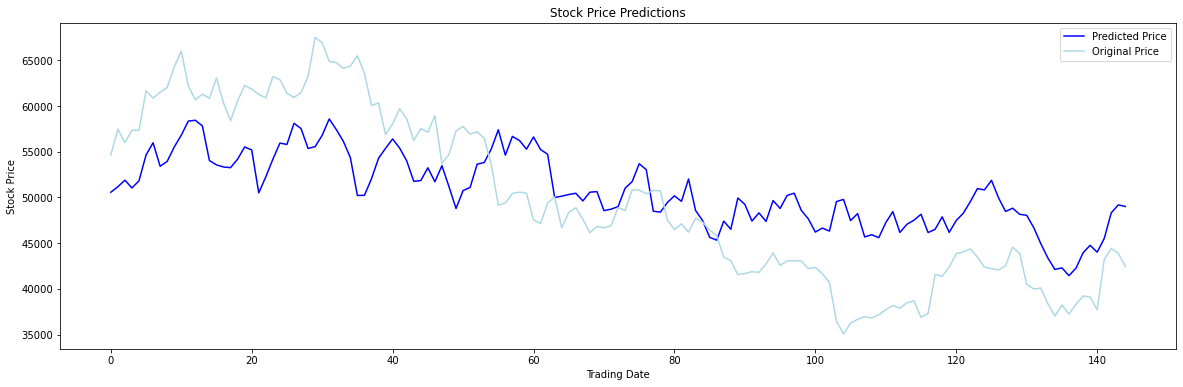

In [17]:
plt.plot(y_pred, color = 'blue', label = 'Predicted Price')
plt.plot(y_test, color = 'lightblue', label = 'Original Price')
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(np.arange(0, 160, step=20))  
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

# Prediction

In [18]:
predict_feature

Compound   Volume  FundingRate  Bitcoin_SVI  Cryptocurrency_SVI  \
0  0.525319  0.47366     0.382418     0.137817            0.249198   

   No. of Active Addresses  No. of Unique Addresses  Transactions  \
0                 0.548707                 0.539364      0.502639   

   Compound_lag_1  Volume_lag_1  ...  No. of Unique Addresses_lag_4  \
0         0.52765      0.469431  ...                       0.438526   

   Transactions_lag_4  Compound_lag_5  Volume_lag_5  FundingRate_lag_5  \
0            0.414387        0.529636       0.46585           0.373626   

   Bitcoin_SVI_lag_5  Cryptocurrency_SVI_lag_5  No. of Active Addresses_lag_5  \
0           0.169315                  0.201845                       0.440803   

   No. of Unique Addresses_lag_5  Transactions_lag_5  
0                       0.460792            0.449825  

[1 rows x 48 columns]

In [19]:
# Process the data for LSTM
testX = np.array(predict_feature)
predict_feature = testX.reshape(predict_feature.shape[0], 1, predict_feature.shape[1])

In [20]:
predicted_price = lstm.predict(predict_feature)

In [21]:
predicted_price[0][0]

47343.52

Reality: Bitcoin currency had a close price of USD 39,137.61 on 4 Mar 2022.

Prediced: Our model predicted the currency to have a close price of USD 47,,343.52 on 4 Mar 2022.